> ### **OPTIMAL DATA RANGE**
---
*   ClipLimit: 2-3
*   Learning rate: 0.0001 < lr < 0.1
*   Batch size: 32, 64, 128
*   Dropout rate: 0,5 - 0,8
*   Weight: otomatis

> ### **STRUKTUR**
---

*   Optimizer: Adam
*   Activation function: ReLu (training), Softmax (final)
*   Pooling: _Max Pooling_
*   Kernel size: 130x242
*   Training/testing/validation: 70/10/20
*   Epoch: 30-65
*   Class: 7
*   Weight: ImageNet
*   Loss: Cross-Entropy

 ## **DATA PREPARATION**
---
menyiapkan data (termasuk penerapan image enhancement)

In [5]:
pip install -r "C:\Users\ardin\Downloads\requirements.txt"

     ---------------------------------------- 38.2/38.2 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 278.7/278.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydot: filename=pydot-1.2.3-py3-none-any.whl size=18942 sha256=73a25a2f835e5f687a131c5747f6344359d67736e9909adde93e82b8579cbd1a
  Stored in directory: c:\users\ardin\appdata\local\pip\cache\wheels\a8\0a\63\6ea0aa7a137559306d1c8886ac43d1f752c9fa90d45e1cbc7b
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=f9e62f8f50f932068fbb0b7aad4bccd9dd7dc6c36b9aa0715d32573d19e68527
  Stored in directory: c:\users\ardin\appdata\local\pip\cache\wheels\5c\94\1f\953aa60af58ef512e5256e538ff0772c340229e5996ac

In [24]:
import os
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
path = r"D:\UNAIR\Semester_8\Skripsi\deteksi_nominal_vending_machine\datasetUang"

kelas = os.listdir(path)
print("Daftar kelas = ",kelas,"\n\nBanyak kelas = ", len(kelas))

Daftar kelas =  ['1000', '10000', '100000', '2000', '20000', '5000', '50000'] 

Banyak kelas =  7


In [26]:
import os

def daftar_file(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [7]:
!pip install split-folders

In [8]:
import splitfolders
splitfolders.ratio(dataset, output="datasetSplit", seed=1307, ratio=(0.7, 0.2, 0.1)) #70% : 10% : 20%

Copying files: 700 files [00:04, 142.82 files/s]


In [27]:
dataset = "datasetSplit"
daftar_file(dataset)

datasetSplit/
    test/
        1000/
            1k_b_2016_24.png
            1k_b_2022_23.png
            1k_b_2022_6.png
            1k_b_2022_8.png
            1k_d_2016_13.png
            1k_d_2016_15.png
            1k_d_2016_23.png
            1k_d_2016_8.png
            1k_d_2022_21.png
            1k_d_2022_22.png
        10000/
            10k_b_2016_24.png
            10k_b_2022_23.png
            10k_b_2022_6.png
            10k_b_2022_8.png
            10k_d_2016_13.png
            10k_d_2016_15.png
            10k_d_2016_23.png
            10k_d_2016_8.png
            10k_d_2022_21.png
            10k_d_2022_22.png
        100000/
            100k_b_2016_24.png
            100k_b_2022_23.png
            100k_b_2022_6.png
            100k_b_2022_8.png
            100k_d_2016_13.png
            100k_d_2016_15.png
            100k_d_2016_23.png
            100k_d_2016_8.png
            100k_d_2022_21.png
            100k_d_2022_22.png
        2000/
            2k_b_2016_24.p

In [28]:
import pandas as pd
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import plot_model
from sklearn.metrics import classification_report
from collections import Counter
import tensorflow as tf

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg19 import VGG19

from keras import Model, layers
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D

In [29]:
IMAGE_SIZE = (130, 242, 3)
dataset="datasetSplit"
train_pred_test_folders = os.listdir(dataset)
train_path = dataset+'/train'
test_path = dataset+'/test'
val_path = dataset+'/val'

Banyak citra di training set: 490
Banyak citra di testing set: 70
Banyak citra di prediction set: 140
Total citra: 700


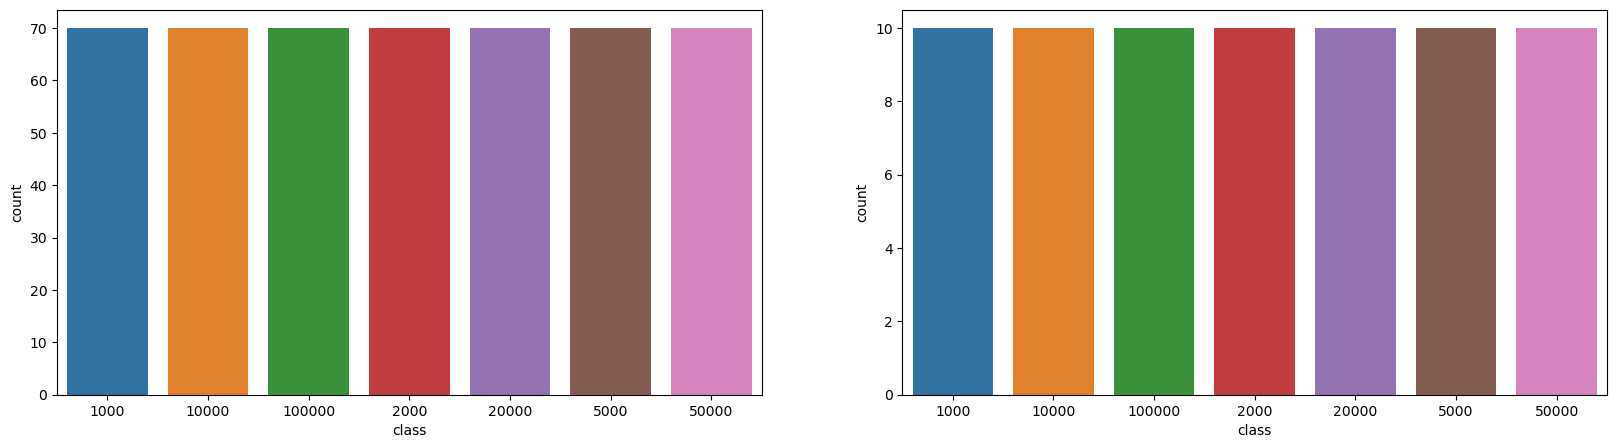

In [30]:
quantity_train = {} 
quantity_test = {}
quantity_val = {}
for folder in os.listdir(train_path):
    quantity_train[folder] = len(os.listdir(train_path+'/'+folder))

for folder in os.listdir(test_path):
    quantity_test[folder] = len(os.listdir(test_path+'/'+folder))

for folder in os.listdir(val_path):
    quantity_val[folder] = len(os.listdir(val_path+'/'+folder))

quantity_train = pd.DataFrame(list(quantity_train.items()), index=range(0,len(quantity_train)), columns=['class','count'])
quantity_test = pd.DataFrame(list(quantity_test.items()), index=range(0,len(quantity_test)), columns=['class','count'])
quantity_val = pd.DataFrame(list(quantity_val.items()), index=range(0,len(quantity_val)), columns=['class','count'])

figure, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='class',y='count',data=quantity_train,ax=ax[0])
sns.barplot(x='class',y='count',data=quantity_test,ax=ax[1])

print("Banyak citra di training set:", sum(quantity_train['count'].values))
print("Banyak citra di testing set:",sum(quantity_test['count'].values))
print("Banyak citra di prediction set:",sum(quantity_val['count'].values))
print("Total citra:",sum(quantity_train['count'].values)+sum(quantity_test['count'].values)+sum(quantity_val['count'].values))

plt.show()

In [31]:
def save_history(i, history, model_name):
    #convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save ke json 
    hist_json_file = 'percobaan'+str(i)+'_noImgPro/'+model_name+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # or save ke csv 
    hist_csv_file = 'percobaan'+str(i)+'_noImgPro/'+model_name+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
        
def plot_accuracy_from_history(history, isinception=False):
  try:
    color = sns.color_palette()
    if(isinception == False):
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    else:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
    

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label='Training Accuracy')
    sns.lineplot(epochs, val_acc,label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.show()
  except TypeError:
    pass
    
def plot_loss_from_history(history):
  try:
    color = sns.color_palette()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    sns.lineplot(epochs, loss,label='Training Loss')
    sns.lineplot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()
    plt.show()
  except TypeError:
    pass
    
def do_history_stuff(i, history, history_file_name, isinception=False):
    save_history(i, history, history_file_name)
    plot_accuracy_from_history(history, isinception)
    plot_loss_from_history(history)

In [32]:
def show_few_images(number_of_examples=2, predict_using_model=None):
    figure1, ax1 = plt.subplots(number_of_examples,len(os.listdir(train_path)), figsize=(20,4*number_of_examples))
    ax1 = ax1.reshape(-1)
    axoff_fun = np.vectorize(lambda ax:ax.axis('off'))
    axoff_fun(ax1)
    axs = 0
    for i, folder in enumerate(os.listdir(train_path)):
        image_ids = os.listdir(os.path.join(train_path,folder))
        for j in [random.randrange(0, len(image_ids)) for i in range(0,number_of_examples)]:
            display = plt.imread(os.path.join(train_path,folder,image_ids[j]))
            plt.axis('off')
            ax1[axs].imshow(display)
            title = 'True:'+folder
            if(predict_using_model):
                predicted_classname = inv_map_classes[np.argmax(vgg19_final_model.predict(np.array([display])))]
                title = title+'\nPredict :'+predicted_classname
            ax1[axs].set_title(title)
            axs=axs+1

In [33]:
tf.keras.backend.clear_session()

In [34]:
import os
def savePercobaan(i):
  try: 
    os.mkdir("percobaan"+str(i)+"_noImgPro") 
  except OSError as error: 
    print(error)
  saveModel(i)

In [35]:
def saveModel(i):
  try: 
    os.mkdir("percobaan"+str(i)+"_noImgPro/model") 
  except OSError as error: 
    print(error)

 ## **VGG-19**
---
Visual Geometry Group (19 layers)

#### **<font color='Pink'>Data Generator</font>**

In [36]:
#normalisasi
train_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
train_generator19 = train_datagen.flow_from_directory(train_path,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(130, 242))

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
test_generator19 = test_datagen.flow_from_directory(test_path, target_size=(130, 242),
    batch_size=1,
    shuffle=True,
    class_mode='categorical')

validation_generator19 = validation_datagen.flow_from_directory(val_path, shuffle=True, batch_size=1, class_mode='categorical', target_size=(130, 242))

Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


In [37]:
inv_map_classes = {v: k for k, v in validation_generator19.class_indices.items()}
#print(validation_generator16.class_indices)
print(inv_map_classes)

{0: '1000', 1: '10000', 2: '100000', 3: '2000', 4: '20000', 5: '5000', 6: '50000'}


#### **<font color='Pink'>Hyperparameter</font>**

In [14]:
import itertools
import random

array = [['ep1','ep2','ep3','ep4'], ['lr1', 'lr2', 'lr3', 'lr4'], [32, 64, 128], ['dr1', 'dr2', 'dr3', 'dr4']]

parameter = []
lr_values = array[1][1:]  

for _ in range(1):
    updated_array = [array[0], ['lr1'] + lr_values, array[2], array[3]]
    parameter.extend(list(itertools.product(*updated_array)))

parameter = [
    [
        random.randint(30, 38) if val == 'ep1' else
        random.randint(39, 47) if val == 'ep2' else
        random.randint(48, 56) if val == 'ep3' else
        random.randint(57, 65) if val == 'ep4' else

        random.uniform(0.0001, 0.0250249) if val == 'lr1' else
        random.uniform(0.025025, 0.050049) if val == 'lr2' else
        random.uniform(0.05005, 0.0750749) if val == 'lr3' else
        random.uniform(0.075075, 0.1) if val == 'lr4' else

        random.uniform(0.5,0.5749) if val == 'dr1' else
        random.uniform(0.575,0.649) if val == 'dr2' else
        random.uniform(0.65,0.7249) if val == 'dr3' else
        random.uniform(0.725,0.8) if val == 'dr4' else

        val
        for val in kombinasi
    ]
    for kombinasi in parameter
]

In [15]:
for kombinasi in parameter:
    print(kombinasi)

[37, 0.0045483701301378705, 32, 0.5287003847291808]
[34, 0.01896748414328559, 32, 0.6041527776273907]
[38, 0.001614286037166722, 32, 0.6732075295670956]
[30, 0.022599115311542517, 32, 0.7975817628618338]
[31, 0.016452194298987623, 64, 0.5633547580060887]
[35, 0.02233307901129075, 64, 0.6353931961172053]
[32, 0.021441445841916495, 64, 0.7058146464660711]
[31, 0.017620475513307973, 64, 0.7507155482231853]
[38, 0.01174322042249083, 128, 0.500422917036937]
[33, 0.022621256106422825, 128, 0.5766053039386704]
[38, 0.009499243199341239, 128, 0.6741029604310665]
[32, 0.004052800167244112, 128, 0.7737990929939418]
[33, 0.0342455052914853, 32, 0.5646839260039688]
[32, 0.030317086722895778, 32, 0.6419250728957978]
[30, 0.026758079357803166, 32, 0.6592088951400742]
[37, 0.04189553868157531, 32, 0.7251736525202279]
[35, 0.04640562012588709, 64, 0.5433496884102693]
[30, 0.027318044491704625, 64, 0.6378070031636127]
[35, 0.026309989050881, 64, 0.7066476400672299]
[37, 0.03865435540564069, 64, 0.77626

#### **<font color='Pink'>Model Training</font>**

In [38]:
from keras.layers import BatchNormalization
def vgg19_training(i, vgg_epoch, learning_rate, batch_size, dropout_rate):
  vgg19_model = VGG19(pooling='max',input_shape = (130, 242, 3), weights = 'imagenet', include_top = False) #defaultnya AVERAGE POOLING
  for layers in vgg19_model.layers:
              layers.trainable=False

  last_output_vgg19 = vgg19_model.layers[-1].output
  vgg_19 = Flatten()(last_output_vgg19) #awalnya di bawah last output
  vgg_19 = BatchNormalization()(vgg_19)
  vgg_19 = Dense(128, activation = 'relu')(vgg_19)
  vgg_19 = BatchNormalization()(vgg_19)
  vgg_19 = Dropout(dropout_rate)(vgg_19)

  #vgg_16 = Dense(64, activation = 'relu')(vgg_19)
  #vgg_19 = Dropout(dropout_rate)(vgg_19)
  vgg_19 = Dense(7, activation = 'softmax')(vgg_19)
  vgg19_final_model = Model(vgg19_model.input, vgg_19)
  
  opt = Adam(learning_rate=learning_rate)
  vgg19_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc'])
  #vgg19_final_model.summary()

  plot_model(model=vgg19_final_model, show_shapes=True)

  train_generator19.batch_size = batch_size

  vgg19_filepath = 'percobaan'+str(i)+'_noImgPro/model/vgg_19_'+str(i)+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
  vgg19_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg19_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
  vgg19_history = vgg19_final_model.fit(train_generator19, epochs = vgg_epoch, validation_data = validation_generator19,callbacks=[vgg19_checkpoint,early_stopping],verbose=1)

  do_history_stuff(i, vgg19_history, 'vgg19_model')
  save_vgg19(i, vgg19_final_model)

  predictionTest(i, vgg19_final_model)

  return(vgg19_final_model)

In [39]:
def save_vgg19(i, vgg19_final_model):
  vgg19_final_model.save(('percobaan'+str(i)+'_noImgPro/vgg19-model'+str(i)+'.h5'))

#### **<font color='Pink'>Evaluation</font>**

In [40]:
def acc_plot(vgg19_history):
  plt.figure(figsize=(10, 8))
  plt.plot(vgg19_history.history['acc'], label='train acc')
  plt.plot(vgg19_history.history['val_acc'], label='val acc')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

In [41]:
def loss_plot(vgg19_history):
  plt.figure(figsize=(10, 8))
  plt.plot(vgg19_history.history['loss'], label='train loss')
  plt.plot(vgg19_history.history['val_loss'], label='val loss')
  plt.legend()
  plt.title('Loss')
  plt.show()

In [42]:
def predictionTest(i, vgg19_final_model):
  true_value = []
  vgg_pred = []
  for folder in os.listdir(test_path):
      test_image_ids = os.listdir(os.path.join(test_path,folder))
      
      for image_id in test_image_ids[:int(len(test_image_ids))]:
          path = os.path.join(test_path,folder,image_id)
          #print(path)
          true_value.append(test_generator19.class_indices[folder])
          img = cv2.resize(cv2.imread(path),(242,130))
          img_normalized = img/255
          #vgg
          vgg19_image_prediction = np.argmax(vgg19_final_model.predict(np.array([img_normalized]), verbose = 0)) #verbose biar gak ngeprint
          vgg_pred.append(vgg19_image_prediction)

  print("\n")
  clf_report(i, true_value, vgg_pred)

In [43]:
arr_accuracy19 = []
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(k, true_value, model_pred):
    classes = validation_generator19.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    arr_accuracy19.append(model_accuracy)
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    plt.savefig("percobaan"+str(k)+"_noImgPro/conf_matrix"+str(k)+".png")
    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [44]:
hasilTabel = pd.DataFrame(columns=['Epoch', 'Learning Rate', 'Batch Size', 'Dropout Rate','Accuracy'])
print(hasilTabel)

Empty DataFrame
Columns: [Epoch, Learning Rate, Batch Size, Dropout Rate, Accuracy]
Index: []


#### **<font color='Pink'>Code Running</font>**

In [32]:
j = 0
for i in range (j,len(parameter)):
#for i in range (0,10): #aslinya in range len(parameter) tapi kalau mau coba per sedikit2 ya gini deh
  vgg_epoch = (parameter[i][0])
  learning_rate = (parameter[i][1])
  batch_size = (parameter[i][2])
  dropout_rate = (parameter[i][3])
  i=i+1
  savePercobaan(i)
  print("Percobaan ke-",i,"↓")
  print("HYPERPARAMETER".center(100,"─"))
  print("vgg epoch:",vgg_epoch)
  print("learning rate:",learning_rate)
  print("batch size:",batch_size)
  print("dropout rate:",dropout_rate)
  print("".center(100,"─"))
  vgg19_training(i, vgg_epoch, learning_rate, batch_size, dropout_rate)
  new_row = {'Epoch': vgg_epoch, 'Learning Rate': learning_rate, 'Batch Size': batch_size, 'Dropout Rate': dropout_rate, 'Accuracy': arr_accuracy19[-1]}
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)
  hasilTabel.index = hasilTabel.index + (j+1)
  hasilTabel.to_excel("hasilTabel.xlsx")
  print("".center(100,"─"))

Percobaan ke- 1 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 34
learning rate: 0.008616016539478084
batch size: 32
dropout rate: 0.5565770601535686
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/34
16/16 [==============================] - ETA: 0s - loss: 2.2714 - acc: 0.3673
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan1_noImgPro/model\vgg_19_1-saved-model-01-acc-0.14.hdf5
16/16 [==============================] - 41s 2s/step - loss: 2.2714 - acc: 0.3673 - val_loss: 3.0877 - val_acc: 0.1429
Epoch 2/34
16/16 [==============================] - ETA: 0s - loss: 1.3809 - acc: 0.5367
Epoch 2: val_acc improved from 0.14286 to 0.22857, saving model to percobaan1_noImgPro/model\vgg_19_1-saved-model-02-acc-0.23.hdf5
16/16 [==============================] - 39s 2s/step - loss: 1.3809 - acc: 0.5367 - val_loss: 2.0907 - val_acc: 0.2286
Epoch 3

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 2 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 34
learning rate: 0.02452786886724121
batch size: 32
dropout rate: 0.6159368509950479
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/34
16/16 [==============================] - ETA: 0s - loss: 2.7230 - acc: 0.2776
Epoch 1: val_acc improved from -inf to 0.23571, saving model to percobaan2_noImgPro/model\vgg_19_2-saved-model-01-acc-0.24.hdf5
16/16 [==============================] - 41s 2s/step - loss: 2.7230 - acc: 0.2776 - val_loss: 2.9887 - val_acc: 0.2357
Epoch 2/34
16/16 [==============================] - ETA: 0s - loss: 1.7735 - acc: 0.4388
Epoch 2: val_acc did not improve from 0.23571
16/16 [==============================] - 39s 2s/step - loss: 1.7735 - acc: 0.4388 - val_loss: 2.3157 - val_acc:

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/31
16/16 [==============================] - ETA: 0s - loss: 2.8796 - acc: 0.2694
Epoch 1: val_acc improved from -inf to 0.22857, saving model to percobaan3_noImgPro/model\vgg_19_3-saved-model-01-acc-0.23.hdf5
16/16 [==============================] - 40s 2s/step - loss: 2.8796 - acc: 0.2694 - val_loss: 2.2713 - val_acc: 0.2286
Epoch 2/31
16/16 [==============================] - ETA: 0s - loss: 1.7780 - acc: 0.4265
Epoch 2: val_acc improved from 0.22857 to 0.27857, saving model to percobaan3_noImgPro/model\vgg_19_3-saved-model-02-acc-0.28.hdf5
16/16 [==============================] - 44s 3s/step - loss: 1.7780 - acc: 0.4265 - val_loss: 2.0035 - val_acc: 0.2786
Epoch 3/31
16/16 [==============================] - ETA: 0s - loss: 1.4954 - acc: 0.4796
Epoch 3: val_acc improved from 0.27857 to 0.40000, saving model to percobaan3_noImgPro/model\vgg_19_3-saved-model-03-acc-0.40.hdf5
16/16 [==============================] - 39s 2s/step - loss: 1.4954 - acc: 0.4796 - val_loss: 1.6705 - va

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.30      0.46        10
       10000       0.67      0.40      0.50        10
      100000       0.00      0.00      0.00        10
        2000       0.45      0.50      0.48        10
       20000       0.25      0.80      0.38        10
        5000       1.00      0.10      0.18        10
       50000       0.35      0.60      0.44        10

    accuracy                           0.39        70
   macro avg       0.53      0.39      0.35        70
weighted avg       0.53      0.39      0.35        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 4 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 34
learning rate: 0.009398664877991356
batch size: 32
dropout rate: 0.7997879284224084
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/34
8/8 [==============================] - ETA: 0s - loss: 2.2545 - acc: 0.3653
Epoch 1: val_acc improved from -inf to 0.22857, saving model to percobaan5_noImgPro/model\vgg_19_5-saved-model-01-acc-0.23.hdf5
8/8 [==============================] - 55s 7s/step - loss: 2.2545 - acc: 0.3653 - val_loss: 4.2566 - val_acc: 0.2286
Epoch 2/34
8/8 [==============================] - ETA: 0s - loss: 1.4816 - acc: 0.4898
Epoch 2: val_acc did not improve from 0.22857
8/8 [==============================] - 46s 6s/step - loss: 1.4816 - acc: 0.4898 - val_loss: 4.7444 - val_acc: 0.2000
Epoch 3/34
8/8 [==============================] - ETA: 0s - loss: 1.0656 - acc: 0.6245
Epoch 3: val_acc improved from 0.22857 to 0.37857, saving model to percobaan5_noImgPro/model\vgg_19_5-saved-model-03-acc-0.38.hdf5
8/8 [==============================] - 48s 5s/step - loss: 1.0656 - acc: 0.6245 - val_loss: 2.9818 - val_acc: 0.3786
Epoch 4/34
8/8 [==============================] - ETA: 0s - loss: 0.8772 - acc: 0.7

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2.6130 - acc: 0.3061
Epoch 1: val_acc improved from -inf to 0.15000, saving model to percobaan6_noImgPro/model\vgg_19_6-saved-model-01-acc-0.15.hdf5
8/8 [==============================] - 47s 6s/step - loss: 2.6130 - acc: 0.3061 - val_loss: 5.5274 - val_acc: 0.1500
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1.4763 - acc: 0.4980
Epoch 2: val_acc improved from 0.15000 to 0.45714, saving model to percobaan6_noImgPro/model\vgg_19_6-saved-model-02-acc-0.46.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.4763 - acc: 0.4980 - val_loss: 2.8105 - val_acc: 0.4571
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1.1646 - acc: 0.5918
Epoch 3: val_acc did not improve from 0.45714
8/8 [==============================] - 46s 6s/step - loss: 1.1646 - acc: 0.5918 - val_loss: 3.4552 - val_acc: 0.2286
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.9862 - acc: 0.6

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 7 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 32
learning rate: 0.012659887181081611
batch size: 64
dropout rate: 0.6962746924512789
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/32
8/8 [==============================] - ETA: 0s - loss: 2.8119 - acc: 0.2612
Epoch 1: val_acc improved from -inf to 0.16429, saving model to percobaan7_noImgPro/model\vgg_19_7-saved-model-01-acc-0.16.hdf5
8/8 [==============================] - 52s 6s/step - loss: 2.8119 - acc: 0.2612 - val_loss: 4.8825 - val_acc: 0.1643
Epoch 2/32
8/8 [==============================] - ETA: 0s - loss: 1.6318 - acc: 0.4816
Epoch 2: val_acc did not improve from 0.16429
8/8 [==============================] - 45s 6s/step - loss: 1.6318 - acc: 0.4816 - val_loss: 3.8742 - val_acc: 0.1429

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 8 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 35
learning rate: 0.013526393505361436
batch size: 64
dropout rate: 0.7766926705173403
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/35
8/8 [==============================] - ETA: 0s - loss: 3.4492 - acc: 0.2000
Epoch 1: val_acc improved from -inf to 0.37143, saving model to percobaan8_noImgPro/model\vgg_19_8-saved-model-01-acc-0.37.hdf5
8/8 [==============================] - 46s 5s/step - loss: 3.4492 - acc: 0.2000 - val_loss: 2.5768 - val_acc: 0.3714
Epoch 2/35
8/8 [==============================] - ETA: 0s - loss: 2.0620 - acc: 0.3571
Epoch 2: val_acc did not improve from 0.37143
8/8 [==============================] - 45s 6s/step - loss: 2.0620 - acc: 0.3571 - val_loss: 2.3617 - val_acc: 0.2429

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.24      1.00      0.38        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.35      0.90      0.50        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.30        70
   macro avg       0.37      0.30      0.18        70
weighted avg       0.37      0.30      0.18        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 9 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 37
learning rate: 0.007688625841203694
batch size: 128
dropout rate: 0.5284268928655996
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.16      0.90      0.28        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.57      0.80      0.67        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.26        70
   macro avg       0.25      0.26      0.16        70
weighted avg       0.25      0.26      0.16        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 10 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 38
learning rate: 0.011847280723457894
batch size: 128
dropout rate: 0.6412159424039616
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.89      0.80      0.84        10
       10000       0.31      0.80      0.44        10
      100000       0.00      0.00      0.00        10
        2000       1.00      0.30      0.46        10
       20000       0.38      1.00      0.56        10
        5000       1.00      0.10      0.18        10
       50000       1.00      0.50      0.67        10

    accuracy                           0.50        70
   macro avg       0.65      0.50      0.45        70
weighted avg       0.65      0.50      0.45        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 11 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 34
learning rate: 0.0037394435090149936
batch size: 128
dropout rate: 0.7105841339500505
──────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/37
4/4 [==============================] - ETA: 0s - loss: 3.2519 - acc: 0.2265
Epoch 1: val_acc improved from -inf to 0.22857, saving model to percobaan12_noImgPro/model\vgg_19_12-saved-model-01-acc-0.23.hdf5
4/4 [==============================] - 42s 11s/step - loss: 3.2519 - acc: 0.2265 - val_loss: 2.5827 - val_acc: 0.2286
Epoch 2/37
4/4 [==============================] - ETA: 0s - loss: 1.9236 - acc: 0.4082
Epoch 2: val_acc improved from 0.22857 to 0.27857, saving model to percobaan12_noImgPro/model\vgg_19_12-saved-model-02-acc-0.28.hdf5
4/4 [==============================] - 40s 11s/step - loss: 1.9236 - acc: 0.4082 - val_loss: 3.0893 - val_acc: 0.2786
Epoch 3/37
4/4 [==============================] - ETA: 0s - loss: 1.6010 - acc: 0.4694
Epoch 3: val_acc improved from 0.27857 to 0.29286, saving model to percobaan12_noImgPro/model\vgg_19_12-saved-model-03-acc-0.29.hdf5
4/4 [==============================] - 40s 11s/step - loss: 1.6010 - acc: 0.4694 - val_loss: 3.4104 - val_a

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.32      0.70      0.44        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.20      0.90      0.32        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.26        70
   macro avg       0.36      0.26      0.16        70
weighted avg       0.36      0.26      0.16        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 13 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 35
learning rate: 0.025132704732004952
batch size: 32
dropout rate: 0.5523933118628084
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/33
16/16 [==============================] - ETA: 0s - loss: 2.8813 - acc: 0.2429
Epoch 1: val_acc improved from -inf to 0.17143, saving model to percobaan14_noImgPro/model\vgg_19_14-saved-model-01-acc-0.17.hdf5
16/16 [==============================] - 45s 3s/step - loss: 2.8813 - acc: 0.2429 - val_loss: 5.9574 - val_acc: 0.1714
Epoch 2/33
16/16 [==============================] - ETA: 0s - loss: 1.7700 - acc: 0.4061
Epoch 2: val_acc improved from 0.17143 to 0.22143, saving model to percobaan14_noImgPro/model\vgg_19_14-saved-model-02-acc-0.22.hdf5
16/16 [==============================] - 42s 3s/step - loss: 1.7700 - acc: 0.4061 - val_loss: 3.8412 - val_acc: 0.2214
Epoch 3/33
16/16 [==============================] - ETA: 0s - loss: 1.4903 - acc: 0.5020
Epoch 3: val_acc improved from 0.22143 to 0.30714, saving model to percobaan14_noImgPro/model\vgg_19_14-saved-model-03-acc-0.31.hdf5
16/16 [==============================] - 42s 3s/step - loss: 1.4903 - acc: 0.5020 - val_loss: 2.545

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/36
16/16 [==============================] - ETA: 0s - loss: 2.8687 - acc: 0.2673
Epoch 1: val_acc improved from -inf to 0.25000, saving model to percobaan15_noImgPro/model\vgg_19_15-saved-model-01-acc-0.25.hdf5
16/16 [==============================] - 42s 3s/step - loss: 2.8687 - acc: 0.2673 - val_loss: 5.7733 - val_acc: 0.2500
Epoch 2/36
16/16 [==============================] - ETA: 0s - loss: 2.0016 - acc: 0.3796
Epoch 2: val_acc did not improve from 0.25000
16/16 [==============================] - 40s 3s/step - loss: 2.0016 - acc: 0.3796 - val_loss: 4.6548 - val_acc: 0.1429
Epoch 3/36
16/16 [==============================] - ETA: 0s - loss: 1.5975 - acc: 0.4469
Epoch 3: val_acc did not improve from 0.25000
16/16 [==============================] - 40s 3s/step - loss: 1.5975 - acc: 0.4469 - val_loss: 2.9219 - val_acc: 0.2214
Epoch 4/36
16/16 [==============================] - ETA: 0s - loss: 1.4574 - acc: 0.4898
Epoch 4: val_acc improved from 0.25000 to 0.37857, saving model t

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/32
16/16 [==============================] - ETA: 0s - loss: 3.5431 - acc: 0.2245
Epoch 1: val_acc improved from -inf to 0.17143, saving model to percobaan16_noImgPro/model\vgg_19_16-saved-model-01-acc-0.17.hdf5
16/16 [==============================] - 41s 3s/step - loss: 3.5431 - acc: 0.2245 - val_loss: 8.4806 - val_acc: 0.1714
Epoch 2/32
16/16 [==============================] - ETA: 0s - loss: 2.5461 - acc: 0.3061
Epoch 2: val_acc improved from 0.17143 to 0.17857, saving model to percobaan16_noImgPro/model\vgg_19_16-saved-model-02-acc-0.18.hdf5
16/16 [==============================] - 39s 3s/step - loss: 2.5461 - acc: 0.3061 - val_loss: 3.8490 - val_acc: 0.1786
Epoch 3/32
16/16 [==============================] - ETA: 0s - loss: 2.0689 - acc: 0.3612
Epoch 3: val_acc improved from 0.17857 to 0.18571, saving model to percobaan16_noImgPro/model\vgg_19_16-saved-model-03-acc-0.19.hdf5
16/16 [==============================] - 39s 2s/step - loss: 2.0689 - acc: 0.3612 - val_loss: 2.791

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/32
8/8 [==============================] - ETA: 0s - loss: 2.6730 - acc: 0.3041
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan17_noImgPro/model\vgg_19_17-saved-model-01-acc-0.14.hdf5
8/8 [==============================] - 40s 5s/step - loss: 2.6730 - acc: 0.3041 - val_loss: 8.3300 - val_acc: 0.1429
Epoch 2/32
8/8 [==============================] - ETA: 0s - loss: 1.8268 - acc: 0.4082
Epoch 2: val_acc improved from 0.14286 to 0.21429, saving model to percobaan17_noImgPro/model\vgg_19_17-saved-model-02-acc-0.21.hdf5
8/8 [==============================] - 39s 5s/step - loss: 1.8268 - acc: 0.4082 - val_loss: 4.7334 - val_acc: 0.2143
Epoch 3/32
8/8 [==============================] - ETA: 0s - loss: 1.3152 - acc: 0.5265
Epoch 3: val_acc improved from 0.21429 to 0.28571, saving model to percobaan17_noImgPro/model\vgg_19_17-saved-model-03-acc-0.29.hdf5
8/8 [==============================] - 39s 5s/step - loss: 1.3152 - acc: 0.5265 - val_loss: 3.8665 - val_acc:

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.60      0.60      0.60        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.17      1.00      0.29        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.24        70
   macro avg       0.25      0.24      0.15        70
weighted avg       0.25      0.24      0.15        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 18 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 31
learning rate: 0.044472453673152446
batch size: 64
dropout rate: 0.6447198591998908
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.50      0.40      0.44        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.33      0.20      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.18      1.00      0.30        10

    accuracy                           0.23        70
   macro avg       0.14      0.23      0.14        70
weighted avg       0.14      0.23      0.14        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 19 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 36
learning rate: 0.025208475575470367
batch size: 64
dropout rate: 0.7060770554394534
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/31
8/8 [==============================] - ETA: 0s - loss: 3.3400 - acc: 0.2551
Epoch 1: val_acc improved from -inf to 0.22857, saving model to percobaan20_noImgPro/model\vgg_19_20-saved-model-01-acc-0.23.hdf5
8/8 [==============================] - 42s 5s/step - loss: 3.3400 - acc: 0.2551 - val_loss: 5.2615 - val_acc: 0.2286
Epoch 2/31
8/8 [==============================] - ETA: 0s - loss: 2.4769 - acc: 0.3122
Epoch 2: val_acc did not improve from 0.22857
8/8 [==============================] - 47s 6s/step - loss: 2.4769 - acc: 0.3122 - val_loss: 8.0469 - val_acc: 0.1429
Epoch 3/31
8/8 [==============================] - ETA: 0s - loss: 1.7407 - acc: 0.4347
Epoch 3: val_acc did not improve from 0.22857
8/8 [==============================] - 40s 5s/step - loss: 1.7407 - acc: 0.4347 - val_loss: 3.6600 - val_acc: 0.2071
Epoch 4/31
8/8 [==============================] - ETA: 0s - loss: 1.6358 - acc: 0.4673
Epoch 4: val_acc did not improve from 0.22857
8/8 [============================

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.30      0.46        10
       10000       0.33      0.80      0.47        10
      100000       0.00      0.00      0.00        10
        2000       0.80      0.40      0.53        10
       20000       0.28      1.00      0.43        10
        5000       1.00      0.20      0.33        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.39        70
   macro avg       0.49      0.39      0.32        70
weighted avg       0.49      0.39      0.32        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 21 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 32
learning rate: 0.04315075237016721
batch size: 128
dropout rate: 0.5060619742184391
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\3407311398.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,7))


              precision    recall  f1-score   support

        1000       0.78      0.70      0.74        10
       10000       0.32      0.90      0.47        10
      100000       1.00      0.10      0.18        10
        2000       0.67      0.20      0.31        10
       20000       0.42      1.00      0.59        10
        5000       1.00      0.20      0.33        10
       50000       1.00      0.30      0.46        10

    accuracy                           0.49        70
   macro avg       0.74      0.49      0.44        70
weighted avg       0.74      0.49      0.44        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 22 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 32
learning rate: 0.031833407814179586
batch size: 128
dropout rate: 0.5968774948635351
───────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/32
4/4 [==============================] - ETA: 0s - loss: 2.5691 - acc: 0.3204
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan22_noImgPro/model\vgg_19_22-saved-model-01-acc-0.20.hdf5
4/4 [==============================] - 42s 11s/step - loss: 2.5691 - acc: 0.3204 - val_loss: 5.1772 - val_acc: 0.2000
Epoch 2/32
4/4 [==============================] - ETA: 0s - loss: 1.6091 - acc: 0.4755
Epoch 2: val_acc improved from 0.20000 to 0.37143, saving model to percobaan22_noImgPro/model\vgg_19_22-saved-model-02-acc-0.37.hdf5
4/4 [==============================] - 46s 11s/step - loss: 1.6091 - acc: 0.4755 - val_loss: 3.9531 - val_acc: 0.3714
Epoch 3/32
4/4 [==============================] - ETA: 0s - loss: 1.3111 - acc: 0.5469
Epoch 3: val_acc did not improve from 0.37143
4/4 [==============================] - 46s 13s/step - loss: 1.3111 - acc: 0.5469 - val_loss: 7.7873 - val_acc: 0.1643
Epoch 4/32
4/4 [==============================] - ETA: 0s - loss: 1.1596 - a

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.16        70
   macro avg       0.16      0.16      0.06        70
weighted avg       0.16      0.16      0.06        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 23 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 31
learning rate: 0.04527652462017467
batch size: 128
dropout rate: 0.7229498322204604
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       0.29      0.90      0.44        10
      100000       0.00      0.00      0.00        10
        2000       0.50      0.10      0.17        10
       20000       0.40      1.00      0.57        10
        5000       0.00      0.00      0.00        10
       50000       0.80      0.80      0.80        10

    accuracy                           0.43        70
   macro avg       0.43      0.43      0.33        70
weighted avg       0.43      0.43      0.33        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 24 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 33
learning rate: 0.04928297914763342
batch size: 128
dropout rate: 0.787607840759632
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 25 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 30
learning rate: 0.05217773826053398
batch size: 32
dropout rate: 0.5264137092559337
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/34
16/16 [==============================] - ETA: 0s - loss: 3.3040 - acc: 0.2592
Epoch 1: val_acc improved from -inf to 0.16429, saving model to percobaan26_noImgPro/model\vgg_19_26-saved-model-01-acc-0.16.hdf5
16/16 [==============================] - 47s 3s/step - loss: 3.3040 - acc: 0.2592 - val_loss: 8.1784 - val_acc: 0.1643
Epoch 2/34
16/16 [==============================] - ETA: 0s - loss: 2.4018 - acc: 0.3429
Epoch 2: val_acc improved from 0.16429 to 0.18571, saving model to percobaan26_noImgPro/model\vgg_19_26-saved-model-02-acc-0.19.hdf5
16/16 [==============================] - 47s 3s/step - loss: 2.4018 - acc: 0.3429 - val_loss: 6.2638 - val_acc: 0.1857
Epoch 3/34
16/16 [==============================] - ETA: 0s - loss: 1.6451 - acc: 0.4429
Epoch 3: val_acc improved from 0.18571 to 0.25714, saving model to percobaan26_noImgPro/model\vgg_19_26-saved-model-03-acc-0.26.hdf5
16/16 [==============================] - 47s 3s/step - loss: 1.6451 - acc: 0.4429 - val_loss: 3.201

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.60      0.90      0.72        10
       10000       0.57      0.80      0.67        10
      100000       0.00      0.00      0.00        10
        2000       0.70      0.70      0.70        10
       20000       0.56      0.90      0.69        10
        5000       0.57      0.80      0.67        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.60        70
   macro avg       0.57      0.60      0.52        70
weighted avg       0.57      0.60      0.52        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 27 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 33
learning rate: 0.05821245180716583
batch size: 32
dropout rate: 0.7223218985651443
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.67      0.20      0.31        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.12      0.17      0.08        70
weighted avg       0.12      0.17      0.08        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 28 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 38
learning rate: 0.05148775767790047
batch size: 32
dropout rate: 0.7521098013305066
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.30      0.46        10
       10000       0.53      0.90      0.67        10
      100000       0.60      0.90      0.72        10
        2000       0.60      0.90      0.72        10
       20000       0.53      0.90      0.67        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.30      0.46        10

    accuracy                           0.60        70
   macro avg       0.61      0.60      0.53        70
weighted avg       0.61      0.60      0.53        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 29 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 35
learning rate: 0.05124942241578391
batch size: 64
dropout rate: 0.5332753684486015
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/35
8/8 [==============================] - ETA: 0s - loss: 3.5160 - acc: 0.2327
Epoch 1: val_acc improved from -inf to 0.27857, saving model to percobaan30_noImgPro/model\vgg_19_30-saved-model-01-acc-0.28.hdf5
8/8 [==============================] - 41s 5s/step - loss: 3.5160 - acc: 0.2327 - val_loss: 5.0308 - val_acc: 0.2786
Epoch 2/35
8/8 [==============================] - ETA: 0s - loss: 2.4809 - acc: 0.3571
Epoch 2: val_acc did not improve from 0.27857
8/8 [==============================] - 46s 5s/step - loss: 2.4809 - acc: 0.3571 - val_loss: 8.3815 - val_acc: 0.1429
Epoch 3/35
8/8 [==============================] - ETA: 0s - loss: 1.8920 - acc: 0.3673
Epoch 3: val_acc improved from 0.27857 to 0.32143, saving model to percobaan30_noImgPro/model\vgg_19_30-saved-model-03-acc-0.32.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.8920 - acc: 0.3673 - val_loss: 1.9492 - val_acc: 0.3214
Epoch 4/35
8/8 [==============================] - ETA: 0s - loss: 1.7413 - acc:

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      0.90      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.70      0.70      0.70        10

    accuracy                           0.23        70
   macro avg       0.12      0.23      0.14        70
weighted avg       0.12      0.23      0.14        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 31 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 34
learning rate: 0.068375621798818
batch size: 64
dropout rate: 0.6900751020575525
───────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.20      0.50      0.29        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.30      1.00      0.47        10
        5000       0.00      0.00      0.00        10
       50000       0.58      0.70      0.64        10

    accuracy                           0.31        70
   macro avg       0.16      0.31      0.20        70
weighted avg       0.16      0.31      0.20        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 32 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 37
learning rate: 0.06385722218222381
batch size: 64
dropout rate: 0.7561815561618618
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.25      0.30      0.27        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.17      1.00      0.29        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.19        70
   macro avg       0.06      0.19      0.08        70
weighted avg       0.06      0.19      0.08        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 33 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 32
learning rate: 0.07016680128778932
batch size: 128
dropout rate: 0.5132974659110002
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.67      0.20      0.31        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.19        70
   macro avg       0.26      0.19      0.11        70
weighted avg       0.26      0.19      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 34 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 35
learning rate: 0.07424513348890102
batch size: 128
dropout rate: 0.6131700661479725
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       0.19      1.00      0.32        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.47      0.70      0.56        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.27        70
   macro avg       0.24      0.27      0.17        70
weighted avg       0.24      0.27      0.17        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 35 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 32
learning rate: 0.05849284284048474
batch size: 128
dropout rate: 0.6786437351136803
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.21      1.00      0.35        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.43      1.00      0.61        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.29        70
   macro avg       0.09      0.29      0.14        70
weighted avg       0.09      0.29      0.14        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 36 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 35
learning rate: 0.058147186212465965
batch size: 128
dropout rate: 0.7707353534505809
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.16      1.00      0.28        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.67      0.60      0.63        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.23        70
   macro avg       0.12      0.23      0.13        70
weighted avg       0.12      0.23      0.13        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 37 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 35
learning rate: 0.09077802494080317
batch size: 32
dropout rate: 0.5262755886794839
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.17      1.00      0.29        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.00      0.00      0.00        10
        5000       1.00      0.30      0.46        10
       50000       0.86      0.60      0.71        10

    accuracy                           0.29        70
   macro avg       0.43      0.29      0.23        70
weighted avg       0.43      0.29      0.23        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 38 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 33
learning rate: 0.0952803038342306
batch size: 32
dropout rate: 0.6249362419481206
──────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 39 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 36
learning rate: 0.09941509986142416
batch size: 32
dropout rate: 0.6946891104647605
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/36
16/16 [==============================] - ETA: 0s - loss: 4.8540 - acc: 0.2143
Epoch 1: val_acc improved from -inf to 0.17143, saving model to percobaan39_noImgPro/model\vgg_19_39-saved-model-01-acc-0.17.hdf5
16/16 [==============================] - 41s 3s/step - loss: 4.8540 - acc: 0.2143 - val_loss: 10.0512 - val_acc: 0.1714
Epoch 2/36
16/16 [==============================] - ETA: 0s - loss: 3.5197 - acc: 0.2327
Epoch 2: val_acc improved from 0.17143 to 0.22143, saving model to percobaan39_noImgPro/model\vgg_19_39-saved-model-02-acc-0.22.hdf5
16/16 [=============

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.18      1.00      0.31        10
       10000       0.44      0.40      0.42        10
      100000       1.00      0.10      0.18        10
        2000       1.00      0.10      0.18        10
       20000       0.33      0.10      0.15        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.26        70
   macro avg       0.57      0.26      0.20        70
weighted avg       0.57      0.26      0.20        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 40 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 36
learning rate: 0.09475535172439835
batch size: 32
dropout rate: 0.7453318301710244
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.60      0.30      0.40        10
       10000       1.00      0.20      0.33        10
      100000       0.00      0.00      0.00        10
        2000       0.17      1.00      0.29        10
       20000       0.67      0.20      0.31        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.26        70
   macro avg       0.49      0.26      0.22        70
weighted avg       0.49      0.26      0.22        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 41 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 31
learning rate: 0.08175609445635147
batch size: 64
dropout rate: 0.557168015254453
──────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.53      0.80      0.64        10
       10000       0.78      0.70      0.74        10
      100000       0.86      0.60      0.71        10
        2000       0.00      0.00      0.00        10
       20000       0.42      1.00      0.59        10
        5000       1.00      0.50      0.67        10
       50000       0.80      0.80      0.80        10

    accuracy                           0.63        70
   macro avg       0.63      0.63      0.59        70
weighted avg       0.63      0.63      0.59        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 42 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 30
learning rate: 0.09046397873662419
batch size: 64
dropout rate: 0.6479540011200107
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.60      0.30      0.40        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.50      0.30      0.37        10
       20000       0.17      1.00      0.29        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.24        70
   macro avg       0.32      0.24      0.18        70
weighted avg       0.32      0.24      0.18        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 43 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 30
learning rate: 0.07572142301866891
batch size: 64
dropout rate: 0.6534582531298635
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.47      0.90      0.62        10
       10000       0.47      0.80      0.59        10
      100000       0.00      0.00      0.00        10
        2000       1.00      0.40      0.57        10
       20000       0.56      1.00      0.71        10
        5000       1.00      0.50      0.67        10
       50000       1.00      0.70      0.82        10

    accuracy                           0.61        70
   macro avg       0.64      0.61      0.57        70
weighted avg       0.64      0.61      0.57        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 44 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 30
learning rate: 0.09043431525752679
batch size: 64
dropout rate: 0.7362324530880549
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.24      1.00      0.38        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.25      0.70      0.37        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.24        70
   macro avg       0.07      0.24      0.11        70
weighted avg       0.07      0.24      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 45 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 38
learning rate: 0.08112417886593218
batch size: 128
dropout rate: 0.5093622437198727
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.83      0.50      0.62        10
       10000       0.22      1.00      0.36        10
      100000       0.00      0.00      0.00        10
        2000       0.67      0.20      0.31        10
       20000       0.88      0.70      0.78        10
        5000       1.00      0.10      0.18        10
       50000       0.83      0.50      0.62        10

    accuracy                           0.43        70
   macro avg       0.63      0.43      0.41        70
weighted avg       0.63      0.43      0.41        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 46 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 33
learning rate: 0.08347704864256303
batch size: 128
dropout rate: 0.6215163504414524
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 47 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 38
learning rate: 0.09062185909355727
batch size: 128
dropout rate: 0.6649127499218055
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.67      0.20      0.31        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.19        70
   macro avg       0.26      0.19      0.11        70
weighted avg       0.26      0.19      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 48 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 31
learning rate: 0.0757844528840852
batch size: 128
dropout rate: 0.760248525632355
──────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.30      0.46        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.16      1.00      0.28        10
        5000       0.00      0.00      0.00        10
       50000       0.80      0.40      0.53        10

    accuracy                           0.26        70
   macro avg       0.42      0.26      0.21        70
weighted avg       0.42      0.26      0.21        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 49 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 45
learning rate: 0.024283214194351574
batch size: 32
dropout rate: 0.5289957578124773
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/43
16/16 [==============================] - ETA: 0s - loss: 2.7786 - acc: 0.2469
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan50_noImgPro/model\vgg_19_50-saved-model-01-acc-0.14.hdf5
16/16 [==============================] - 65s 4s/step - loss: 2.7786 - acc: 0.2469 - val_loss: 4.0964 - val_acc: 0.1429
Epoch 2/43
16/16 [==============================] - ETA: 0s - loss: 1.7341 - acc: 0.4061
Epoch 2: val_acc improved from 0.14286 to 0.23571, saving model to percobaan50_noImgPro/model\vgg_19_50-saved-model-02-acc-0.24.hdf5
16/16 [==============================] - 78s 5s/step - loss: 1.7341 - acc: 0.4061 - val_loss: 2.5278 - val_acc: 0.2357
Epoch 3/43
16/16 [==============================] - ETA: 0s - loss: 1.2875 - acc: 0.5429
Epoch 3: val_acc improved from 0.23571 to 0.25000, saving model to percobaan50_noImgPro/model\vgg_19_50-saved-model-03-acc-0.25.hdf5
16/16 [==============================] - 77s 5s/step - loss: 1.2875 - acc: 0.5429 - val_loss: 2.163

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/46
16/16 [==============================] - ETA: 0s - loss: 2.7963 - acc: 0.2286
Epoch 1: val_acc improved from -inf to 0.15000, saving model to percobaan51_noImgPro/model\vgg_19_51-saved-model-01-acc-0.15.hdf5
16/16 [==============================] - 47s 3s/step - loss: 2.7963 - acc: 0.2286 - val_loss: 2.6820 - val_acc: 0.1500
Epoch 2/46
16/16 [==============================] - ETA: 0s - loss: 1.5932 - acc: 0.4837
Epoch 2: val_acc improved from 0.15000 to 0.42857, saving model to percobaan51_noImgPro/model\vgg_19_51-saved-model-02-acc-0.43.hdf5
16/16 [==============================] - 49s 3s/step - loss: 1.5932 - acc: 0.4837 - val_loss: 1.8651 - val_acc: 0.4286
Epoch 3/46
16/16 [==============================] - ETA: 0s - loss: 1.3785 - acc: 0.5388
Epoch 3: val_acc did not improve from 0.42857
16/16 [==============================] - 48s 3s/step - loss: 1.3785 - acc: 0.5388 - val_loss: 1.8864 - val_acc: 0.3714
Epoch 4/46
16/16 [==============================] - ETA: 0s - loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/45
16/16 [==============================] - ETA: 0s - loss: 3.1946 - acc: 0.2122
Epoch 1: val_acc improved from -inf to 0.26429, saving model to percobaan52_noImgPro/model\vgg_19_52-saved-model-01-acc-0.26.hdf5
16/16 [==============================] - 43s 3s/step - loss: 3.1946 - acc: 0.2122 - val_loss: 2.6875 - val_acc: 0.2643
Epoch 2/45
16/16 [==============================] - ETA: 0s - loss: 2.0476 - acc: 0.3612
Epoch 2: val_acc improved from 0.26429 to 0.27143, saving model to percobaan52_noImgPro/model\vgg_19_52-saved-model-02-acc-0.27.hdf5
16/16 [==============================] - 52s 3s/step - loss: 2.0476 - acc: 0.3612 - val_loss: 2.3536 - val_acc: 0.2714
Epoch 3/45
16/16 [==============================] - ETA: 0s - loss: 1.5502 - acc: 0.4633
Epoch 3: val_acc improved from 0.27143 to 0.35000, saving model to percobaan52_noImgPro/model\vgg_19_52-saved-model-03-acc-0.35.hdf5
16/16 [==============================] - 49s 3s/step - loss: 1.5502 - acc: 0.4633 - val_loss: 2.111

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/43
8/8 [==============================] - ETA: 0s - loss: 2.6720 - acc: 0.2347
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan53_noImgPro/model\vgg_19_53-saved-model-01-acc-0.20.hdf5
8/8 [==============================] - 49s 6s/step - loss: 2.6720 - acc: 0.2347 - val_loss: 2.1578 - val_acc: 0.2000
Epoch 2/43
8/8 [==============================] - ETA: 0s - loss: 1.5422 - acc: 0.5224
Epoch 2: val_acc improved from 0.20000 to 0.21429, saving model to percobaan53_noImgPro/model\vgg_19_53-saved-model-02-acc-0.21.hdf5
8/8 [==============================] - 47s 6s/step - loss: 1.5422 - acc: 0.5224 - val_loss: 2.1116 - val_acc: 0.2143
Epoch 3/43
8/8 [==============================] - ETA: 0s - loss: 1.0930 - acc: 0.6020
Epoch 3: val_acc improved from 0.21429 to 0.32143, saving model to percobaan53_noImgPro/model\vgg_19_53-saved-model-03-acc-0.32.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.0930 - acc: 0.6020 - val_loss: 1.9896 - val_acc:

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/47
8/8 [==============================] - ETA: 0s - loss: 2.9164 - acc: 0.2245
Epoch 1: val_acc improved from -inf to 0.16429, saving model to percobaan54_noImgPro/model\vgg_19_54-saved-model-01-acc-0.16.hdf5
8/8 [==============================] - 49s 6s/step - loss: 2.9164 - acc: 0.2245 - val_loss: 2.4883 - val_acc: 0.1643
Epoch 2/47
8/8 [==============================] - ETA: 0s - loss: 1.8439 - acc: 0.4122
Epoch 2: val_acc improved from 0.16429 to 0.17857, saving model to percobaan54_noImgPro/model\vgg_19_54-saved-model-02-acc-0.18.hdf5
8/8 [==============================] - 47s 6s/step - loss: 1.8439 - acc: 0.4122 - val_loss: 2.5700 - val_acc: 0.1786
Epoch 3/47
8/8 [==============================] - ETA: 0s - loss: 1.3872 - acc: 0.5224
Epoch 3: val_acc did not improve from 0.17857
8/8 [==============================] - 46s 6s/step - loss: 1.3872 - acc: 0.5224 - val_loss: 2.6915 - val_acc: 0.1500
Epoch 4/47
8/8 [==============================] - ETA: 0s - loss: 1.0963 - acc:

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/44
8/8 [==============================] - ETA: 0s - loss: 3.0553 - acc: 0.2082
Epoch 1: val_acc improved from -inf to 0.23571, saving model to percobaan55_noImgPro/model\vgg_19_55-saved-model-01-acc-0.24.hdf5
8/8 [==============================] - 48s 6s/step - loss: 3.0553 - acc: 0.2082 - val_loss: 3.0990 - val_acc: 0.2357
Epoch 2/44
8/8 [==============================] - ETA: 0s - loss: 1.9446 - acc: 0.4204
Epoch 2: val_acc improved from 0.23571 to 0.28571, saving model to percobaan55_noImgPro/model\vgg_19_55-saved-model-02-acc-0.29.hdf5
8/8 [==============================] - 47s 6s/step - loss: 1.9446 - acc: 0.4204 - val_loss: 3.5035 - val_acc: 0.2857
Epoch 3/44
8/8 [==============================] - ETA: 0s - loss: 1.6101 - acc: 0.4367
Epoch 3: val_acc improved from 0.28571 to 0.30714, saving model to percobaan55_noImgPro/model\vgg_19_55-saved-model-03-acc-0.31.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.6101 - acc: 0.4367 - val_loss: 2.4748 - val_acc:

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       0.35      0.70      0.47        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.24      0.90      0.38        10
        5000       0.00      0.00      0.00        10
       50000       0.80      0.80      0.80        10

    accuracy                           0.37        70
   macro avg       0.34      0.37      0.28        70
weighted avg       0.34      0.37      0.28        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 56 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 46
learning rate: 0.021150779983309047
batch size: 64
dropout rate: 0.7489263080336893
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.16        70
   macro avg       0.16      0.16      0.06        70
weighted avg       0.16      0.16      0.06        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 57 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 47
learning rate: 0.020877558955129744
batch size: 128
dropout rate: 0.5210572685246293
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 58 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 45
learning rate: 0.020201202365142293
batch size: 128
dropout rate: 0.6287983122823645
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.46      0.60      0.52        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.22      1.00      0.36        10
        5000       0.00      0.00      0.00        10
       50000       0.25      0.30      0.27        10

    accuracy                           0.27        70
   macro avg       0.13      0.27      0.17        70
weighted avg       0.13      0.27      0.17        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 59 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 45
learning rate: 0.014284778693243067
batch size: 128
dropout rate: 0.7048737870140216
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.40      0.60      0.48        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.19      1.00      0.31        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.24        70
   macro avg       0.23      0.24      0.14        70
weighted avg       0.23      0.24      0.14        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 60 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 43
learning rate: 0.00044627556954614684
batch size: 128
dropout rate: 0.7909001983943322
─────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/44
16/16 [==============================] - ETA: 0s - loss: 2.8571 - acc: 0.2735
Epoch 1: val_acc improved from -inf to 0.30000, saving model to percobaan61_noImgPro/model\vgg_19_61-saved-model-01-acc-0.30.hdf5
16/16 [==============================] - 49s 3s/step - loss: 2.8571 - acc: 0.2735 - val_loss: 3.2453 - val_acc: 0.3000
Epoch 2/44
16/16 [==============================] - ETA: 0s - loss: 1.8408 - acc: 0.4245
Epoch 2: val_acc did not improve from 0.30000
16/16 [==============================] - 47s 3s/step - loss: 1.8408 - acc: 0.4245 - val_loss: 4.5334 - val_acc: 0.2000
Epoch 3/44
16/16 [==============================] - ETA: 0s - loss: 1.4918 - acc: 0.5020
Epoch 3: val_acc improved from 0.30000 to 0.37857, saving model to percobaan61_noImgPro/model\vgg_19_61-saved-model-03-acc-0.38.hdf5
16/16 [==============================] - 47s 3s/step - loss: 1.4918 - acc: 0.5020 - val_loss: 1.7657 - val_acc: 0.3786
Epoch 4/44
16/16 [==============================] - ETA: 0s - loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/40
16/16 [==============================] - ETA: 0s - loss: 2.6543 - acc: 0.2653
Epoch 1: val_acc improved from -inf to 0.22143, saving model to percobaan62_noImgPro/model\vgg_19_62-saved-model-01-acc-0.22.hdf5
16/16 [==============================] - 48s 3s/step - loss: 2.6543 - acc: 0.2653 - val_loss: 5.8684 - val_acc: 0.2214
Epoch 2/40
16/16 [==============================] - ETA: 0s - loss: 1.8187 - acc: 0.4347
Epoch 2: val_acc improved from 0.22143 to 0.30000, saving model to percobaan62_noImgPro/model\vgg_19_62-saved-model-02-acc-0.30.hdf5
16/16 [==============================] - 47s 3s/step - loss: 1.8187 - acc: 0.4347 - val_loss: 2.6742 - val_acc: 0.3000
Epoch 3/40
16/16 [==============================] - ETA: 0s - loss: 1.2929 - acc: 0.5224
Epoch 3: val_acc did not improve from 0.30000
16/16 [==============================] - 53s 3s/step - loss: 1.2929 - acc: 0.5224 - val_loss: 2.4652 - val_acc: 0.2286
Epoch 4/40
16/16 [==============================] - ETA: 0s - loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/39
16/16 [==============================] - ETA: 0s - loss: 3.2528 - acc: 0.2429
Epoch 1: val_acc improved from -inf to 0.16429, saving model to percobaan63_noImgPro/model\vgg_19_63-saved-model-01-acc-0.16.hdf5
16/16 [==============================] - 48s 3s/step - loss: 3.2528 - acc: 0.2429 - val_loss: 6.6691 - val_acc: 0.1643
Epoch 2/39
16/16 [==============================] - ETA: 0s - loss: 2.2861 - acc: 0.3327
Epoch 2: val_acc improved from 0.16429 to 0.17857, saving model to percobaan63_noImgPro/model\vgg_19_63-saved-model-02-acc-0.18.hdf5
16/16 [==============================] - 47s 3s/step - loss: 2.2861 - acc: 0.3327 - val_loss: 3.6031 - val_acc: 0.1786
Epoch 3/39
16/16 [==============================] - ETA: 0s - loss: 1.6925 - acc: 0.4041
Epoch 3: val_acc improved from 0.17857 to 0.36429, saving model to percobaan63_noImgPro/model\vgg_19_63-saved-model-03-acc-0.36.hdf5
16/16 [==============================] - 54s 3s/step - loss: 1.6925 - acc: 0.4041 - val_loss: 1.955

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/41
16/16 [==============================] - ETA: 0s - loss: 3.2796 - acc: 0.1939
Epoch 1: val_acc improved from -inf to 0.23571, saving model to percobaan64_noImgPro/model\vgg_19_64-saved-model-01-acc-0.24.hdf5
16/16 [==============================] - 101s 7s/step - loss: 3.2796 - acc: 0.1939 - val_loss: 5.2192 - val_acc: 0.2357
Epoch 2/41
16/16 [==============================] - ETA: 0s - loss: 2.2632 - acc: 0.3367
Epoch 2: val_acc did not improve from 0.23571
16/16 [==============================] - 97s 6s/step - loss: 2.2632 - acc: 0.3367 - val_loss: 2.0095 - val_acc: 0.2357
Epoch 3/41
16/16 [==============================] - ETA: 0s - loss: 1.9394 - acc: 0.3918
Epoch 3: val_acc improved from 0.23571 to 0.36429, saving model to percobaan64_noImgPro/model\vgg_19_64-saved-model-03-acc-0.36.hdf5
16/16 [==============================] - 99s 6s/step - loss: 1.9394 - acc: 0.3918 - val_loss: 1.6914 - val_acc: 0.3643
Epoch 4/41
16/16 [==============================] - ETA: 0s - loss

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/44
8/8 [==============================] - ETA: 0s - loss: 2.5280 - acc: 0.2857
Epoch 1: val_acc improved from -inf to 0.20714, saving model to percobaan65_noImgPro/model\vgg_19_65-saved-model-01-acc-0.21.hdf5
8/8 [==============================] - 84s 11s/step - loss: 2.5280 - acc: 0.2857 - val_loss: 5.0256 - val_acc: 0.2071
Epoch 2/44
8/8 [==============================] - ETA: 0s - loss: 1.5781 - acc: 0.4878
Epoch 2: val_acc did not improve from 0.20714
8/8 [==============================] - 89s 11s/step - loss: 1.5781 - acc: 0.4878 - val_loss: 10.2662 - val_acc: 0.1429
Epoch 3/44
8/8 [==============================] - ETA: 0s - loss: 1.1898 - acc: 0.6041
Epoch 3: val_acc did not improve from 0.20714
8/8 [==============================] - 82s 11s/step - loss: 1.1898 - acc: 0.6041 - val_loss: 6.5832 - val_acc: 0.1786
Epoch 4/44
8/8 [==============================] - ETA: 0s - loss: 0.9516 - acc: 0.6714
Epoch 4: val_acc did not improve from 0.20714
8/8 [========================

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.21      0.70      0.32        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.28      1.00      0.43        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.24        70
   macro avg       0.07      0.24      0.11        70
weighted avg       0.07      0.24      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 66 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 43
learning rate: 0.03884674001345287
batch size: 64
dropout rate: 0.6457224670364764
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/46
8/8 [==============================] - ETA: 0s - loss: 3.1218 - acc: 0.2449
Epoch 1: val_acc improved from -inf to 0.32857, saving model to percobaan67_noImgPro/model\vgg_19_67-saved-model-01-acc-0.33.hdf5
8/8 [==============================] - 42s 5s/step - loss: 3.1218 - acc: 0.2449 - val_loss: 5.7125 - val_acc: 0.3286
Epoch 2/46
8/8 [==============================] - ETA: 0s - loss: 2.3098 - acc: 0.3592
Epoch 2: val_acc did not improve from 0.32857
8/8 [==============================] - 46s 6s/step - loss: 2.3098 - acc: 0.3592 - val_loss: 7.8979 - val_acc: 0.1714
Epoch 3/46
8/8 [==============================] - ETA: 0s - loss: 1.9813 - acc: 0.3918
Epoch 3: val_acc improved from 0.32857 to 0.37857, saving model to percobaan67_noImgPro/model\vgg_19_67-saved-model-03-acc-0.38.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.9813 - acc: 0.3918 - val_loss: 3.0419 - val_acc: 0.3786
Epoch 4/46
8/8 [==============================] - ETA: 0s - loss: 1.4729 - acc:

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       1.00      0.20      0.33        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.16      1.00      0.28        10
        5000       1.00      0.10      0.18        10
       50000       0.67      0.20      0.31        10

    accuracy                           0.24        70
   macro avg       0.55      0.24      0.20        70
weighted avg       0.55      0.24      0.20        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 68 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 43
learning rate: 0.04742043703303557
batch size: 64
dropout rate: 0.7928262306972489
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.50      0.67        10
       10000       0.31      0.80      0.44        10
      100000       1.00      0.20      0.33        10
        2000       1.00      0.30      0.46        10
       20000       0.32      1.00      0.49        10
        5000       1.00      0.30      0.46        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.44        70
   macro avg       0.66      0.44      0.41        70
weighted avg       0.66      0.44      0.41        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 69 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 39
learning rate: 0.04623056537643733
batch size: 128
dropout rate: 0.5712787685993967
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       1.00      0.30      0.46        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.27        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.21        70
   macro avg       0.31      0.21      0.15        70
weighted avg       0.31      0.21      0.15        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 70 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 43
learning rate: 0.04137463485222405
batch size: 128
dropout rate: 0.6364398640117525
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.50      0.60      0.55        10
       10000       0.47      0.80      0.59        10
      100000       0.00      0.00      0.00        10
        2000       1.00      0.10      0.18        10
       20000       0.25      1.00      0.40        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.36        70
   macro avg       0.32      0.36      0.25        70
weighted avg       0.32      0.36      0.25        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 71 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 42
learning rate: 0.044114178972737964
batch size: 128
dropout rate: 0.6910911069055894
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 72 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 45
learning rate: 0.04442569257867367
batch size: 128
dropout rate: 0.7692838151347475
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.78      0.70      0.74        10
       10000       0.53      0.80      0.64        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.22      1.00      0.36        10
        5000       1.00      0.10      0.18        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.37        70
   macro avg       0.36      0.37      0.27        70
weighted avg       0.36      0.37      0.27        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 73 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 44
learning rate: 0.0596931473201302
batch size: 32
dropout rate: 0.5236445645975192
──────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/39
16/16 [==============================] - ETA: 0s - loss: 3.1689 - acc: 0.2612
Epoch 1: val_acc improved from -inf to 0.17857, saving model to percobaan74_noImgPro/model\vgg_19_74-saved-model-01-acc-0.18.hdf5
16/16 [==============================] - 48s 3s/step - loss: 3.1689 - acc: 0.2612 - val_loss: 4.1951 - val_acc: 0.1786
Epoch 2/39
16/16 [==============================] - ETA: 0s - loss: 2.0969 - acc: 0.3878
Epoch 2: val_acc improved from 0.17857 to 0.22143, saving model to percobaan74_noImgPro/model\vgg_19_74-saved-model-02-acc-0.22.hdf5
16/16 [==============================] - 44s 3s/step - loss: 2.0969 - acc: 0.3878 - val_loss: 4.5388 - val_acc: 0.2214
Epoch 3/39
16/16 [==============================] - ETA: 0s - loss: 1.6928 - acc: 0.4204
Epoch 3: val_acc did not improve from 0.22143
16/16 [==============================] - 43s 3s/step - loss: 1.6928 - acc: 0.4204 - val_loss: 4.1997 - val_acc: 0.1786
Epoch 4/39
16/16 [==============================] - ETA: 0s - loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/43
16/16 [==============================] - ETA: 0s - loss: 4.1472 - acc: 0.2061
Epoch 1: val_acc improved from -inf to 0.17857, saving model to percobaan75_noImgPro/model\vgg_19_75-saved-model-01-acc-0.18.hdf5
16/16 [==============================] - 44s 3s/step - loss: 4.1472 - acc: 0.2061 - val_loss: 5.0538 - val_acc: 0.1786
Epoch 2/43
16/16 [==============================] - ETA: 0s - loss: 2.7854 - acc: 0.2959
Epoch 2: val_acc did not improve from 0.17857
16/16 [==============================] - 42s 3s/step - loss: 2.7854 - acc: 0.2959 - val_loss: 4.6761 - val_acc: 0.1643
Epoch 3/43
16/16 [==============================] - ETA: 0s - loss: 2.0043 - acc: 0.3429
Epoch 3: val_acc improved from 0.17857 to 0.18571, saving model to percobaan75_noImgPro/model\vgg_19_75-saved-model-03-acc-0.19.hdf5
16/16 [==============================] - 42s 3s/step - loss: 2.0043 - acc: 0.3429 - val_loss: 3.8287 - val_acc: 0.1857
Epoch 4/43
16/16 [==============================] - ETA: 0s - loss:

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.47      0.90      0.62        10
      100000       0.00      0.00      0.00        10
        2000       0.62      0.80      0.70        10
       20000       1.00      0.40      0.57        10
        5000       0.35      0.90      0.50        10
       50000       1.00      0.80      0.89        10

    accuracy                           0.54        70
   macro avg       0.49      0.54      0.47        70
weighted avg       0.49      0.54      0.47        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 76 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 44
learning rate: 0.05472803310335858
batch size: 32
dropout rate: 0.7819936338474538
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/47
8/8 [==============================] - ETA: 0s - loss: 2.7396 - acc: 0.2510
Epoch 1: val_acc improved from -inf to 0.20714, saving model to percobaan77_noImgPro/model\vgg_19_77-saved-model-01-acc-0.21.hdf5
8/8 [==============================] - 43s 5s/step - loss: 2.7396 - acc: 0.2510 - val_loss: 8.7767 - val_acc: 0.2071
Epoch 2/47
8/8 [==============================] - ETA: 0s - loss: 1.7332 - acc: 0.4592
Epoch 2: val_acc improved from 0.20714 to 0.30714, saving model to percobaan77_noImgPro/model\vgg_19_77-saved-model-02-acc-0.31.hdf5
8/8 [==============================] - 42s 5s/step - loss: 1.7332 - acc: 0.4592 - val_loss: 3.4866 - val_acc: 0.3071
Epoch 3/47
8/8 [==============================] - ETA: 0s - loss: 1.3070 - acc: 0.5388
Epoch 3: val_acc improved from 0.30714 to 0.31429, saving model to percobaan77_noImgPro/model\vgg_19_77-saved-model-03-acc-0.31.hdf5
8/8 [==============================] - 41s 5s/step - loss: 1.3070 - acc: 0.5388 - val_loss: 3.3487 - val_acc:

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.55      0.60      0.57        10
       10000       0.21      1.00      0.34        10
      100000       1.00      0.20      0.33        10
        2000       0.00      0.00      0.00        10
       20000       1.00      0.50      0.67        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.40      0.57        10

    accuracy                           0.39        70
   macro avg       0.54      0.39      0.36        70
weighted avg       0.54      0.39      0.36        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 78 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 46
learning rate: 0.05948966239856992
batch size: 64
dropout rate: 0.6116327923505797
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.23      1.00      0.37        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.38      1.00      0.56        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.29        70
   macro avg       0.09      0.29      0.13        70
weighted avg       0.09      0.29      0.13        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 79 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 41
learning rate: 0.0706858063422669
batch size: 64
dropout rate: 0.6890303851499723
──────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\900072068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/45
8/8 [==============================] - ETA: 0s - loss: 4.1044 - acc: 0.1939
Epoch 1: val_acc improved from -inf to 0.17857, saving model to percobaan80_noImgPro/model\vgg_19_80-saved-model-01-acc-0.18.hdf5
8/8 [==============================] - 98s 13s/step - loss: 4.1044 - acc: 0.1939 - val_loss: 5.8336 - val_acc: 0.1786
Epoch 2/45
8/8 [==============================] - ETA: 0s - loss: 3.3138 - acc: 0.2122
Epoch 2: val_acc improved from 0.17857 to 0.25714, saving model to percobaan80_noImgPro/model\vgg_19_80-saved-model-02-acc-0.26.hdf5
8/8 [==============================] - 81s 10s/step - loss: 3.3138 - acc: 0.2122 - val_loss: 3.2183 - val_acc: 0.2571
Epoch 3/45
8/8 [==============================] - ETA: 0s - loss: 2.3422 - acc: 0.2816
Epoch 3: val_acc did not improve from 0.25714
8/8 [==============================] - 80s 10s/step - loss: 2.3422 - acc: 0.2816 - val_loss: 2.3270 - val_acc: 0.1643
Epoch 4/45
8/8 [==============================] - ETA: 0s - loss: 1.9081 - a

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.50      0.20      0.29        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.25      0.20      0.22        10
        5000       0.33      0.10      0.15        10
       50000       0.18      1.00      0.31        10

    accuracy                           0.21        70
   macro avg       0.18      0.21      0.14        70
weighted avg       0.18      0.21      0.14        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 81 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 43
learning rate: 0.06989759985094411
batch size: 128
dropout rate: 0.5361247656619947
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.20      0.33        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.22      1.00      0.36        10
        5000       0.00      0.00      0.00        10
       50000       0.30      0.70      0.42        10

    accuracy                           0.27        70
   macro avg       0.22      0.27      0.16        70
weighted avg       0.22      0.27      0.16        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 82 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 39
learning rate: 0.05463461318997546
batch size: 128
dropout rate: 0.6367647671672744
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_47684\90007

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.14      1.00      0.25        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.00      0.00      0.00        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 83 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 41
learning rate: 0.05293513175767523
batch size: 128
dropout rate: 0.7127929307656149
────────────────────────────────────────────────────────────────────────────────────

: 

: 

In [25]:
j = 82
for i in range (j,len(parameter)):
#for i in range (0,10): #aslinya in range len(parameter) tapi kalau mau coba per sedikit2 ya gini deh
  vgg_epoch = (parameter[i][0])
  learning_rate = (parameter[i][1])
  batch_size = (parameter[i][2])
  dropout_rate = (parameter[i][3])
  i=i+1
  savePercobaan(i)
  print("Percobaan ke-",i,"↓")
  print("HYPERPARAMETER".center(100,"─"))
  print("vgg epoch:",vgg_epoch)
  print("learning rate:",learning_rate)
  print("batch size:",batch_size)
  print("dropout rate:",dropout_rate)
  print("".center(100,"─"))
  vgg19_training(i, vgg_epoch, learning_rate, batch_size, dropout_rate)
  new_row = {'Epoch': vgg_epoch, 'Learning Rate': learning_rate, 'Batch Size': batch_size, 'Dropout Rate': dropout_rate, 'Accuracy': arr_accuracy19[-1]}
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)
  hasilTabel.index = hasilTabel.index + (j+1)
  hasilTabel.to_excel("hasilTabel.xlsx")
  print("".center(100,"─"))

Percobaan ke- 83 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 41
learning rate: 0.06649517031797536
batch size: 128
dropout rate: 0.6758161687714113
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/41
4/4 [==============================] - ETA: 0s - loss: 3.1180 - acc: 0.2122
Epoch 1: val_acc improved from -inf to 0.25000, saving model to percobaan83_noImgPro/model\vgg_19_83-saved-model-01-acc-0.25.hdf5
4/4 [==============================] - 50s 13s/step - loss: 3.1180 - acc: 0.2122 - val_loss: 8.8954 - val_acc: 0.2500
Epoch 2/41
4/4 [==============================] - ETA: 0s - loss: 2.1619 - acc: 0.3837 
Epoch 2: val_acc improved from 0.25000 to 0.30714, saving model to percobaan83_noImgPro/model\vgg_19_83-saved-model-02-acc-0.31.hdf5
4/4 [==============================] - 60s 16s/step - loss: 2.1619 - acc: 0.3837 - val_loss: 6.7865 - val_acc: 0.3071
Epoch 3

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.16        70
   macro avg       0.16      0.16      0.06        70
weighted avg       0.16      0.16      0.06        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 84 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 46
learning rate: 0.06756850248953969
batch size: 128
dropout rate: 0.7274354857569149
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.20      0.33        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.19      1.00      0.32        10
        5000       0.00      0.00      0.00        10
       50000       0.40      0.60      0.48        10

    accuracy                           0.26        70
   macro avg       0.23      0.26      0.16        70
weighted avg       0.23      0.26      0.16        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 85 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 47
learning rate: 0.08073129364427514
batch size: 32
dropout rate: 0.5589277120311275
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.75      0.60      0.67        10
       10000       0.89      0.80      0.84        10
      100000       1.00      0.60      0.75        10
        2000       0.70      0.70      0.70        10
       20000       0.00      0.00      0.00        10
        5000       0.70      0.70      0.70        10
       50000       0.37      1.00      0.54        10

    accuracy                           0.63        70
   macro avg       0.63      0.63      0.60        70
weighted avg       0.63      0.63      0.60        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 86 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 41
learning rate: 0.07534982962184425
batch size: 32
dropout rate: 0.5896340988265352
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/47
16/16 [==============================] - ETA: 0s - loss: 4.3818 - acc: 0.2061
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan87_noImgPro/model\vgg_19_87-saved-model-01-acc-0.14.hdf5
16/16 [==============================] - 47s 3s/step - loss: 4.3818 - acc: 0.2061 - val_loss: 16.8480 - val_acc: 0.1429
Epoch 2/47
16/16 [==============================] - ETA: 0s - loss: 2.9419 - acc: 0.2857
Epoch 2: val_acc improved from 0.14286 to 0.27857, saving model to percobaan87_noImgPro/model\vgg_19_87-saved-model-02-acc-0.28.hdf5
16/16 [==============================] - 46s 3s/step - loss: 2.9419 - acc: 0.2857 - val_loss: 5.9473 - val_acc: 0.2786
Epoch 3/47
16/16 [==============================] - ETA: 0s - loss: 2.2803 - acc: 0.2694
Epoch 3: val_acc improved from 0.27857 to 0.30000, saving model to percobaan87_noImgPro/model\vgg_19_87-saved-model-03-acc-0.30.hdf5
16/16 [==============================] - 52s 3s/step - loss: 2.2803 - acc: 0.2694 - val_loss: 4.56

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.80      0.40      0.53        10
       20000       0.15      1.00      0.27        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.20        70
   macro avg       0.14      0.20      0.11        70
weighted avg       0.14      0.20      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 88 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 45
learning rate: 0.08104053171425052
batch size: 32
dropout rate: 0.7990317123162826
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.43      0.30      0.35        10
        2000       0.00      0.00      0.00        10
       20000       0.16      0.70      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.53      1.00      0.69        10

    accuracy                           0.29        70
   macro avg       0.16      0.29      0.19        70
weighted avg       0.16      0.29      0.19        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 89 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 40
learning rate: 0.09694938148283226
batch size: 64
dropout rate: 0.5508258436042766
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.75      0.60      0.67        10
       20000       0.67      0.40      0.50        10
        5000       0.19      1.00      0.32        10
       50000       1.00      0.20      0.33        10

    accuracy                           0.33        70
   macro avg       0.52      0.33      0.29        70
weighted avg       0.52      0.33      0.29        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 90 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 39
learning rate: 0.08575341791761001
batch size: 64
dropout rate: 0.6218241095632109
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.20      0.33        10

    accuracy                           0.17        70
   macro avg       0.16      0.17      0.08        70
weighted avg       0.16      0.17      0.08        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 91 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 39
learning rate: 0.07883767670440893
batch size: 64
dropout rate: 0.6688831140097208
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.50      0.60      0.55        10
       10000       0.36      0.90      0.51        10
      100000       0.00      0.00      0.00        10
        2000       0.33      0.80      0.47        10
       20000       0.71      0.50      0.59        10
        5000       1.00      0.10      0.18        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.43        70
   macro avg       0.56      0.43      0.35        70
weighted avg       0.56      0.43      0.35        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 92 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 47
learning rate: 0.08773303272564928
batch size: 64
dropout rate: 0.7320301893590536
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       1.00      0.10      0.18        10
      100000       1.00      0.20      0.33        10
        2000       0.00      0.00      0.00        10
       20000       0.25      0.60      0.35        10
        5000       0.00      0.00      0.00        10
       50000       0.24      1.00      0.39        10

    accuracy                           0.30        70
   macro avg       0.50      0.30      0.23        70
weighted avg       0.50      0.30      0.23        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 93 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 43
learning rate: 0.0822767862786056
batch size: 128
dropout rate: 0.536770186034528
──────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.16      1.00      0.27        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.40      0.57        10

    accuracy                           0.24        70
   macro avg       0.45      0.24      0.19        70
weighted avg       0.45      0.24      0.19        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 94 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 39
learning rate: 0.07753227488110469
batch size: 128
dropout rate: 0.626565937112361
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.17      1.00      0.29        10
        5000       0.00      0.00      0.00        10
       50000       0.56      0.50      0.53        10

    accuracy                           0.26        70
   macro avg       0.39      0.26      0.19        70
weighted avg       0.39      0.26      0.19        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 95 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 43
learning rate: 0.0800499292757783
batch size: 128
dropout rate: 0.7128279933191105
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.47      0.90      0.62        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.21      1.00      0.34        10
        5000       1.00      0.10      0.18        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.31        70
   macro avg       0.53      0.31      0.22        70
weighted avg       0.53      0.31      0.22        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 96 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 40
learning rate: 0.07545227901564877
batch size: 128
dropout rate: 0.7386895369617698
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

Epoch 1/56
16/16 [==============================] - ETA: 0s - loss: 2.4614 - acc: 0.2735
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan97_noImgPro/model\vgg_19_97-saved-model-01-acc-0.14.hdf5
16/16 [==============================] - 41s 3s/step - loss: 2.4614 - acc: 0.2735 - val_loss: 5.9451 - val_acc: 0.1429
Epoch 2/56
16/16 [==============================] - ETA: 0s - loss: 1.4985 - acc: 0.4714
Epoch 2: val_acc improved from 0.14286 to 0.27857, saving model to percobaan97_noImgPro/model\vgg_19_97-saved-model-02-acc-0.28.hdf5
16/16 [==============================] - 40s 3s/step - loss: 1.4985 - acc: 0.4714 - val_loss: 3.6167 - val_acc: 0.2786
Epoch 3/56
16/16 [==============================] - ETA: 0s - loss: 1.0959 - acc: 0.6347
Epoch 3: val_acc did not improve from 0.27857
16/16 [==============================] - 40s 3s/step - loss: 1.0959 - acc: 0.6347 - val_loss: 5.1048 - val_acc: 0.1429
Epoch 4/56
16/16 [==============================] - ETA: 0s - loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 2.5228 - acc: 0.2980
Epoch 1: val_acc improved from -inf to 0.37143, saving model to percobaan98_noImgPro/model\vgg_19_98-saved-model-01-acc-0.37.hdf5
16/16 [==============================] - 41s 3s/step - loss: 2.5228 - acc: 0.2980 - val_loss: 1.9625 - val_acc: 0.3714
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.5111 - acc: 0.4816
Epoch 2: val_acc improved from 0.37143 to 0.40714, saving model to percobaan98_noImgPro/model\vgg_19_98-saved-model-02-acc-0.41.hdf5
16/16 [==============================] - 40s 3s/step - loss: 1.5111 - acc: 0.4816 - val_loss: 1.6182 - val_acc: 0.4071
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.1242 - acc: 0.5959
Epoch 3: val_acc did not improve from 0.40714
16/16 [==============================] - 40s 3s/step - loss: 1.1242 - acc: 0.5959 - val_loss: 1.8373 - val_acc: 0.3143
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/54
16/16 [==============================] - ETA: 0s - loss: 2.7743 - acc: 0.2571
Epoch 1: val_acc improved from -inf to 0.19286, saving model to percobaan99_noImgPro/model\vgg_19_99-saved-model-01-acc-0.19.hdf5
16/16 [==============================] - 43s 3s/step - loss: 2.7743 - acc: 0.2571 - val_loss: 3.7685 - val_acc: 0.1929
Epoch 2/54
16/16 [==============================] - ETA: 0s - loss: 1.7150 - acc: 0.4061
Epoch 2: val_acc improved from 0.19286 to 0.22857, saving model to percobaan99_noImgPro/model\vgg_19_99-saved-model-02-acc-0.23.hdf5
16/16 [==============================] - 41s 3s/step - loss: 1.7150 - acc: 0.4061 - val_loss: 3.1121 - val_acc: 0.2286
Epoch 3/54
16/16 [==============================] - ETA: 0s - loss: 1.4972 - acc: 0.4735
Epoch 3: val_acc improved from 0.22857 to 0.31429, saving model to percobaan99_noImgPro/model\vgg_19_99-saved-model-03-acc-0.31.hdf5
16/16 [==============================] - 42s 3s/step - loss: 1.4972 - acc: 0.4735 - val_loss: 2.314

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 3.5846 - acc: 0.2102
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan100_noImgPro/model\vgg_19_100-saved-model-01-acc-0.20.hdf5
16/16 [==============================] - 42s 3s/step - loss: 3.5846 - acc: 0.2102 - val_loss: 2.4321 - val_acc: 0.2000
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 2.3786 - acc: 0.3224
Epoch 2: val_acc improved from 0.20000 to 0.30714, saving model to percobaan100_noImgPro/model\vgg_19_100-saved-model-02-acc-0.31.hdf5
16/16 [==============================] - 40s 3s/step - loss: 2.3786 - acc: 0.3224 - val_loss: 2.5456 - val_acc: 0.3071
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.9829 - acc: 0.3898
Epoch 3: val_acc did not improve from 0.30714
16/16 [==============================] - 46s 3s/step - loss: 1.9829 - acc: 0.3898 - val_loss: 2.6279 - val_acc: 0.1429
Epoch 4/50
16/16 [==============================] - ETA: 0s - l

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/51
8/8 [==============================] - ETA: 0s - loss: 2.4623 - acc: 0.2653
Epoch 1: val_acc improved from -inf to 0.26429, saving model to percobaan101_noImgPro/model\vgg_19_101-saved-model-01-acc-0.26.hdf5
8/8 [==============================] - 41s 5s/step - loss: 2.4623 - acc: 0.2653 - val_loss: 2.5329 - val_acc: 0.2643
Epoch 2/51
8/8 [==============================] - ETA: 0s - loss: 1.3155 - acc: 0.5592
Epoch 2: val_acc did not improve from 0.26429
8/8 [==============================] - 45s 6s/step - loss: 1.3155 - acc: 0.5592 - val_loss: 2.3357 - val_acc: 0.2357
Epoch 3/51
8/8 [==============================] - ETA: 0s - loss: 0.9372 - acc: 0.6878
Epoch 3: val_acc improved from 0.26429 to 0.37143, saving model to percobaan101_noImgPro/model\vgg_19_101-saved-model-03-acc-0.37.hdf5
8/8 [==============================] - 46s 6s/step - loss: 0.9372 - acc: 0.6878 - val_loss: 2.0085 - val_acc: 0.3714
Epoch 4/51
8/8 [==============================] - ETA: 0s - loss: 0.7449 - 

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/53
8/8 [==============================] - ETA: 0s - loss: 2.5800 - acc: 0.2653
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan102_noImgPro/model\vgg_19_102-saved-model-01-acc-0.20.hdf5
8/8 [==============================] - 46s 6s/step - loss: 2.5800 - acc: 0.2653 - val_loss: 3.7445 - val_acc: 0.2000
Epoch 2/53
8/8 [==============================] - ETA: 0s - loss: 1.6182 - acc: 0.4571
Epoch 2: val_acc improved from 0.20000 to 0.22143, saving model to percobaan102_noImgPro/model\vgg_19_102-saved-model-02-acc-0.22.hdf5
8/8 [==============================] - 39s 5s/step - loss: 1.6182 - acc: 0.4571 - val_loss: 3.8405 - val_acc: 0.2214
Epoch 3/53
8/8 [==============================] - ETA: 0s - loss: 1.2859 - acc: 0.5612
Epoch 3: val_acc improved from 0.22143 to 0.36429, saving model to percobaan102_noImgPro/model\vgg_19_102-saved-model-03-acc-0.36.hdf5
8/8 [==============================] - 45s 6s/step - loss: 1.2859 - acc: 0.5612 - val_loss: 1.9105 - va

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.67      0.60      0.63        10
       10000       0.21      1.00      0.34        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.62      0.80      0.70        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.34        70
   macro avg       0.21      0.34      0.24        70
weighted avg       0.21      0.34      0.24        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 103 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 53
learning rate: 0.02056341593448756
batch size: 64
dropout rate: 0.6727232407952719
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\3407311398.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,7))


              precision    recall  f1-score   support

        1000       1.00      0.60      0.75        10
       10000       0.69      0.90      0.78        10
      100000       1.00      0.90      0.95        10
        2000       0.89      0.80      0.84        10
       20000       0.82      0.90      0.86        10
        5000       0.89      0.80      0.84        10
       50000       0.77      1.00      0.87        10

    accuracy                           0.84        70
   macro avg       0.87      0.84      0.84        70
weighted avg       0.87      0.84      0.84        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 104 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 48
learning rate: 0.009018761808709594
batch size: 64
dropout rate: 0.7979705004169017
───────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/48
8/8 [==============================] - ETA: 0s - loss: 3.4375 - acc: 0.2286
Epoch 1: val_acc improved from -inf to 0.18571, saving model to percobaan104_noImgPro/model\vgg_19_104-saved-model-01-acc-0.19.hdf5
8/8 [==============================] - 48s 6s/step - loss: 3.4375 - acc: 0.2286 - val_loss: 3.0179 - val_acc: 0.1857
Epoch 2/48
8/8 [==============================] - ETA: 0s - loss: 2.3432 - acc: 0.3245
Epoch 2: val_acc improved from 0.18571 to 0.19286, saving model to percobaan104_noImgPro/model\vgg_19_104-saved-model-02-acc-0.19.hdf5
8/8 [==============================] - 40s 5s/step - loss: 2.3432 - acc: 0.3245 - val_loss: 3.0955 - val_acc: 0.1929
Epoch 3/48
8/8 [==============================] - ETA: 0s - loss: 1.9394 - acc: 0.3878
Epoch 3: val_acc did not improve from 0.19286
8/8 [==============================] - 46s 6s/step - loss: 1.9394 - acc: 0.3878 - val_loss: 3.2675 - val_acc: 0.1714
Epoch 4/48
8/8 [==============================] - ETA: 0s - loss: 1.4948 - 

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 105 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 54
learning rate: 0.00952403975609164
batch size: 128
dropout rate: 0.5240310497962326
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/54
4/4 [==============================] - ETA: 0s - loss: 2.4160 - acc: 0.2571
Epoch 1: val_acc improved from -inf to 0.22857, saving model to percobaan105_noImgPro/model\vgg_19_105-saved-model-01-acc-0.23.hdf5
4/4 [==============================] - 42s 11s/step - loss: 2.4160 - acc: 0.2571 - val_loss: 3.6466 - val_acc: 0.2286
Epoch 2/54
4/4 [==============================] - ETA: 0s - loss: 1.2833 - acc: 0.5714
Epoch 2: val_acc did not improve from 0.22857
4/4 [==============================] - 47s 13s/step - loss: 1.2833 - acc: 0.5714 - val_loss: 3.3181 - val_acc

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.29      0.70      0.41        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.24      1.00      0.39        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.40      0.57        10

    accuracy                           0.31        70
   macro avg       0.36      0.31      0.22        70
weighted avg       0.36      0.31      0.22        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 106 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 55
learning rate: 0.012723381125775517
batch size: 128
dropout rate: 0.5920730203628435
──────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.71      0.50      0.59        10
       10000       0.32      0.70      0.44        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.30      1.00      0.47        10
        5000       0.00      0.00      0.00        10
       50000       0.75      0.60      0.67        10

    accuracy                           0.40        70
   macro avg       0.30      0.40      0.31        70
weighted avg       0.30      0.40      0.31        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 107 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.009309014280544902
batch size: 128
dropout rate: 0.6614784943724659
──────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.70      0.70      0.70        10
       10000       0.26      0.90      0.41        10
      100000       1.00      0.10      0.18        10
        2000       1.00      0.20      0.33        10
       20000       0.77      1.00      0.87        10
        5000       0.00      0.00      0.00        10
       50000       1.00      1.00      1.00        10

    accuracy                           0.56        70
   macro avg       0.68      0.56      0.50        70
weighted avg       0.68      0.56      0.50        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 108 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 52
learning rate: 0.008316278136033079
batch size: 128
dropout rate: 0.7456470767230099
──────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/51
16/16 [==============================] - ETA: 0s - loss: 2.8971 - acc: 0.2592
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan109_noImgPro/model\vgg_19_109-saved-model-01-acc-0.20.hdf5
16/16 [==============================] - 43s 3s/step - loss: 2.8971 - acc: 0.2592 - val_loss: 4.8226 - val_acc: 0.2000
Epoch 2/51
16/16 [==============================] - ETA: 0s - loss: 1.8312 - acc: 0.3878
Epoch 2: val_acc did not improve from 0.20000
16/16 [==============================] - 47s 3s/step - loss: 1.8312 - acc: 0.3878 - val_loss: 3.4842 - val_acc: 0.1714
Epoch 3/51
16/16 [==============================] - ETA: 0s - loss: 1.4676 - acc: 0.4959
Epoch 3: val_acc improved from 0.20000 to 0.27857, saving model to percobaan109_noImgPro/model\vgg_19_109-saved-model-03-acc-0.28.hdf5
16/16 [==============================] - 47s 3s/step - loss: 1.4676 - acc: 0.4959 - val_loss: 3.3061 - val_acc: 0.2786
Epoch 4/51
16/16 [==============================] - ETA: 0s - l

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 110 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 55
learning rate: 0.04349550121917911
batch size: 32
dropout rate: 0.6367417436078953
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/55
16/16 [==============================] - ETA: 0s - loss: 2.9259 - acc: 0.2776
Epoch 1: val_acc improved from -inf to 0.25000, saving model to percobaan110_noImgPro/model\vgg_19_110-saved-model-01-acc-0.25.hdf5
16/16 [==============================] - 42s 3s/step - loss: 2.9259 - acc: 0.2776 - val_loss: 5.0197 - val_acc: 0.2500
Epoch 2/55
16/16 [==============================] - ETA: 0s - loss: 2.2804 - acc: 0.3551
Epoch 2: val_acc did not improve from 0.25000
16/16 [==============================] - 46s 3s/step - loss: 2.2804 - acc: 0.3551 - val_loss: 3.1372 - va

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/48
16/16 [==============================] - ETA: 0s - loss: 2.9346 - acc: 0.2347
Epoch 1: val_acc improved from -inf to 0.22857, saving model to percobaan111_noImgPro/model\vgg_19_111-saved-model-01-acc-0.23.hdf5
16/16 [==============================] - 41s 3s/step - loss: 2.9346 - acc: 0.2347 - val_loss: 5.8290 - val_acc: 0.2286
Epoch 2/48
16/16 [==============================] - ETA: 0s - loss: 2.0199 - acc: 0.3837
Epoch 2: val_acc improved from 0.22857 to 0.25000, saving model to percobaan111_noImgPro/model\vgg_19_111-saved-model-02-acc-0.25.hdf5
16/16 [==============================] - 46s 3s/step - loss: 2.0199 - acc: 0.3837 - val_loss: 3.5130 - val_acc: 0.2500
Epoch 3/48
16/16 [==============================] - ETA: 0s - loss: 1.6739 - acc: 0.4469
Epoch 3: val_acc improved from 0.25000 to 0.27143, saving model to percobaan111_noImgPro/model\vgg_19_111-saved-model-03-acc-0.27.hdf5
16/16 [==============================] - 46s 3s/step - loss: 1.6739 - acc: 0.4469 - val_loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/48
16/16 [==============================] - ETA: 0s - loss: 3.3817 - acc: 0.2449
Epoch 1: val_acc improved from -inf to 0.15714, saving model to percobaan112_noImgPro/model\vgg_19_112-saved-model-01-acc-0.16.hdf5
16/16 [==============================] - 43s 3s/step - loss: 3.3817 - acc: 0.2449 - val_loss: 5.0277 - val_acc: 0.1571
Epoch 2/48
16/16 [==============================] - ETA: 0s - loss: 2.6291 - acc: 0.2837
Epoch 2: val_acc improved from 0.15714 to 0.19286, saving model to percobaan112_noImgPro/model\vgg_19_112-saved-model-02-acc-0.19.hdf5
16/16 [==============================] - 47s 3s/step - loss: 2.6291 - acc: 0.2837 - val_loss: 3.7972 - val_acc: 0.1929
Epoch 3/48
16/16 [==============================] - ETA: 0s - loss: 2.0430 - acc: 0.3571
Epoch 3: val_acc improved from 0.19286 to 0.20714, saving model to percobaan112_noImgPro/model\vgg_19_112-saved-model-03-acc-0.21.hdf5
16/16 [==============================] - 48s 3s/step - loss: 2.0430 - acc: 0.3571 - val_loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/53
8/8 [==============================] - ETA: 0s - loss: 2.5234 - acc: 0.2837
Epoch 1: val_acc improved from -inf to 0.15714, saving model to percobaan113_noImgPro/model\vgg_19_113-saved-model-01-acc-0.16.hdf5
8/8 [==============================] - 42s 5s/step - loss: 2.5234 - acc: 0.2837 - val_loss: 4.4421 - val_acc: 0.1571
Epoch 2/53
8/8 [==============================] - ETA: 0s - loss: 1.4790 - acc: 0.5041
Epoch 2: val_acc improved from 0.15714 to 0.25000, saving model to percobaan113_noImgPro/model\vgg_19_113-saved-model-02-acc-0.25.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.4790 - acc: 0.5041 - val_loss: 4.5345 - val_acc: 0.2500
Epoch 3/53
8/8 [==============================] - ETA: 0s - loss: 1.0977 - acc: 0.6245
Epoch 3: val_acc did not improve from 0.25000
8/8 [==============================] - 45s 6s/step - loss: 1.0977 - acc: 0.6245 - val_loss: 4.7008 - val_acc: 0.2143
Epoch 4/53
8/8 [==============================] - ETA: 0s - loss: 0.9294 - 

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 114 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 55
learning rate: 0.04971253276606441
batch size: 64
dropout rate: 0.5874250657382478
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/55
8/8 [==============================] - ETA: 0s - loss: 2.9907 - acc: 0.2510
Epoch 1: val_acc improved from -inf to 0.17857, saving model to percobaan114_noImgPro/model\vgg_19_114-saved-model-01-acc-0.18.hdf5
8/8 [==============================] - 40s 5s/step - loss: 2.9907 - acc: 0.2510 - val_loss: 5.5783 - val_acc: 0.1786
Epoch 2/55
8/8 [==============================] - ETA: 0s - loss: 2.0845 - acc: 0.3612
Epoch 2: val_acc improved from 0.17857 to 0.27143, saving model to percobaan114_noImgPro/model\vgg_19_114-saved-model-02-acc-0.27.hdf5
8/8 [=================

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/54
8/8 [==============================] - ETA: 0s - loss: 2.8212 - acc: 0.2592
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan115_noImgPro/model\vgg_19_115-saved-model-01-acc-0.20.hdf5
8/8 [==============================] - 41s 5s/step - loss: 2.8212 - acc: 0.2592 - val_loss: 3.3211 - val_acc: 0.2000
Epoch 2/54
8/8 [==============================] - ETA: 0s - loss: 1.9840 - acc: 0.3898
Epoch 2: val_acc improved from 0.20000 to 0.20714, saving model to percobaan115_noImgPro/model\vgg_19_115-saved-model-02-acc-0.21.hdf5
8/8 [==============================] - 45s 5s/step - loss: 1.9840 - acc: 0.3898 - val_loss: 5.5606 - val_acc: 0.2071
Epoch 3/54
8/8 [==============================] - ETA: 0s - loss: 1.6158 - acc: 0.4490
Epoch 3: val_acc improved from 0.20714 to 0.34286, saving model to percobaan115_noImgPro/model\vgg_19_115-saved-model-03-acc-0.34.hdf5
8/8 [==============================] - 45s 6s/step - loss: 1.6158 - acc: 0.4490 - val_loss: 2.7266 - va

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 116 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 52
learning rate: 0.03443912223611954
batch size: 64
dropout rate: 0.7995744177499937
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/52
8/8 [==============================] - ETA: 0s - loss: 3.6950 - acc: 0.1796
Epoch 1: val_acc improved from -inf to 0.25000, saving model to percobaan116_noImgPro/model\vgg_19_116-saved-model-01-acc-0.25.hdf5
8/8 [==============================] - 41s 5s/step - loss: 3.6950 - acc: 0.1796 - val_loss: 4.2885 - val_acc: 0.2500
Epoch 2/52
8/8 [==============================] - ETA: 0s - loss: 2.6224 - acc: 0.2469
Epoch 2: val_acc did not improve from 0.25000
8/8 [==============================] - 45s 5s/step - loss: 2.6224 - acc: 0.2469 - val_loss: 4.2664 - val_acc: 0

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/49
4/4 [==============================] - ETA: 0s - loss: 2.5643 - acc: 0.2878
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan117_noImgPro/model\vgg_19_117-saved-model-01-acc-0.14.hdf5
4/4 [==============================] - 47s 12s/step - loss: 2.5643 - acc: 0.2878 - val_loss: 6.8399 - val_acc: 0.1429
Epoch 2/49
4/4 [==============================] - ETA: 0s - loss: 1.6330 - acc: 0.4592
Epoch 2: val_acc improved from 0.14286 to 0.25000, saving model to percobaan117_noImgPro/model\vgg_19_117-saved-model-02-acc-0.25.hdf5
4/4 [==============================] - 63s 16s/step - loss: 1.6330 - acc: 0.4592 - val_loss: 4.9524 - val_acc: 0.2500
Epoch 3/49
4/4 [==============================] - ETA: 0s - loss: 1.1690 - acc: 0.5796
Epoch 3: val_acc improved from 0.25000 to 0.30714, saving model to percobaan117_noImgPro/model\vgg_19_117-saved-model-03-acc-0.31.hdf5
4/4 [==============================] - 72s 18s/step - loss: 1.1690 - acc: 0.5796 - val_loss: 6.2707 -

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.67      0.20      0.31        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.33      0.30      0.32        10
        5000       0.00      0.00      0.00        10
       50000       0.17      1.00      0.29        10

    accuracy                           0.21        70
   macro avg       0.17      0.21      0.13        70
weighted avg       0.17      0.21      0.13        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 118 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.027577327859428884
batch size: 128
dropout rate: 0.6315011475534359
──────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.17      1.00      0.29        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.40      0.20      0.27        10
        5000       0.00      0.00      0.00        10
       50000       0.83      0.50      0.62        10

    accuracy                           0.26        70
   macro avg       0.34      0.26      0.20        70
weighted avg       0.34      0.26      0.20        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 119 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.04880330405378074
batch size: 128
dropout rate: 0.667423180633388
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.75      0.30      0.43        10
       10000       0.75      0.30      0.43        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.16      1.00      0.28        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.23        70
   macro avg       0.24      0.23      0.16        70
weighted avg       0.24      0.23      0.16        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 120 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 54
learning rate: 0.04167220610202324
batch size: 128
dropout rate: 0.7660158954987617
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.45      0.90      0.60        10
       10000       0.56      0.90      0.69        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.32      0.90      0.47        10
        5000       1.00      0.30      0.46        10
       50000       1.00      0.30      0.46        10

    accuracy                           0.47        70
   macro avg       0.48      0.47      0.38        70
weighted avg       0.48      0.47      0.38        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 121 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 50
learning rate: 0.06287812512595921
batch size: 32
dropout rate: 0.5015269112707524
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.78      0.70      0.74        10
       10000       0.23      0.90      0.37        10
      100000       0.00      0.00      0.00        10
        2000       1.00      0.20      0.33        10
       20000       1.00      0.50      0.67        10
        5000       0.73      0.80      0.76        10
       50000       1.00      0.40      0.57        10

    accuracy                           0.50        70
   macro avg       0.68      0.50      0.49        70
weighted avg       0.68      0.50      0.49        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 122 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 52
learning rate: 0.05516210375812008
batch size: 32
dropout rate: 0.5788439359838968
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/54
16/16 [==============================] - ETA: 0s - loss: 3.4859 - acc: 0.2388
Epoch 1: val_acc improved from -inf to 0.22857, saving model to percobaan123_noImgPro/model\vgg_19_123-saved-model-01-acc-0.23.hdf5
16/16 [==============================] - 52s 3s/step - loss: 3.4859 - acc: 0.2388 - val_loss: 5.7555 - val_acc: 0.2286
Epoch 2/54
16/16 [==============================] - ETA: 0s - loss: 2.6386 - acc: 0.3306
Epoch 2: val_acc did not improve from 0.22857
16/16 [==============================] - 48s 3s/step - loss: 2.6386 - acc: 0.3306 - val_loss: 4.1281 - val_acc: 0.1786
Epoch 3/54
16/16 [==============================] - ETA: 0s - loss: 1.9341 - acc: 0.4102
Epoch 3: val_acc improved from 0.22857 to 0.47143, saving model to percobaan123_noImgPro/model\vgg_19_123-saved-model-03-acc-0.47.hdf5
16/16 [==============================] - 48s 3s/step - loss: 1.9341 - acc: 0.4102 - val_loss: 1.7051 - val_acc: 0.4714
Epoch 4/54
16/16 [==============================] - ETA: 0s - l

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.67      0.40      0.50        10
       10000       1.00      0.30      0.46        10
      100000       0.00      0.00      0.00        10
        2000       0.19      1.00      0.32        10
       20000       1.00      0.20      0.33        10
        5000       1.00      0.20      0.33        10
       50000       1.00      0.50      0.67        10

    accuracy                           0.37        70
   macro avg       0.69      0.37      0.37        70
weighted avg       0.69      0.37      0.37        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 124 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 55
learning rate: 0.05448615473162247
batch size: 32
dropout rate: 0.7888847796545482
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 125 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.05845802002905319
batch size: 64
dropout rate: 0.5111829122101116
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/51
8/8 [==============================] - ETA: 0s - loss: 2.6497 - acc: 0.3163
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan125_noImgPro/model\vgg_19_125-saved-model-01-acc-0.14.hdf5
8/8 [==============================] - 47s 6s/step - loss: 2.6497 - acc: 0.3163 - val_loss: 11.2387 - val_acc: 0.1429
Epoch 2/51
8/8 [==============================] - ETA: 0s - loss: 1.5403 - acc: 0.5020
Epoch 2: val_acc did not improve from 0.14286
8/8 [==============================] - 46s 6s/step - loss: 1.5403 - acc: 0.5020 - val_loss: 8.8618 - val_acc: 

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.16      0.17      0.08        70
weighted avg       0.16      0.17      0.08        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 126 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 48
learning rate: 0.052800344988623356
batch size: 64
dropout rate: 0.63297470740714
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.31      0.17      0.09        70
weighted avg       0.31      0.17      0.09        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 127 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.0622803921253456
batch size: 64
dropout rate: 0.7170143146896543
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 128 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 48
learning rate: 0.07372829337190717
batch size: 64
dropout rate: 0.7745232781994906
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.32      0.80      0.46        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.44      0.40      0.42        10
       20000       0.30      0.80      0.43        10
        5000       1.00      0.10      0.18        10
       50000       0.86      0.60      0.71        10

    accuracy                           0.40        70
   macro avg       0.56      0.40      0.34        70
weighted avg       0.56      0.40      0.34        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 129 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 53
learning rate: 0.06253607133072367
batch size: 128
dropout rate: 0.5097856340794723
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.31      0.17      0.09        70
weighted avg       0.31      0.17      0.09        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 130 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.06029497958396557
batch size: 128
dropout rate: 0.6145051023835861
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.50      0.20      0.29        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.09      0.17      0.08        70
weighted avg       0.09      0.17      0.08        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 131 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 56
learning rate: 0.05589851154265162
batch size: 128
dropout rate: 0.7128913636420293
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.30      0.80      0.43        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.25      1.00      0.40        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.30      0.46        10

    accuracy                           0.30        70
   macro avg       0.22      0.30      0.18        70
weighted avg       0.22      0.30      0.18        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 132 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 54
learning rate: 0.06673428112347762
batch size: 128
dropout rate: 0.7645178050374852
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.17      0.20      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.17      1.00      0.29        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.05      0.17      0.07        70
weighted avg       0.05      0.17      0.07        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 133 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.09115251990623886
batch size: 32
dropout rate: 0.5010209244741676
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.15      1.00      0.27        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.40      0.20      0.27        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.08      0.17      0.08        70
weighted avg       0.08      0.17      0.08        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 134 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.08146361083040231
batch size: 32
dropout rate: 0.6361985735990265
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/54
16/16 [==============================] - ETA: 0s - loss: 4.8092 - acc: 0.2122
Epoch 1: val_acc improved from -inf to 0.31429, saving model to percobaan135_noImgPro/model\vgg_19_135-saved-model-01-acc-0.31.hdf5
16/16 [==============================] - 49s 3s/step - loss: 4.8092 - acc: 0.2122 - val_loss: 5.2115 - val_acc: 0.3143
Epoch 2/54
16/16 [==============================] - ETA: 0s - loss: 3.7042 - acc: 0.2327
Epoch 2: val_acc did not improve from 0.31429
16/16 [==============================] - 47s 3s/step - loss: 3.7042 - acc: 0.2327 - val_loss: 8.8827 - val_acc: 0.1429
Epoch 3/54
16/16 [==============================] - ETA: 0s - loss: 2.5341 - acc: 0.2429
Epoch 3: val_acc did not improve from 0.31429
16/16 [==============================] - 46s 3s/step - loss: 2.5341 - acc: 0.2429 - val_loss: 2.8813 - val_acc: 0.1857
Epoch 4/54
16/16 [==============================] - ETA: 0s - loss: 2.2020 - acc: 0.2735
Epoch 4: val_acc did not improve from 0.31429
16/16 [==========

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.16      1.00      0.28        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       1.00      0.10      0.18        10
        5000       0.29      0.20      0.24        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.19        70
   macro avg       0.21      0.19      0.10        70
weighted avg       0.21      0.19      0.10        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 136 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 48
learning rate: 0.08461102858885032
batch size: 32
dropout rate: 0.7478068606674488
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 137 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 52
learning rate: 0.0760548223706549
batch size: 64
dropout rate: 0.5395677830137425
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/52
8/8 [==============================] - ETA: 0s - loss: 3.0467 - acc: 0.2694
Epoch 1: val_acc improved from -inf to 0.18571, saving model to percobaan137_noImgPro/model\vgg_19_137-saved-model-01-acc-0.19.hdf5
8/8 [==============================] - 46s 6s/step - loss: 3.0467 - acc: 0.2694 - val_loss: 12.1549 - val_acc: 0.1857
Epoch 2/52
8/8 [==============================] - ETA: 0s - loss: 2.2033 - acc: 0.3735
Epoch 2: val_acc improved from 0.18571 to 0.35000, saving model to percobaan137_noImgPro/model\vgg_19_137-saved-model-02-acc-0.35.hdf5
8/8 [=================

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/52
8/8 [==============================] - ETA: 0s - loss: 3.3087 - acc: 0.2551
Epoch 1: val_acc improved from -inf to 0.24286, saving model to percobaan138_noImgPro/model\vgg_19_138-saved-model-01-acc-0.24.hdf5
8/8 [==============================] - 46s 6s/step - loss: 3.3087 - acc: 0.2551 - val_loss: 8.6266 - val_acc: 0.2429
Epoch 2/52
8/8 [==============================] - ETA: 0s - loss: 2.4234 - acc: 0.3735
Epoch 2: val_acc improved from 0.24286 to 0.28571, saving model to percobaan138_noImgPro/model\vgg_19_138-saved-model-02-acc-0.29.hdf5
8/8 [==============================] - 44s 6s/step - loss: 2.4234 - acc: 0.3735 - val_loss: 5.0034 - val_acc: 0.2857
Epoch 3/52
8/8 [==============================] - ETA: 0s - loss: 1.9078 - acc: 0.4163
Epoch 3: val_acc improved from 0.28571 to 0.36429, saving model to percobaan138_noImgPro/model\vgg_19_138-saved-model-03-acc-0.36.hdf5
8/8 [==============================] - 44s 6s/step - loss: 1.9078 - acc: 0.4163 - val_loss: 2.2562 - va

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.24      0.80      0.36        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.30      1.00      0.47        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.30      0.46        10

    accuracy                           0.30        70
   macro avg       0.22      0.30      0.18        70
weighted avg       0.22      0.30      0.18        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 139 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 50
learning rate: 0.08229580935071026
batch size: 64
dropout rate: 0.703449655840724
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/54
8/8 [==============================] - ETA: 0s - loss: 3.9744 - acc: 0.1857
Epoch 1: val_acc improved from -inf to 0.22143, saving model to percobaan140_noImgPro/model\vgg_19_140-saved-model-01-acc-0.22.hdf5
8/8 [==============================] - 50s 6s/step - loss: 3.9744 - acc: 0.1857 - val_loss: 11.0996 - val_acc: 0.2214
Epoch 2/54
8/8 [==============================] - ETA: 0s - loss: 3.4452 - acc: 0.2592
Epoch 2: val_acc did not improve from 0.22143
8/8 [==============================] - 65s 9s/step - loss: 3.4452 - acc: 0.2592 - val_loss: 10.2981 - val_acc: 0.1429
Epoch 3/54
8/8 [==============================] - ETA: 0s - loss: 2.4136 - acc: 0.2898
Epoch 3: val_acc did not improve from 0.22143
8/8 [==============================] - 62s 8s/step - loss: 2.4136 - acc: 0.2898 - val_loss: 2.6097 - val_acc: 0.2143
Epoch 4/54
8/8 [==============================] - ETA: 0s - loss: 2.1039 - acc: 0.2306
Epoch 4: val_acc improved from 0.22143 to 0.22857, saving model to percobaa

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 141 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 55
learning rate: 0.0895832167373031
batch size: 128
dropout rate: 0.5468767135087954
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.38      0.60      0.46        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.19      1.00      0.31        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.23        70
   macro avg       0.08      0.23      0.11        70
weighted avg       0.08      0.23      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 142 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 51
learning rate: 0.08176184970089379
batch size: 128
dropout rate: 0.5760335791751597
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       0.32      0.60      0.41        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.20      1.00      0.34        10
        5000       1.00      0.10      0.18        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.26        70
   macro avg       0.36      0.26      0.16        70
weighted avg       0.36      0.26      0.16        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 143 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 50
learning rate: 0.09316810417746699
batch size: 128
dropout rate: 0.7125303976297318
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.67      0.40      0.50        10
       10000       0.17      1.00      0.29        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.00      0.00      0.00        10
        5000       0.75      0.30      0.43        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.24        70
   macro avg       0.23      0.24      0.17        70
weighted avg       0.23      0.24      0.17        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 144 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 54
learning rate: 0.07956745266265176
batch size: 128
dropout rate: 0.7790646001557688
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       0.21      0.90      0.34        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.41      0.90      0.56        10
        5000       0.00      0.00      0.00        10
       50000       0.67      0.20      0.31        10

    accuracy                           0.31        70
   macro avg       0.33      0.31      0.22        70
weighted avg       0.33      0.31      0.22        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 145 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 63
learning rate: 0.019162272377394405
batch size: 32
dropout rate: 0.5382494580082862
───────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.8003 - acc: 0.2163
Epoch 1: val_acc improved from -inf to 0.34286, saving model to percobaan146_noImgPro/model\vgg_19_146-saved-model-01-acc-0.34.hdf5
16/16 [==============================] - 73s 5s/step - loss: 2.8003 - acc: 0.2163 - val_loss: 2.1915 - val_acc: 0.3429
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.8384 - acc: 0.4204
Epoch 2: val_acc did not improve from 0.34286
16/16 [==============================] - 78s 5s/step - loss: 1.8384 - acc: 0.4204 - val_loss: 2.2974 - val_acc: 0.1786
Epoch 3/60
16/16 [==============================] - ETA: 0s - loss: 1.4407 - acc: 0.5245
Epoch 3: val_acc did not improve from 0.34286
16/16 [==============================] - 70s 4s/step - loss: 1.4407 - acc: 0.5245 - val_loss: 1.9789 - val_acc: 0.2714
Epoch 4/60
16/16 [==============================] - ETA: 0s - loss: 1.1975 - acc: 0.6082
Epoch 4: val_acc improved from 0.34286 to 0.45714, saving model

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/62
16/16 [==============================] - ETA: 0s - loss: 2.7144 - acc: 0.2694
Epoch 1: val_acc improved from -inf to 0.19286, saving model to percobaan147_noImgPro/model\vgg_19_147-saved-model-01-acc-0.19.hdf5
16/16 [==============================] - 52s 3s/step - loss: 2.7144 - acc: 0.2694 - val_loss: 6.4520 - val_acc: 0.1929
Epoch 2/62
16/16 [==============================] - ETA: 0s - loss: 1.7930 - acc: 0.4163
Epoch 2: val_acc improved from 0.19286 to 0.21429, saving model to percobaan147_noImgPro/model\vgg_19_147-saved-model-02-acc-0.21.hdf5
16/16 [==============================] - 60s 4s/step - loss: 1.7930 - acc: 0.4163 - val_loss: 3.4306 - val_acc: 0.2143
Epoch 3/62
16/16 [==============================] - ETA: 0s - loss: 1.4716 - acc: 0.5163
Epoch 3: val_acc improved from 0.21429 to 0.26429, saving model to percobaan147_noImgPro/model\vgg_19_147-saved-model-03-acc-0.26.hdf5
16/16 [==============================] - 59s 4s/step - loss: 1.4716 - acc: 0.5163 - val_loss:

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 148 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 60
learning rate: 0.006619534360975823
batch size: 32
dropout rate: 0.7705716725471201
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 3.4973 - acc: 0.2245
Epoch 1: val_acc improved from -inf to 0.31429, saving model to percobaan148_noImgPro/model\vgg_19_148-saved-model-01-acc-0.31.hdf5
16/16 [==============================] - 54s 3s/step - loss: 3.4973 - acc: 0.2245 - val_loss: 2.5903 - val_acc: 0.3143
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 2.1005 - acc: 0.3837
Epoch 2: val_acc did not improve from 0.31429
16/16 [==============================] - 47s 3s/step - loss: 2.1005 - acc: 0.3837 - val_loss: 3.1416 - v

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/64
8/8 [==============================] - ETA: 0s - loss: 2.7726 - acc: 0.2163
Epoch 1: val_acc improved from -inf to 0.32143, saving model to percobaan149_noImgPro/model\vgg_19_149-saved-model-01-acc-0.32.hdf5
8/8 [==============================] - 54s 6s/step - loss: 2.7726 - acc: 0.2163 - val_loss: 2.1901 - val_acc: 0.3214
Epoch 2/64
8/8 [==============================] - ETA: 0s - loss: 1.6898 - acc: 0.4612
Epoch 2: val_acc did not improve from 0.32143
8/8 [==============================] - 46s 6s/step - loss: 1.6898 - acc: 0.4612 - val_loss: 2.1549 - val_acc: 0.2643
Epoch 3/64
8/8 [==============================] - ETA: 0s - loss: 1.2224 - acc: 0.5531
Epoch 3: val_acc did not improve from 0.32143
8/8 [==============================] - 46s 6s/step - loss: 1.2224 - acc: 0.5531 - val_loss: 2.0182 - val_acc: 0.2929
Epoch 4/64
8/8 [==============================] - ETA: 0s - loss: 1.0543 - acc: 0.6347
Epoch 4: val_acc improved from 0.32143 to 0.37857, saving model to percobaan1

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 150 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 59
learning rate: 0.0027152001306235416
batch size: 64
dropout rate: 0.6139321036370929
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/59
8/8 [==============================] - ETA: 0s - loss: 2.9169 - acc: 0.2347
Epoch 1: val_acc improved from -inf to 0.22143, saving model to percobaan150_noImgPro/model\vgg_19_150-saved-model-01-acc-0.22.hdf5
8/8 [==============================] - 48s 6s/step - loss: 2.9169 - acc: 0.2347 - val_loss: 2.7850 - val_acc: 0.2214
Epoch 2/59
8/8 [==============================] - ETA: 0s - loss: 1.8951 - acc: 0.4020
Epoch 2: val_acc improved from 0.22143 to 0.25000, saving model to percobaan150_noImgPro/model\vgg_19_150-saved-model-02-acc-0.25.hdf5
8/8 [===============

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 151 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.02320717812531735
batch size: 64
dropout rate: 0.6954539976790548
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/65
8/8 [==============================] - ETA: 0s - loss: 2.7099 - acc: 0.2735
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan151_noImgPro/model\vgg_19_151-saved-model-01-acc-0.14.hdf5
8/8 [==============================] - 47s 6s/step - loss: 2.7099 - acc: 0.2735 - val_loss: 7.7338 - val_acc: 0.1429
Epoch 2/65
8/8 [==============================] - ETA: 0s - loss: 1.7229 - acc: 0.4306
Epoch 2: val_acc improved from 0.14286 to 0.28571, saving model to percobaan151_noImgPro/model\vgg_19_151-saved-model-02-acc-0.29.hdf5
8/8 [=================

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.25      0.90      0.39        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.30      1.00      0.47        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.29        70
   macro avg       0.22      0.29      0.15        70
weighted avg       0.22      0.29      0.15        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 152 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 57
learning rate: 0.0006562048258918952
batch size: 64
dropout rate: 0.7619800831003022
──────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\1289775397.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/61
4/4 [==============================] - ETA: 0s - loss: 2.5147 - acc: 0.2633
Epoch 1: val_acc improved from -inf to 0.24286, saving model to percobaan153_noImgPro/model\vgg_19_153-saved-model-01-acc-0.24.hdf5
4/4 [==============================] - 58s 15s/step - loss: 2.5147 - acc: 0.2633 - val_loss: 1.8037 - val_acc: 0.2429
Epoch 2/61
4/4 [==============================] - ETA: 0s - loss: 1.3804 - acc: 0.5510 
Epoch 2: val_acc improved from 0.24286 to 0.37857, saving model to percobaan153_noImgPro/model\vgg_19_153-saved-model-02-acc-0.38.hdf5
4/4 [==============================] - 77s 22s/step - loss: 1.3804 - acc: 0.5510 - val_loss: 1.8371 - val_acc: 0.3786
Epoch 3/61
4/4 [==============================] - ETA: 0s - loss: 1.0075 - acc: 0.6490 
Epoch 3: val_acc did not improve from 0.37857
4/4 [==============================] - 71s 20s/step - loss: 1.0075 - acc: 0.6490 - val_loss: 2.0148 - val_acc: 0.3714
Epoch 4/61
4/4 [==============================] - ETA: 0s - loss: 0.85

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.38      0.50      0.43        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.44      0.80      0.57        10
        5000       0.00      0.00      0.00        10
       50000       0.26      1.00      0.41        10

    accuracy                           0.33        70
   macro avg       0.16      0.33      0.20        70
weighted avg       0.16      0.33      0.20        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 154 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 62
learning rate: 0.02335175944533701
batch size: 128
dropout rate: 0.6257507087686933
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.55      0.60      0.57        10
       10000       0.24      0.80      0.36        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.40      1.00      0.57        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.34        70
   macro avg       0.17      0.34      0.22        70
weighted avg       0.17      0.34      0.22        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 155 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 61
learning rate: 0.00941752065910387
batch size: 128
dropout rate: 0.6662663224546854
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_3816\128977

              precision    recall  f1-score   support

        1000       0.60      0.60      0.60        10
       10000       0.32      0.80      0.46        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.29      1.00      0.44        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.34        70
   macro avg       0.17      0.34      0.21        70
weighted avg       0.17      0.34      0.21        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 156 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 62
learning rate: 0.02084808533878903
batch size: 128
dropout rate: 0.7714947981653262
───────────────────────────────────────────────────────────────────────────────────

: 

: 

Percobaan ke- 156 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.01354963439572489
batch size: 128
dropout rate: 0.7737713457288955
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/65
4/4 [==============================] - ETA: 0s - loss: 3.3654 - acc: 0.2449
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan156_noImgPro/model\vgg_19_156-saved-model-01-acc-0.20.hdf5
4/4 [==============================] - 46s 12s/step - loss: 3.3654 - acc: 0.2449 - val_loss: 2.3867 - val_acc: 0.2000
Epoch 2/65
4/4 [==============================] - ETA: 0s - loss: 2.2692 - acc: 0.3510 
Epoch 2: val_acc improved from 0.20000 to 0.20714, saving model to percobaan156_noImgPro/model\vgg_19_156-saved-model-02-acc-0.21.hdf5
4/4 [==============================] - 63s 17s/step - loss: 2.2692 - acc: 0.3510 - val_loss: 2.8502 - val_acc: 0.2071
Ep

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 157 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.03540883126443141
batch size: 32
dropout rate: 0.5143358085958474
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/65
16/16 [==============================] - ETA: 0s - loss: 2.6791 - acc: 0.2796
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan157_noImgPro/model\vgg_19_157-saved-model-01-acc-0.14.hdf5
16/16 [==============================] - 41s 3s/step - loss: 2.6791 - acc: 0.2796 - val_loss: 6.9110 - val_acc: 0.1429
Epoch 2/65
16/16 [==============================] - ETA: 0s - loss: 1.6870 - acc: 0.4429
Epoch 2: val_acc improved from 0.14286 to 0.17143, saving model to percobaan157_noImgPro/model\vgg_19_157-saved-model-02-acc-0.17.hdf5
16/16 [=========

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/57
16/16 [==============================] - ETA: 0s - loss: 2.7008 - acc: 0.2980
Epoch 1: val_acc improved from -inf to 0.24286, saving model to percobaan158_noImgPro/model\vgg_19_158-saved-model-01-acc-0.24.hdf5
16/16 [==============================] - 47s 3s/step - loss: 2.7008 - acc: 0.2980 - val_loss: 5.1265 - val_acc: 0.2429
Epoch 2/57
16/16 [==============================] - ETA: 0s - loss: 1.8457 - acc: 0.4388
Epoch 2: val_acc did not improve from 0.24286
16/16 [==============================] - 46s 3s/step - loss: 1.8457 - acc: 0.4388 - val_loss: 4.1944 - val_acc: 0.1643
Epoch 3/57
16/16 [==============================] - ETA: 0s - loss: 1.4078 - acc: 0.5429
Epoch 3: val_acc improved from 0.24286 to 0.27143, saving model to percobaan158_noImgPro/model\vgg_19_158-saved-model-03-acc-0.27.hdf5
16/16 [==============================] - 46s 3s/step - loss: 1.4078 - acc: 0.5429 - val_loss: 3.0969 - val_acc: 0.2714
Epoch 4/57
16/16 [==============================] - ETA: 0s - l

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 159 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 62
learning rate: 0.048951731529962406
batch size: 32
dropout rate: 0.6762077915628172
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/62
16/16 [==============================] - ETA: 0s - loss: 3.3115 - acc: 0.2490
Epoch 1: val_acc improved from -inf to 0.24286, saving model to percobaan159_noImgPro/model\vgg_19_159-saved-model-01-acc-0.24.hdf5
16/16 [==============================] - 57s 4s/step - loss: 3.3115 - acc: 0.2490 - val_loss: 7.3450 - val_acc: 0.2429
Epoch 2/62
16/16 [==============================] - ETA: 0s - loss: 2.3749 - acc: 0.3776
Epoch 2: val_acc improved from 0.24286 to 0.25000, saving model to percobaan159_noImgPro/model\vgg_19_159-saved-model-02-acc-0.25.hdf5
16/16 [========

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/62
16/16 [==============================] - ETA: 0s - loss: 3.2246 - acc: 0.2204
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan160_noImgPro/model\vgg_19_160-saved-model-01-acc-0.14.hdf5
16/16 [==============================] - 48s 3s/step - loss: 3.2246 - acc: 0.2204 - val_loss: 4.4607 - val_acc: 0.1429
Epoch 2/62
16/16 [==============================] - ETA: 0s - loss: 2.5059 - acc: 0.2939
Epoch 2: val_acc improved from 0.14286 to 0.30000, saving model to percobaan160_noImgPro/model\vgg_19_160-saved-model-02-acc-0.30.hdf5
16/16 [==============================] - 47s 3s/step - loss: 2.5059 - acc: 0.2939 - val_loss: 2.1945 - val_acc: 0.3000
Epoch 3/62
16/16 [==============================] - ETA: 0s - loss: 1.9054 - acc: 0.3735
Epoch 3: val_acc did not improve from 0.30000
16/16 [==============================] - 54s 3s/step - loss: 1.9054 - acc: 0.3735 - val_loss: 2.7085 - val_acc: 0.2357
Epoch 4/62
16/16 [==============================] - ETA: 0s - l

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 161 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.02965490902614629
batch size: 64
dropout rate: 0.5616166557120112
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/65
8/8 [==============================] - ETA: 0s - loss: 2.5419 - acc: 0.2959
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan161_noImgPro/model\vgg_19_161-saved-model-01-acc-0.14.hdf5
8/8 [==============================] - 47s 6s/step - loss: 2.5419 - acc: 0.2959 - val_loss: 6.6330 - val_acc: 0.1429
Epoch 2/65
8/8 [==============================] - ETA: 0s - loss: 1.5561 - acc: 0.5061
Epoch 2: val_acc improved from 0.14286 to 0.19286, saving model to percobaan161_noImgPro/model\vgg_19_161-saved-model-02-acc-0.19.hdf5
8/8 [=================

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.62      0.50      0.56        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.17      1.00      0.29        10
        5000       1.00      0.10      0.18        10
       50000       1.00      0.20      0.33        10

    accuracy                           0.26        70
   macro avg       0.40      0.26      0.19        70
weighted avg       0.40      0.26      0.19        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 162 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.04868322011621686
batch size: 64
dropout rate: 0.6364668074179912
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/61
8/8 [==============================] - ETA: 0s - loss: 2.8441 - acc: 0.2694
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan163_noImgPro/model\vgg_19_163-saved-model-01-acc-0.14.hdf5
8/8 [==============================] - 47s 6s/step - loss: 2.8441 - acc: 0.2694 - val_loss: 7.6773 - val_acc: 0.1429
Epoch 2/61
8/8 [==============================] - ETA: 0s - loss: 1.9352 - acc: 0.3571
Epoch 2: val_acc improved from 0.14286 to 0.15714, saving model to percobaan163_noImgPro/model\vgg_19_163-saved-model-02-acc-0.16.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.9352 - acc: 0.3571 - val_loss: 6.3273 - val_acc: 0.1571
Epoch 3/61
8/8 [==============================] - ETA: 0s - loss: 1.6440 - acc: 0.4449
Epoch 3: val_acc improved from 0.15714 to 0.23571, saving model to percobaan163_noImgPro/model\vgg_19_163-saved-model-03-acc-0.24.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.6440 - acc: 0.4449 - val_loss: 4.9193 - va

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/57
8/8 [==============================] - ETA: 0s - loss: 3.3296 - acc: 0.2408
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan164_noImgPro/model\vgg_19_164-saved-model-01-acc-0.14.hdf5
8/8 [==============================] - 47s 6s/step - loss: 3.3296 - acc: 0.2408 - val_loss: 5.7051 - val_acc: 0.1429
Epoch 2/57
8/8 [==============================] - ETA: 0s - loss: 2.4700 - acc: 0.2816
Epoch 2: val_acc improved from 0.14286 to 0.18571, saving model to percobaan164_noImgPro/model\vgg_19_164-saved-model-02-acc-0.19.hdf5
8/8 [==============================] - 46s 6s/step - loss: 2.4700 - acc: 0.2816 - val_loss: 4.5876 - val_acc: 0.1857
Epoch 3/57
8/8 [==============================] - ETA: 0s - loss: 1.9895 - acc: 0.3857
Epoch 3: val_acc improved from 0.18571 to 0.25000, saving model to percobaan164_noImgPro/model\vgg_19_164-saved-model-03-acc-0.25.hdf5
8/8 [==============================] - 46s 6s/step - loss: 1.9895 - acc: 0.3857 - val_loss: 3.2927 - va

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       1.00      0.30      0.46        10
       10000       0.55      0.60      0.57        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.18      1.00      0.30        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.27        70
   macro avg       0.25      0.27      0.19        70
weighted avg       0.25      0.27      0.19        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 165 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 59
learning rate: 0.04314527665975357
batch size: 128
dropout rate: 0.5086945448885355
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       1.00      0.50      0.67        10
       10000       0.75      0.30      0.43        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.17      1.00      0.29        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.10      0.18        10

    accuracy                           0.27        70
   macro avg       0.42      0.27      0.22        70
weighted avg       0.42      0.27      0.22        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 166 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 57
learning rate: 0.029520882356600723
batch size: 128
dropout rate: 0.578142000537189
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.17      1.00      0.29        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.62      0.50      0.56        10
        5000       0.00      0.00      0.00        10
       50000       1.00      0.20      0.33        10

    accuracy                           0.24        70
   macro avg       0.26      0.24      0.17        70
weighted avg       0.26      0.24      0.17        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 167 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.03166703721671584
batch size: 128
dropout rate: 0.6965982895205155
───────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/64
4/4 [==============================] - ETA: 0s - loss: 3.3294 - acc: 0.2347
Epoch 1: val_acc improved from -inf to 0.15000, saving model to percobaan168_noImgPro/model\vgg_19_168-saved-model-01-acc-0.15.hdf5
4/4 [==============================] - 42s 11s/step - loss: 3.3294 - acc: 0.2347 - val_loss: 4.2805 - val_acc: 0.1500
Epoch 2/64
4/4 [==============================] - ETA: 0s - loss: 2.2000 - acc: 0.3449
Epoch 2: val_acc improved from 0.15000 to 0.15714, saving model to percobaan168_noImgPro/model\vgg_19_168-saved-model-02-acc-0.16.hdf5
4/4 [==============================] - 50s 13s/step - loss: 2.2000 - acc: 0.3449 - val_loss: 5.1313 - val_acc: 0.1571
Epoch 3/64
4/4 [==============================] - ETA: 0s - loss: 1.9972 - acc: 0.3714
Epoch 3: val_acc improved from 0.15714 to 0.37857, saving model to percobaan168_noImgPro/model\vgg_19_168-saved-model-03-acc-0.38.hdf5
4/4 [==============================] - 45s 12s/step - loss: 1.9972 - acc: 0.3714 - val_loss: 3.4863 -

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.50      0.20      0.29        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.20      0.20      0.20        10
        5000       0.00      0.00      0.00        10
       50000       0.18      1.00      0.30        10

    accuracy                           0.20        70
   macro avg       0.13      0.20      0.11        70
weighted avg       0.13      0.20      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 169 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 64
learning rate: 0.05947276975021871
batch size: 32
dropout rate: 0.544569407116317
─────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 170 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 62
learning rate: 0.06921091411660148
batch size: 32
dropout rate: 0.6004356919733661
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/62
16/16 [==============================] - ETA: 0s - loss: 3.4314 - acc: 0.2184
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan170_noImgPro/model\vgg_19_170-saved-model-01-acc-0.14.hdf5
16/16 [==============================] - 48s 3s/step - loss: 3.4314 - acc: 0.2184 - val_loss: 8.6356 - val_acc: 0.1429
Epoch 2/62
16/16 [==============================] - ETA: 0s - loss: 2.5893 - acc: 0.3408
Epoch 2: val_acc improved from 0.14286 to 0.30000, saving model to percobaan170_noImgPro/model\vgg_19_170-saved-model-02-acc-0.30.hdf5
16/16 [=========

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.75      0.30      0.43        10
       10000       0.20      0.90      0.33        10
      100000       1.00      0.40      0.57        10
        2000       0.00      0.00      0.00        10
       20000       1.00      0.30      0.46        10
        5000       0.42      0.50      0.45        10
       50000       1.00      0.20      0.33        10

    accuracy                           0.37        70
   macro avg       0.62      0.37      0.37        70
weighted avg       0.62      0.37      0.37        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 171 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 64
learning rate: 0.05872607138131554
batch size: 32
dropout rate: 0.656517816714114
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 172 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 59
learning rate: 0.05428555681356788
batch size: 32
dropout rate: 0.7994582206688898
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/59
16/16 [==============================] - ETA: 0s - loss: 4.5553 - acc: 0.1796
Epoch 1: val_acc improved from -inf to 0.24286, saving model to percobaan172_noImgPro/model\vgg_19_172-saved-model-01-acc-0.24.hdf5
16/16 [==============================] - 50s 3s/step - loss: 4.5553 - acc: 0.1796 - val_loss: 6.6542 - val_acc: 0.2429
Epoch 2/59
16/16 [==============================] - ETA: 0s - loss: 3.1789 - acc: 0.2612
Epoch 2: val_acc improved from 0.24286 to 0.29286, saving model to percobaan172_noImgPro/model\vgg_19_172-saved-model-02-acc-0.29.hdf5
16/16 [=========

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 173 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.060365796472376484
batch size: 64
dropout rate: 0.5026614511434847
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/65
8/8 [==============================] - ETA: 0s - loss: 2.7541 - acc: 0.2469
Epoch 1: val_acc improved from -inf to 0.21429, saving model to percobaan173_noImgPro/model\vgg_19_173-saved-model-01-acc-0.21.hdf5
8/8 [==============================] - 48s 6s/step - loss: 2.7541 - acc: 0.2469 - val_loss: 6.7305 - val_acc: 0.2143
Epoch 2/65
8/8 [==============================] - ETA: 0s - loss: 1.6049 - acc: 0.4816
Epoch 2: val_acc did not improve from 0.21429
8/8 [==============================] - 46s 6s/step - loss: 1.6049 - acc: 0.4816 - val_loss: 9.3054 - val_acc: 

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.20      0.33        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.16      0.17      0.08        70
weighted avg       0.16      0.17      0.08        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 174 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 61
learning rate: 0.061504036699906714
batch size: 64
dropout rate: 0.627984372922812
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       1.00      0.10      0.18        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.17        70
   macro avg       0.31      0.17      0.09        70
weighted avg       0.31      0.17      0.09        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 175 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 63
learning rate: 0.05919474796775891
batch size: 64
dropout rate: 0.7052662024642146
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.28      0.80      0.41        10
        5000       0.00      0.00      0.00        10
       50000       0.25      1.00      0.40        10

    accuracy                           0.27        70
   macro avg       0.22      0.27      0.14        70
weighted avg       0.22      0.27      0.14        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 176 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 59
learning rate: 0.06243415713361986
batch size: 64
dropout rate: 0.7545548545381228
────────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3407311398.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,7))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

              precision    recall  f1-score   support

        1000       0.57      0.40      0.47        10
       10000       0.18      0.80      0.30        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.69      0.90      0.78        10
        5000       1.00      0.10      0.18        10
       50000       1.00      0.50      0.67        10

    accuracy                           0.39        70
   macro avg       0.49      0.39      0.34        70
weighted avg       0.49      0.39      0.34        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 177 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 63
learning rate: 0.05829714923296271
batch size: 128
dropout rate: 0.5676831622402045
───────────────────────────────────────────────────────────────────────────────────

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/63
4/4 [==============================] - ETA: 0s - loss: 2.9323 - acc: 0.2571
Epoch 1: val_acc improved from -inf to 0.21429, saving model to percobaan177_noImgPro/model\vgg_19_177-saved-model-01-acc-0.21.hdf5
4/4 [==============================] - 45s 11s/step - loss: 2.9323 - acc: 0.2571 - val_loss: 8.1083 - val_acc: 0.2143
Epoch 2/63
4/4 [==============================] - ETA: 0s - loss: 2.0680 - acc: 0.3959
Epoch 2: val_acc did not improve from 0.21429
4/4 [==============================] - 52s 12s/step - loss: 2.0680 - acc: 0.3959 - val_loss: 12.1208 - val_acc: 0.1786
Epoch 3/63
4/4 [==============================] - ETA: 0s - loss: 1.5712 - acc: 0.4857
Epoch 3: val_acc improved from 0.21429 to 0.25000, saving model to percobaan177_noImgPro/model\vgg_19_177-saved-model-03-acc-0.25.hdf5
4/4 [==============================] - 46s 13s/step - loss: 1.5712 - acc: 0.4857 - val_loss: 11.4781 - val_acc: 0.2500
Epoch 4/63
4/4 [==============================] - ETA: 0s - loss: 1.32

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.10      0.18        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.14      1.00      0.25        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.16        70
   macro avg       0.16      0.16      0.06        70
weighted avg       0.16      0.16      0.06        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 178 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 64
learning rate: 0.07327401325347588
batch size: 128
dropout rate: 0.6218617852321863
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.75      0.30      0.43        10
       10000       0.20      1.00      0.34        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.47      0.80      0.59        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.30        70
   macro avg       0.20      0.30      0.19        70
weighted avg       0.20      0.30      0.19        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 179 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 58
learning rate: 0.05370385366068595
batch size: 128
dropout rate: 0.6862060920399669
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.67      0.40      0.50        10
       10000       1.00      0.30      0.46        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.18      1.00      0.31        10
        5000       1.00      0.20      0.33        10
       50000       1.00      0.40      0.57        10

    accuracy                           0.33        70
   macro avg       0.55      0.33      0.31        70
weighted avg       0.55      0.33      0.31        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 180 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 64
learning rate: 0.06312997448910025
batch size: 128
dropout rate: 0.7340886611404428
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       1.00      0.20      0.33        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.20      1.00      0.33        10
        5000       0.00      0.00      0.00        10
       50000       0.47      0.80      0.59        10

    accuracy                           0.29        70
   macro avg       0.24      0.29      0.18        70
weighted avg       0.24      0.29      0.18        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 181 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 57
learning rate: 0.09276069012398608
batch size: 32
dropout rate: 0.5520039200396815
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.35      0.70      0.47        10
        5000       0.00      0.00      0.00        10
       50000       0.20      1.00      0.33        10

    accuracy                           0.24        70
   macro avg       0.08      0.24      0.11        70
weighted avg       0.08      0.24      0.11        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 182 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 61
learning rate: 0.08597299606043074
batch size: 32
dropout rate: 0.6481081721452644
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.40      0.40      0.40        10
       20000       0.19      1.00      0.32        10
        5000       0.00      0.00      0.00        10
       50000       0.88      0.70      0.78        10

    accuracy                           0.30        70
   macro avg       0.21      0.30      0.21        70
weighted avg       0.21      0.30      0.21        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 183 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 62
learning rate: 0.09724519530236432
batch size: 32
dropout rate: 0.6648057629449865
────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.27      1.00      0.43        10
      100000       0.00      0.00      0.00        10
        2000       0.41      0.90      0.56        10
       20000       0.00      0.00      0.00        10
        5000       0.73      0.80      0.76        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.39        70
   macro avg       0.20      0.39      0.25        70
weighted avg       0.20      0.39      0.25        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 184 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 64
learning rate: 0.0751691013481727
batch size: 32
dropout rate: 0.7362402007182581
─────────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 185 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 62
learning rate: 0.07656856050771224
batch size: 64
dropout rate: 0.5548430156949734
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/62
8/8 [==============================] - ETA: 0s - loss: 3.1803 - acc: 0.2571
Epoch 1: val_acc improved from -inf to 0.17857, saving model to percobaan185_noImgPro/model\vgg_19_185-saved-model-01-acc-0.18.hdf5
8/8 [==============================] - 48s 6s/step - loss: 3.1803 - acc: 0.2571 - val_loss: 10.8167 - val_acc: 0.1786
Epoch 2/62
8/8 [==============================] - ETA: 0s - loss: 2.2029 - acc: 0.3755
Epoch 2: val_acc improved from 0.17857 to 0.25714, saving model to percobaan185_noImgPro/model\vgg_19_185-saved-model-02-acc-0.26.hdf5
8/8 [================

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/57
8/8 [==============================] - ETA: 0s - loss: 3.6662 - acc: 0.2122
Epoch 1: val_acc improved from -inf to 0.17143, saving model to percobaan186_noImgPro/model\vgg_19_186-saved-model-01-acc-0.17.hdf5
8/8 [==============================] - 47s 6s/step - loss: 3.6662 - acc: 0.2122 - val_loss: 7.9806 - val_acc: 0.1714
Epoch 2/57
8/8 [==============================] - ETA: 0s - loss: 2.3859 - acc: 0.3041
Epoch 2: val_acc did not improve from 0.17143
8/8 [==============================] - 46s 6s/step - loss: 2.3859 - acc: 0.3041 - val_loss: 9.0743 - val_acc: 0.1571
Epoch 3/57
8/8 [==============================] - ETA: 0s - loss: 1.7888 - acc: 0.3776
Epoch 3: val_acc improved from 0.17143 to 0.32143, saving model to percobaan186_noImgPro/model\vgg_19_186-saved-model-03-acc-0.32.hdf5
8/8 [==============================] - 45s 6s/step - loss: 1.7888 - acc: 0.3776 - val_loss: 4.0468 - val_acc: 0.3214
Epoch 4/57
8/8 [==============================] - ETA: 0s - loss: 1.7273 - 

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 187 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 57
learning rate: 0.08152734302628825
batch size: 64
dropout rate: 0.6779461748241873
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/57
8/8 [==============================] - ETA: 0s - loss: 3.9705 - acc: 0.2265
Epoch 1: val_acc improved from -inf to 0.23571, saving model to percobaan187_noImgPro/model\vgg_19_187-saved-model-01-acc-0.24.hdf5
8/8 [==============================] - 47s 6s/step - loss: 3.9705 - acc: 0.2265 - val_loss: 11.5889 - val_acc: 0.2357
Epoch 2/57
8/8 [==============================] - ETA: 0s - loss: 2.7441 - acc: 0.3041
Epoch 2: val_acc did not improve from 0.23571
8/8 [==============================] - 46s 6s/step - loss: 2.7441 - acc: 0.3041 - val_loss: 4.0382 - val_acc: 

C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\3438480528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Epoch 1/62
8/8 [==============================] - ETA: 0s - loss: 4.3864 - acc: 0.2020
Epoch 1: val_acc improved from -inf to 0.14286, saving model to percobaan188_noImgPro/model\vgg_19_188-saved-model-01-acc-0.14.hdf5
8/8 [==============================] - 74s 9s/step - loss: 4.3864 - acc: 0.2020 - val_loss: 14.2247 - val_acc: 0.1429
Epoch 2/62
8/8 [==============================] - ETA: 0s - loss: 3.7228 - acc: 0.2245
Epoch 2: val_acc improved from 0.14286 to 0.20000, saving model to percobaan188_noImgPro/model\vgg_19_188-saved-model-02-acc-0.20.hdf5
8/8 [==============================] - 65s 9s/step - loss: 3.7228 - acc: 0.2245 - val_loss: 5.8278 - val_acc: 0.2000
Epoch 3/62
8/8 [==============================] - ETA: 0s - loss: 2.4147 - acc: 0.3000
Epoch 3: val_acc improved from 0.20000 to 0.23571, saving model to percobaan188_noImgPro/model\vgg_19_188-saved-model-03-acc-0.24.hdf5
8/8 [==============================] - 71s 9s/step - loss: 2.4147 - acc: 0.3000 - val_loss: 5.0692 - v

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.23      0.70      0.35        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.24      0.70      0.36        10
        5000       0.00      0.00      0.00        10
       50000       0.73      0.80      0.76        10

    accuracy                           0.31        70
   macro avg       0.17      0.31      0.21        70
weighted avg       0.17      0.31      0.21        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 189 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 59
learning rate: 0.07887146221268362
batch size: 128
dropout rate: 0.5661592913251136
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.21      0.80      0.33        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.31      1.00      0.48        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.26        70
   macro avg       0.07      0.26      0.12        70
weighted avg       0.07      0.26      0.12        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 190 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 61
learning rate: 0.08879260533302696
batch size: 128
dropout rate: 0.5869902840103871
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       1.00      0.20      0.33        10
       10000       0.35      0.70      0.47        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.32      0.60      0.41        10
        5000       0.00      0.00      0.00        10
       50000       0.34      1.00      0.51        10

    accuracy                           0.36        70
   macro avg       0.29      0.36      0.25        70
weighted avg       0.29      0.36      0.25        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 191 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 65
learning rate: 0.08366137908761484
batch size: 128
dropout rate: 0.6619549967963166
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        10
       10000       0.67      0.40      0.50        10
      100000       0.00      0.00      0.00        10
        2000       0.50      0.10      0.17        10
       20000       0.00      0.00      0.00        10
        5000       0.00      0.00      0.00        10
       50000       0.16      1.00      0.28        10

    accuracy                           0.21        70
   macro avg       0.19      0.21      0.14        70
weighted avg       0.19      0.21      0.14        70

────────────────────────────────────────────────────────────────────────────────────────────────────
Percobaan ke- 192 ↓
───────────────────────────────────────────HYPERPARAMETER───────────────────────────────────────────
vgg epoch: 57
learning rate: 0.09304014701321632
batch size: 128
dropout rate: 0.7832526648033972
───────────────────────────────────────────────────────────────────────────────────

c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ardin\AppData\Local\Temp\ipykernel_58108\34384

              precision    recall  f1-score   support

        1000       0.50      0.10      0.17        10
       10000       0.00      0.00      0.00        10
      100000       0.00      0.00      0.00        10
        2000       0.00      0.00      0.00        10
       20000       0.15      1.00      0.26        10
        5000       0.00      0.00      0.00        10
       50000       0.00      0.00      0.00        10

    accuracy                           0.16        70
   macro avg       0.09      0.16      0.06        70
weighted avg       0.09      0.16      0.06        70

────────────────────────────────────────────────────────────────────────────────────────────────────


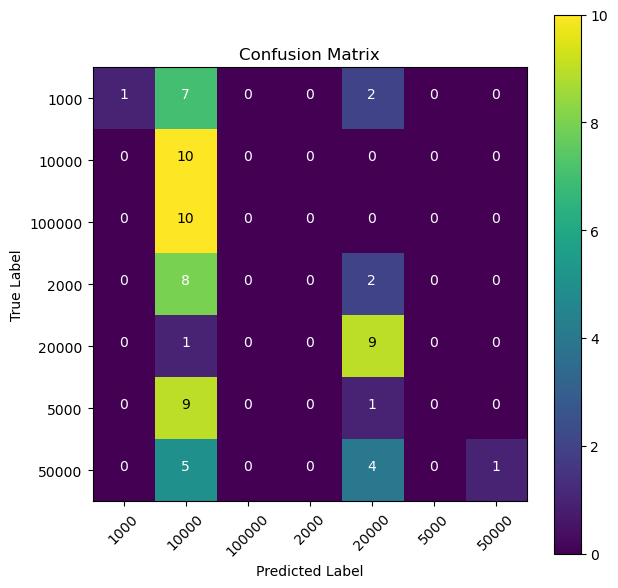

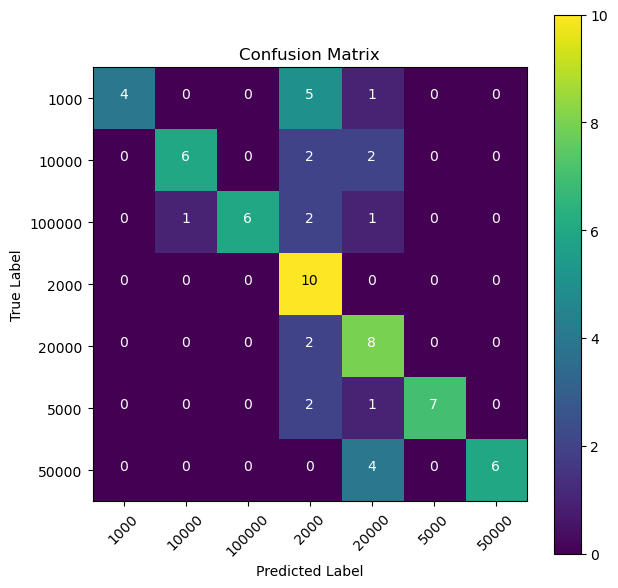

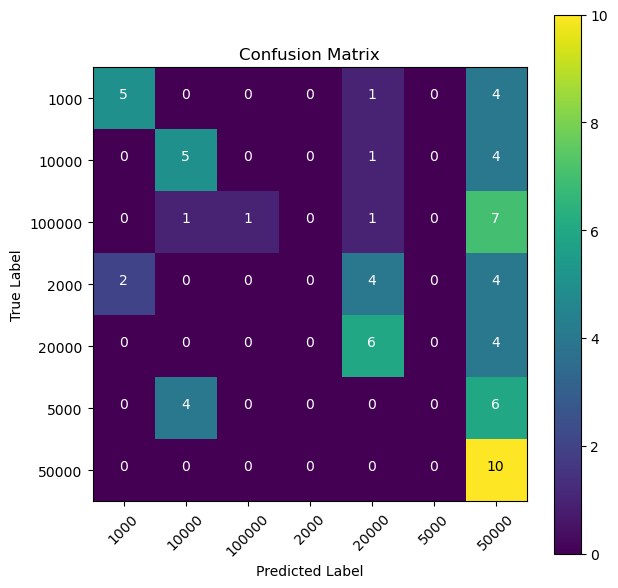

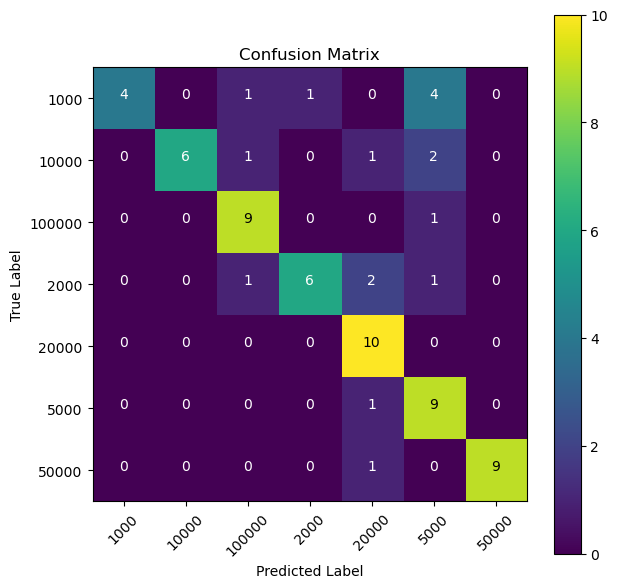

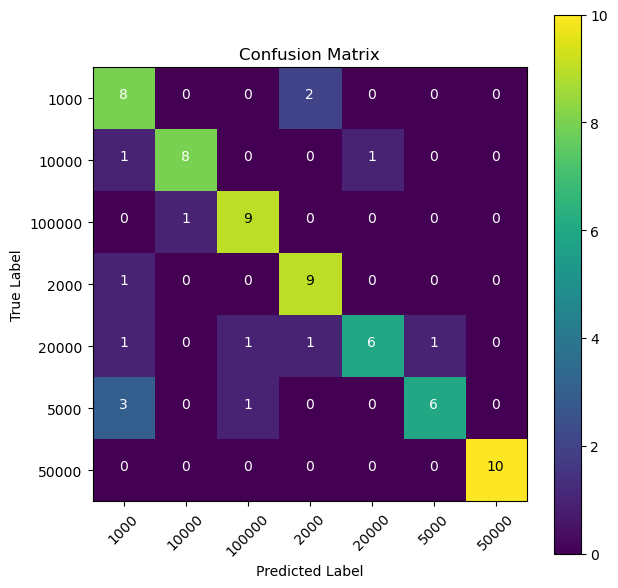

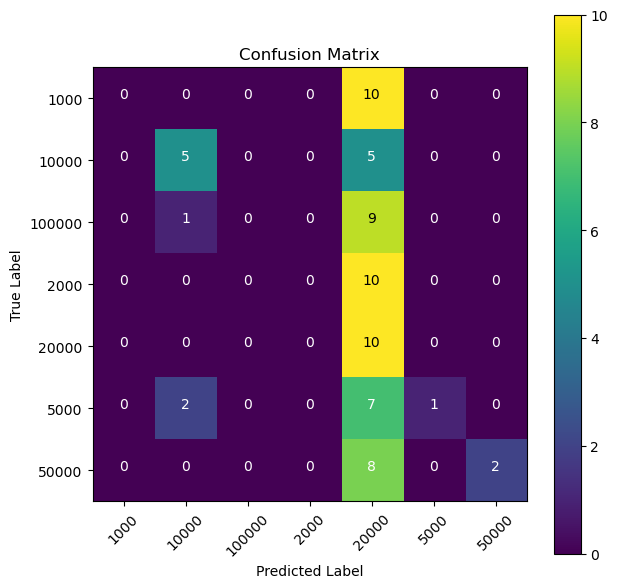

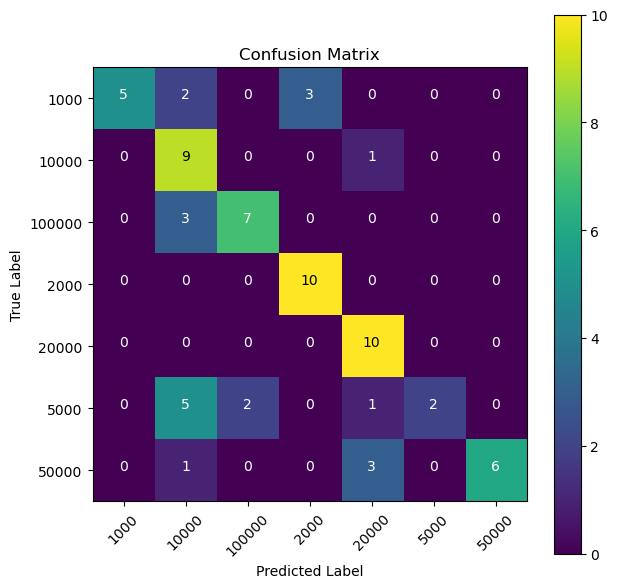

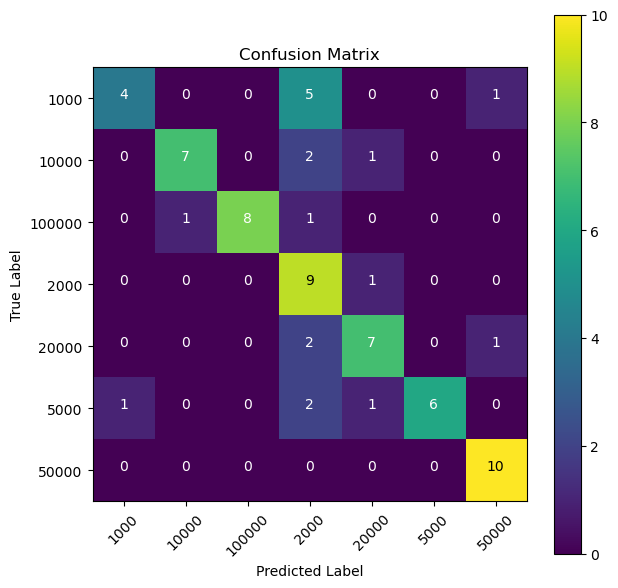

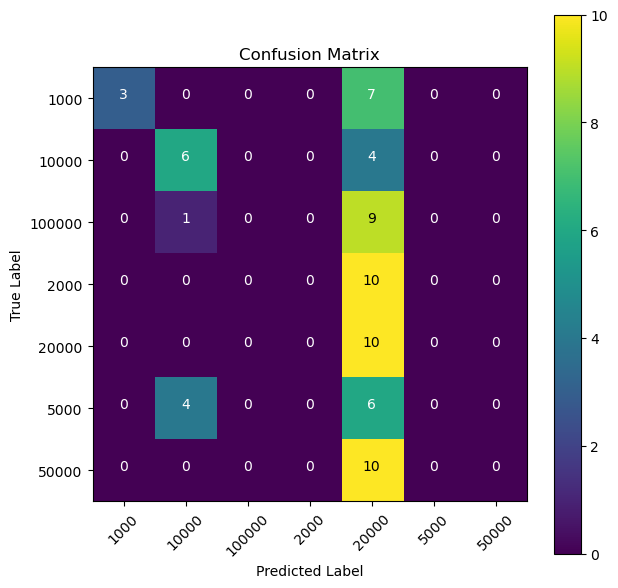

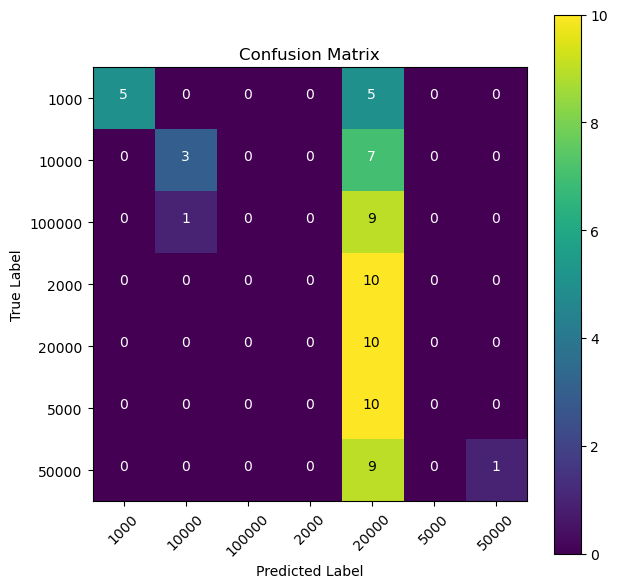

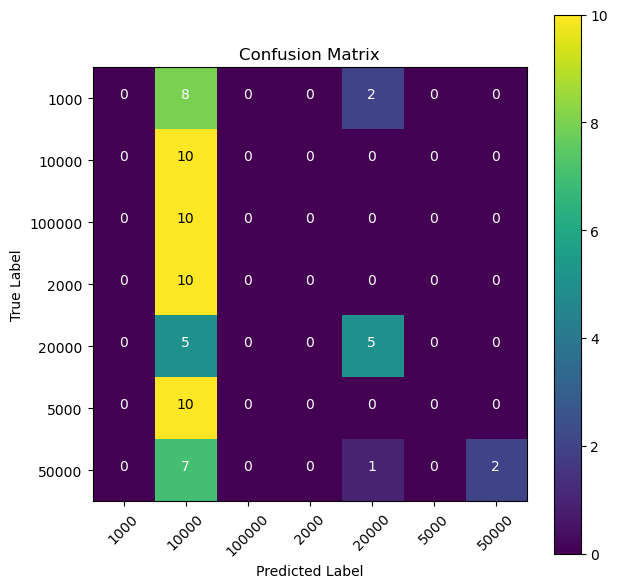

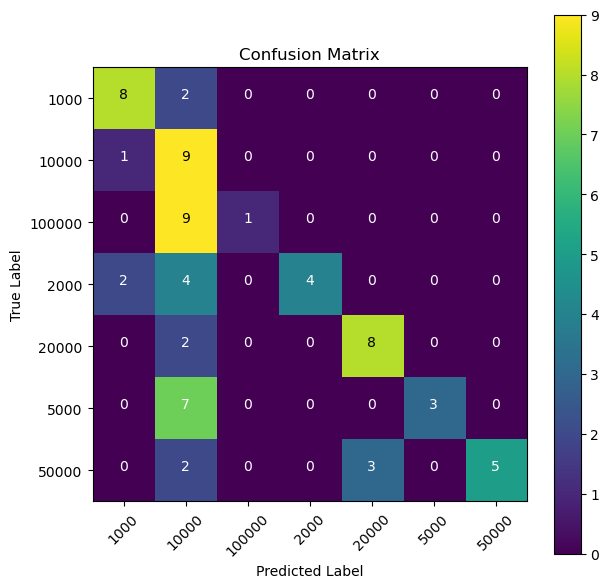

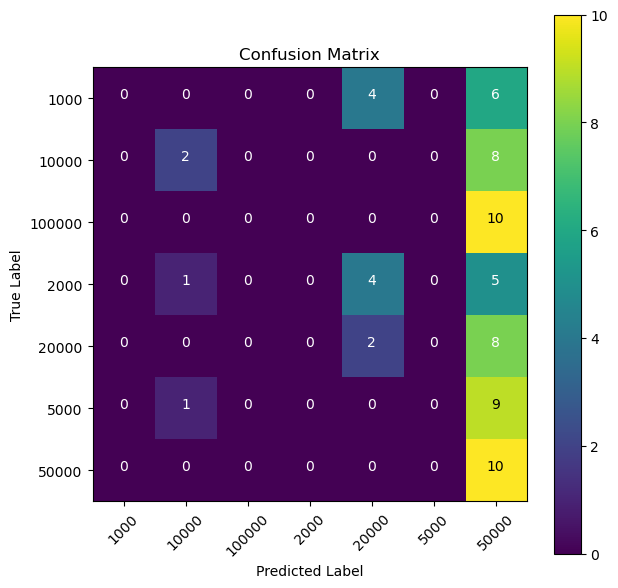

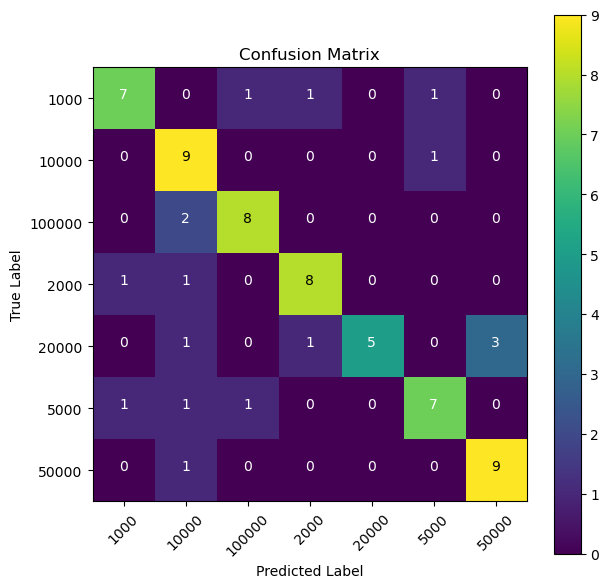

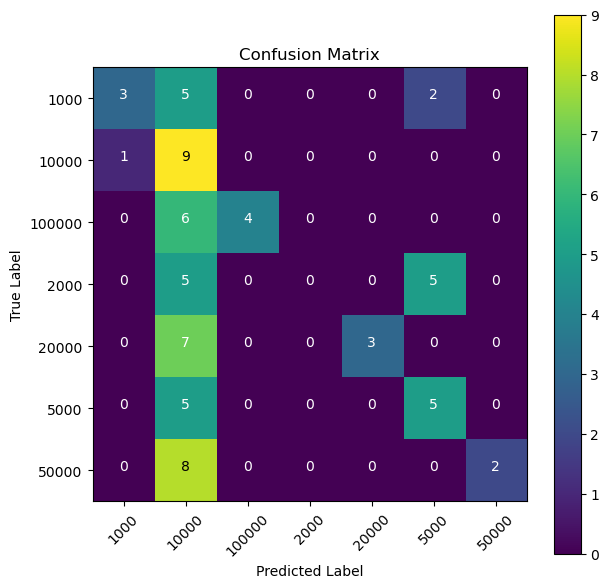

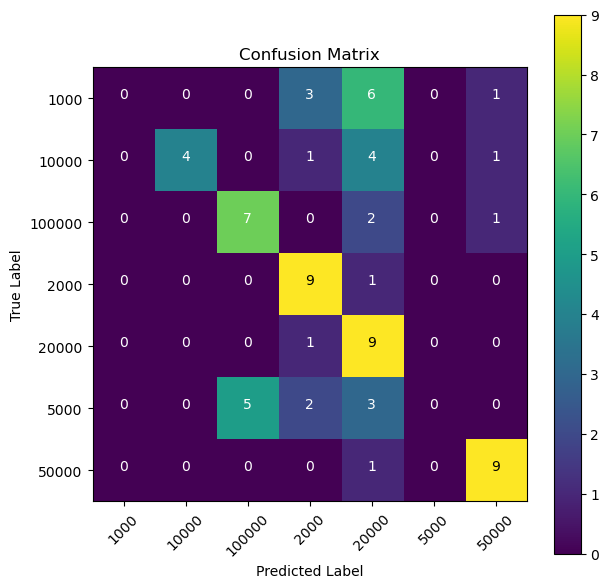

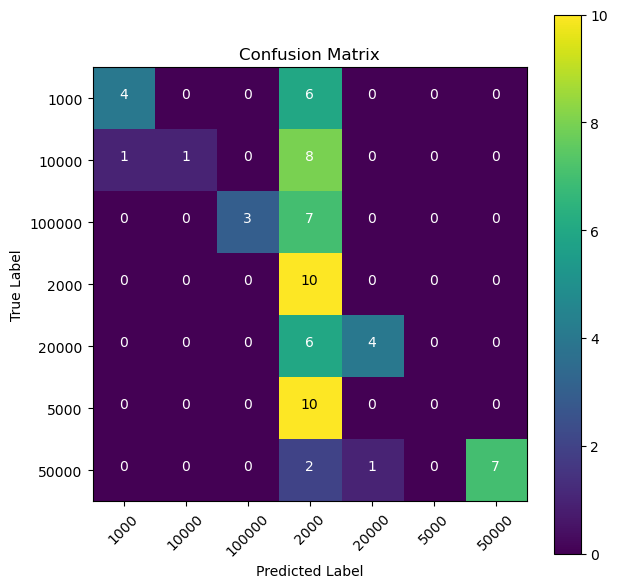

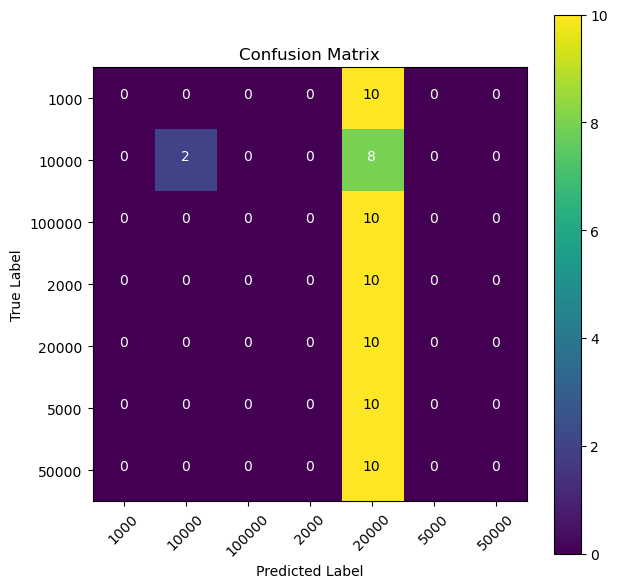

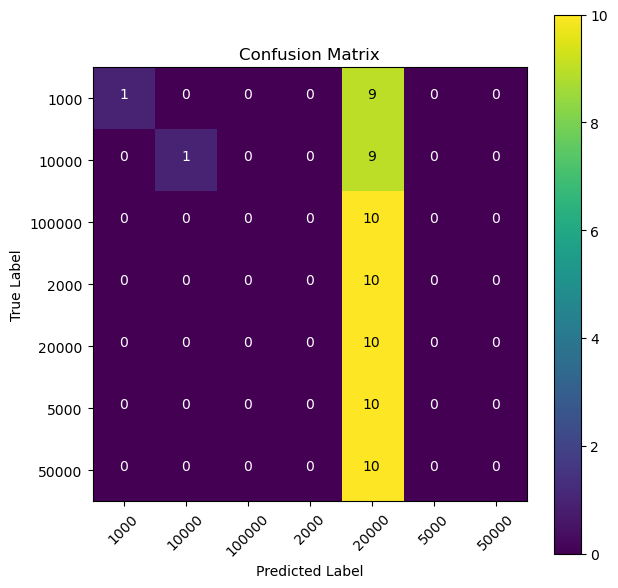

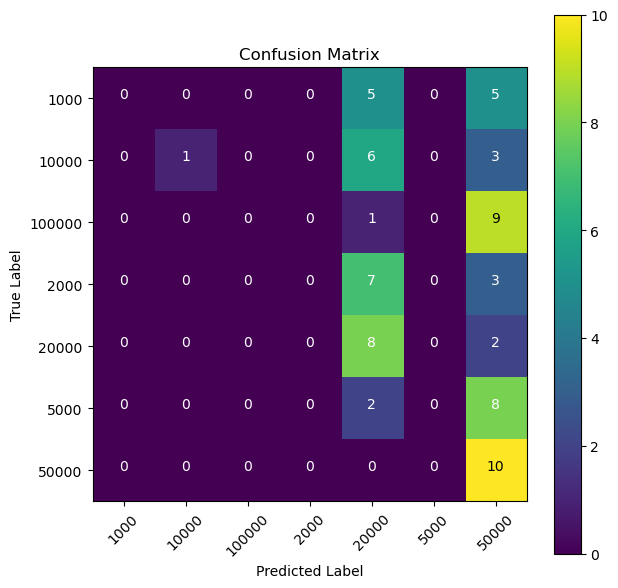

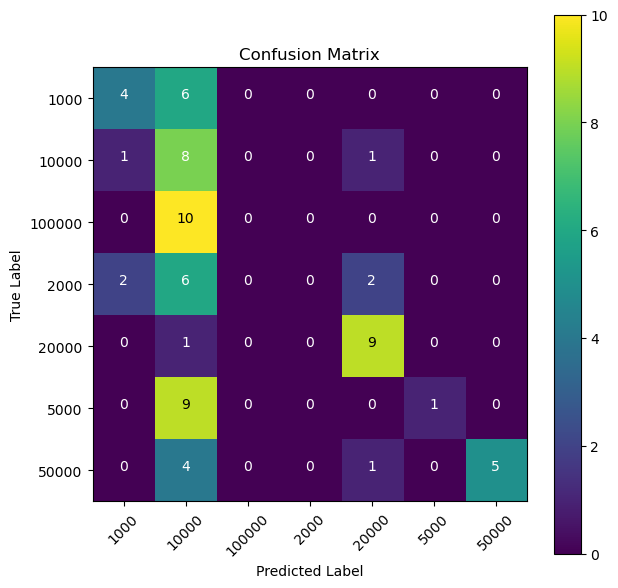

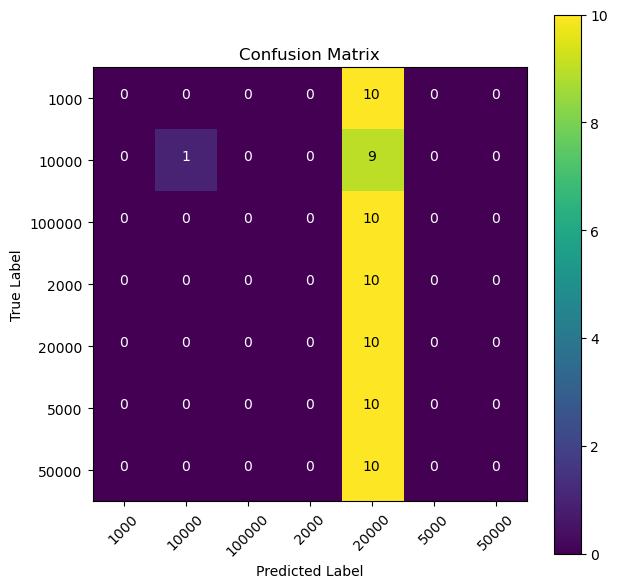

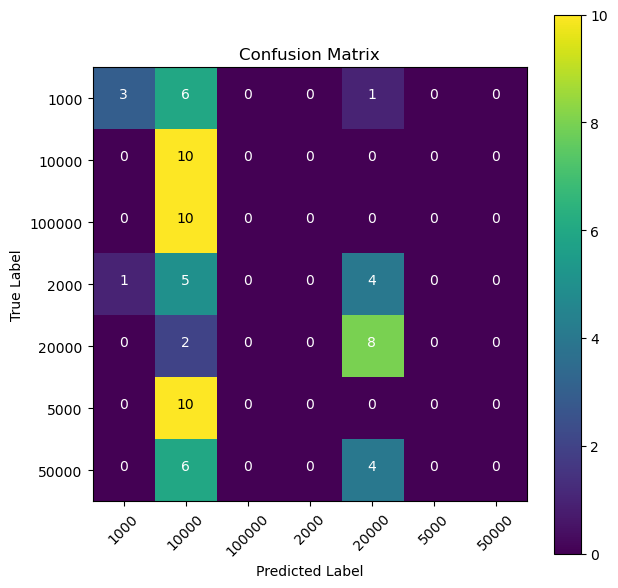

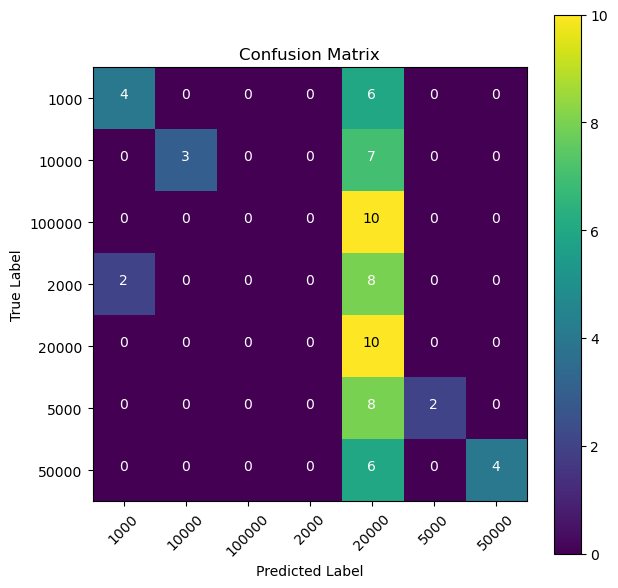

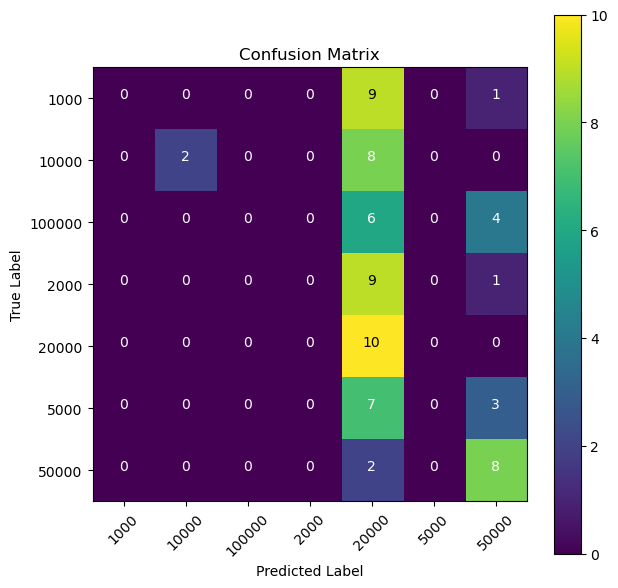

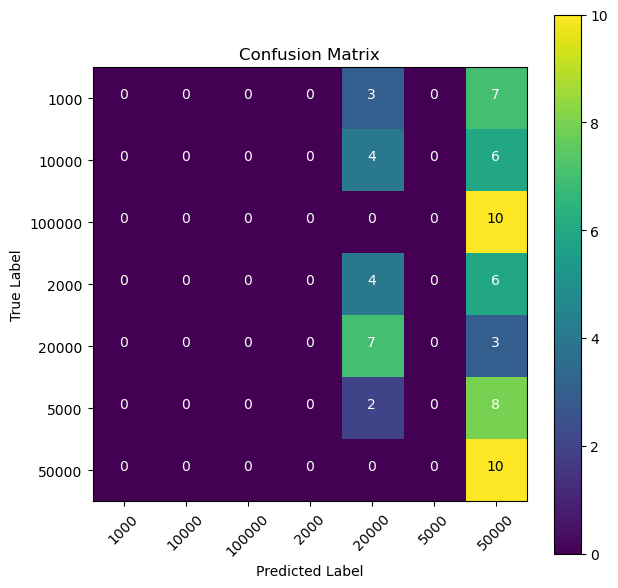

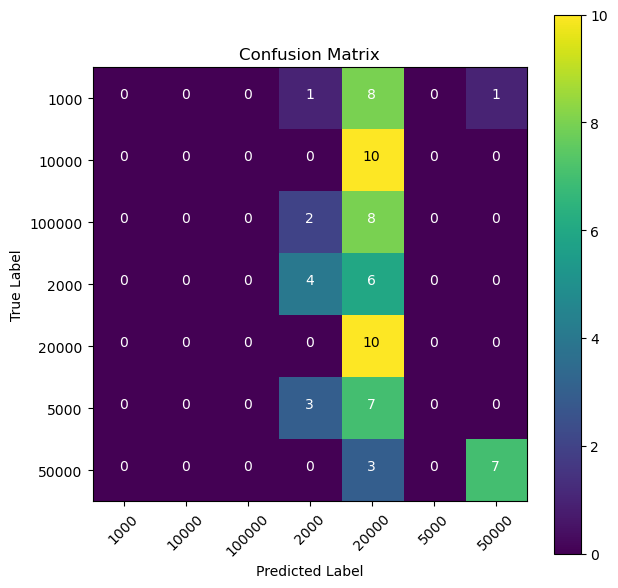

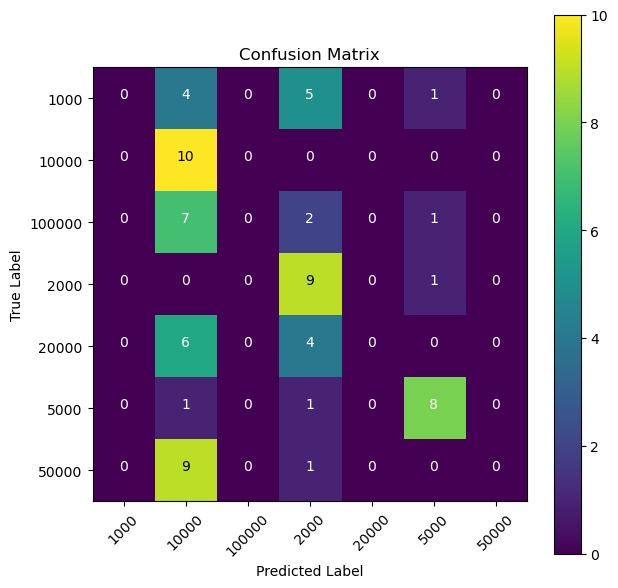

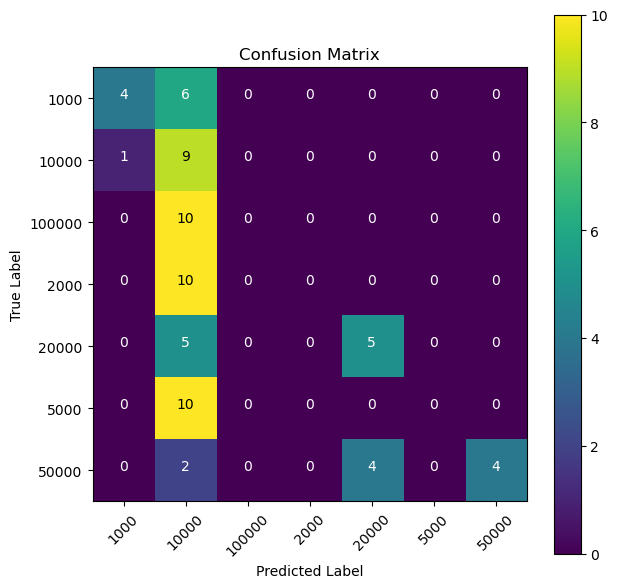

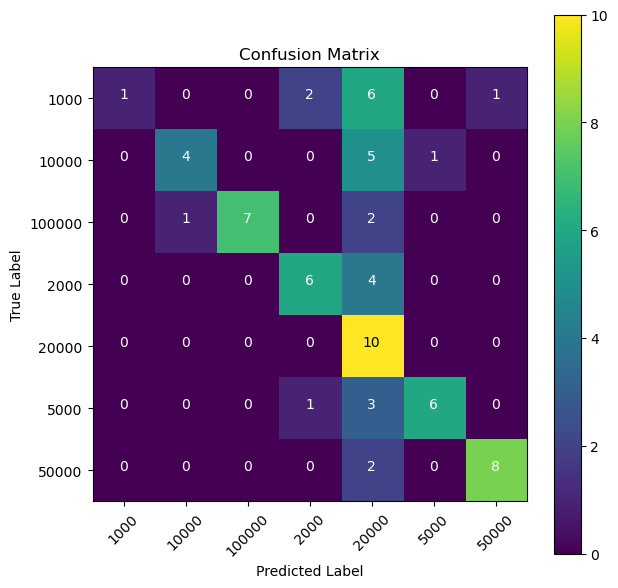

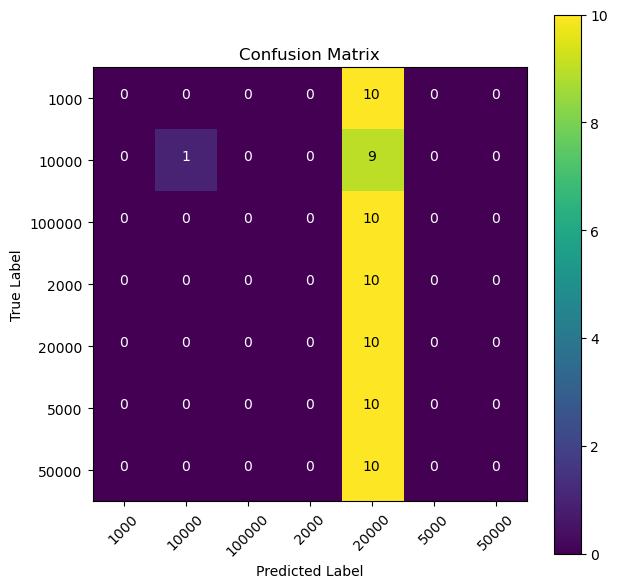

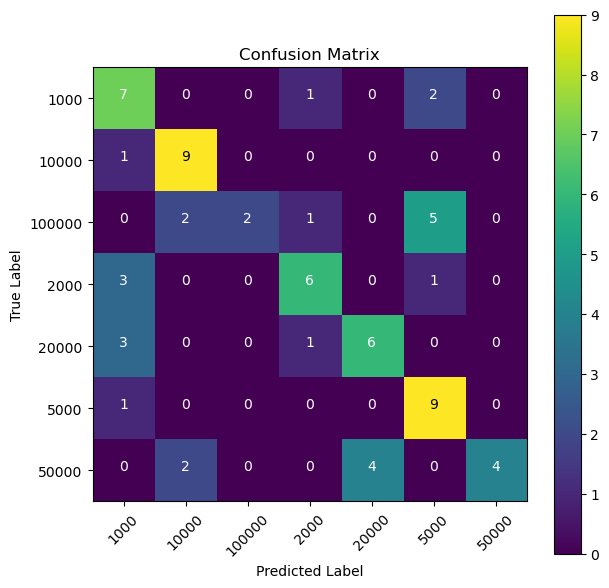

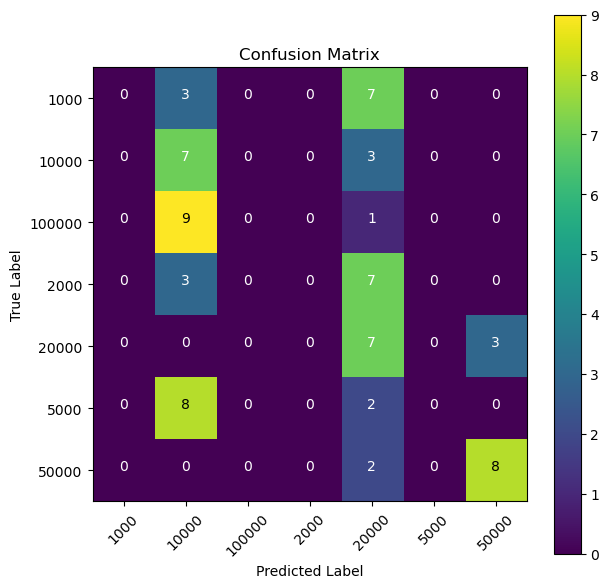

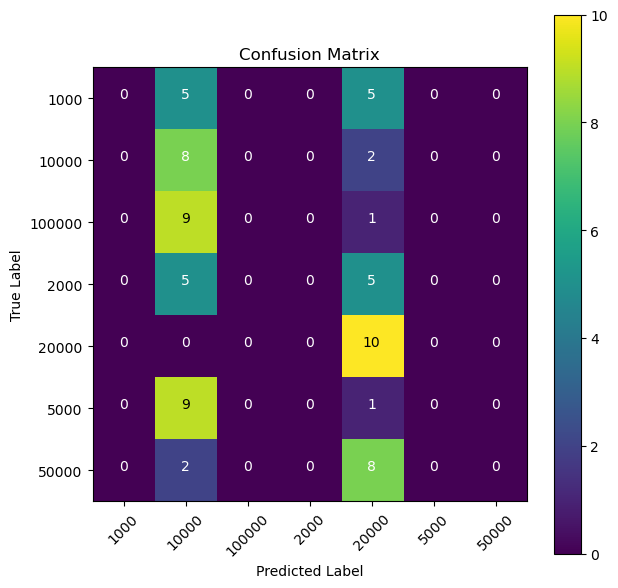

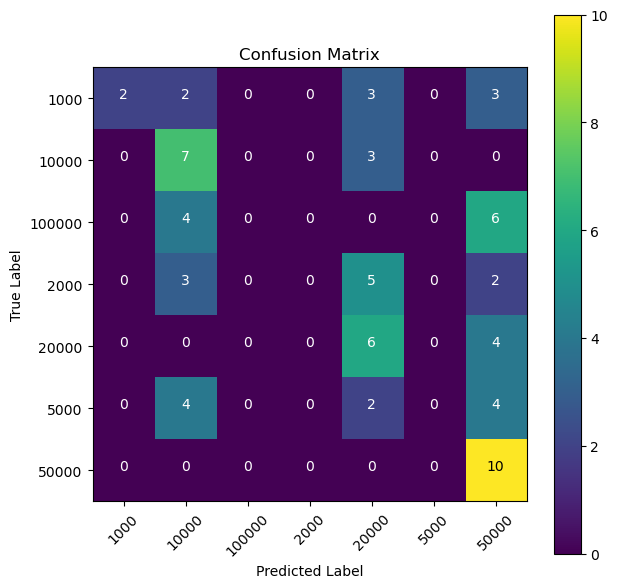

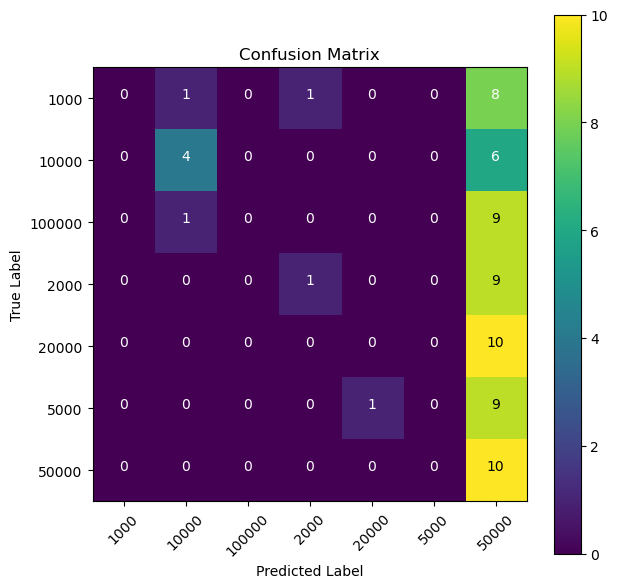

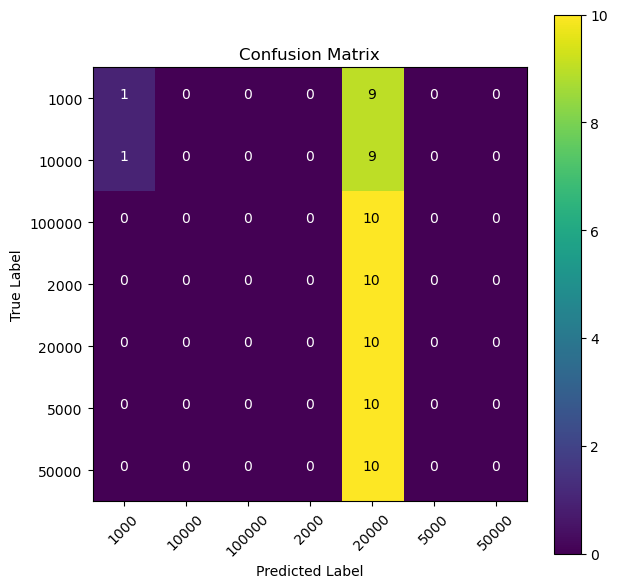

In [24]:
j = 155
for i in range (j,len(parameter)):
#for i in range (0,10): #aslinya in range len(parameter) tapi kalau mau coba per sedikit2 ya gini deh
  vgg_epoch = (parameter[i][0])
  learning_rate = (parameter[i][1])
  batch_size = (parameter[i][2])
  dropout_rate = (parameter[i][3])
  i=i+1
  savePercobaan(i)
  print("Percobaan ke-",i,"↓")
  print("HYPERPARAMETER".center(100,"─"))
  print("vgg epoch:",vgg_epoch)
  print("learning rate:",learning_rate)
  print("batch size:",batch_size)
  print("dropout rate:",dropout_rate)
  print("".center(100,"─"))
  vgg19_training(i, vgg_epoch, learning_rate, batch_size, dropout_rate)
  new_row = {'Epoch': vgg_epoch, 'Learning Rate': learning_rate, 'Batch Size': batch_size, 'Dropout Rate': dropout_rate, 'Accuracy': arr_accuracy19[-1]}
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)
  hasilTabel.index = hasilTabel.index + (j+1)
  hasilTabel.to_excel("hasilTabel.xlsx")
  print("".center(100,"─"))

In [24]:
print(arr_accuracy19)

[]


In [30]:
result = pd.read_excel("hasilTabel.xlsx")
print(result)

     Unnamed: 0  Epoch  Learning Rate  Batch Size  Dropout Rate  Accuracy
0            67     45       0.035990          64      0.685527  0.685714
1            68     45       0.035990          64      0.685527  0.557143
2            69     40       0.046247          64      0.744693  0.457143
3            70     42       0.045770         128      0.562667  0.442857
4            71     44       0.032955         128      0.594475  0.600000
..          ...    ...            ...         ...           ...       ...
122         189     65       0.097426          64      0.756015  0.685714
123         190     62       0.080655         128      0.542716  0.257143
124         191     60       0.081755         128      0.636679  0.328571
125         192     64       0.078194         128      0.723148  0.214286
126         193     63       0.081472         128      0.740506  0.214286

[127 rows x 6 columns]


#### **<font color='Pink'>Testing</font>**

1/1 [==============================] - 0s 237ms/step


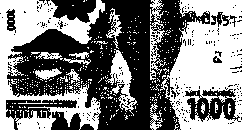

Prediksi: 100000 | Probabilitas: 0.29568768


In [ ]:
from tensorflow.keras.models import load_model

path = "datasetPreprocessing/1000/1k_b_2016_1.png"
img = cv2.resize(cv2.imread(path),(242,130))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x = imageEnhancement(img)
x = imageSegmentation(x)
z = PIL.Image.fromarray(x)
z.save("citraUji.png")

img = cv2.imread("citraUji.png")
img_normalized = img/255

model = load_model("percobaan1/vgg19-model1.h5")

PIL.Image.fromarray(x)
vgg19_image_prediction = np.argmax(model.predict(np.array([img_normalized])))
prob = np.amax(model.predict(np.array([img_normalized])))
cv2_imshow(img)
print("Prediksi:",inv_map_classes[vgg19_image_prediction],"| Probabilitas:",prob)

# Revisi

Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 1 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.3932 - acc: 0.3163
Epoch 1: val_acc improved from -inf to 0.34286, saving model to percobaan1_noImgPro/model\vgg_19_1-saved-model-01-acc-0.34.hdf5
16/16 [==============================] - 115s 7s/step - loss: 2.3932 - acc: 0.3163 - val_loss: 1.8680 - val_acc: 0.3429
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.1255 - acc: 0.6224
Epoch 2: val_acc improved from 0.34286 to 0.42857, saving model to percobaan1_noImgPro/model\vgg_19_1-saved-model-02-acc-0.43.hdf5
16/16 [============

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 2 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.7604 - acc: 0.2857
Epoch 1: val_acc improved from -inf to 0.31429, saving model to percobaan2_noImgPro/model\vgg_19_2-saved-model-01-acc-0.31.hdf5
16/16 [==============================] - 218s 13s/step - loss: 2.7604 - acc: 0.2857 - val_loss: 2.3113 - val_acc: 0.3143
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.2545 - acc: 0.5714
Epoch 2: val_acc improved from 0.31429 to 0.4285

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 3 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.2595 - acc: 0.3367
Epoch 1: val_acc improved from -inf to 0.20000, saving model to percobaan3_noImgPro/model\vgg_19_3-saved-model-01-acc-0.20.hdf5
16/16 [==============================] - 248s 14s/step - loss: 2.2595 - acc: 0.3367 - val_loss: 2.6679 - val_acc: 0.2000
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.0256 - acc: 0.6673
Epoch 2: val_acc improved from 0.20000 to 0.2928

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 4 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.4893 - acc: 0.3224
Epoch 1: val_acc improved from -inf to 0.31429, saving model to percobaan4_noImgPro/model\vgg_19_4-saved-model-01-acc-0.31.hdf5
16/16 [==============================] - 259s 15s/step - loss: 2.4893 - acc: 0.3224 - val_loss: 2.1996 - val_acc: 0.3143
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.1247 - acc: 0.6245
Epoch 2: val_acc did not improve from 0.31429
16/16 [==============================] - 220s 14s/step - loss: 1.1247 - acc: 0.6245 - val_loss: 1.7595 

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 5 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.1407 - acc: 0.3612
Epoch 1: val_acc improved from -inf to 0.27857, saving model to percobaan5_noImgPro/model\vgg_19_5-saved-model-01-acc-0.28.hdf5
16/16 [==============================] - 254s 14s/step - loss: 2.1407 - acc: 0.3612 - val_loss: 2.2209 - val_acc: 0.2786
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.1343 - acc: 0.6163
Epoch 2: val_acc improved from 0.27857 to 0.3571

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


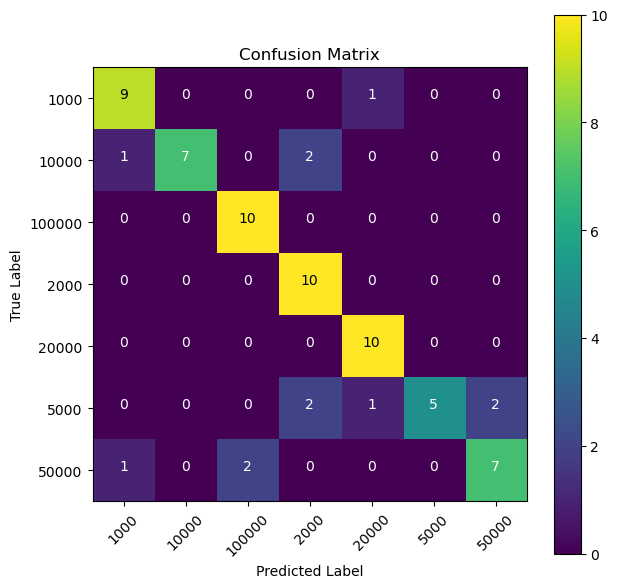

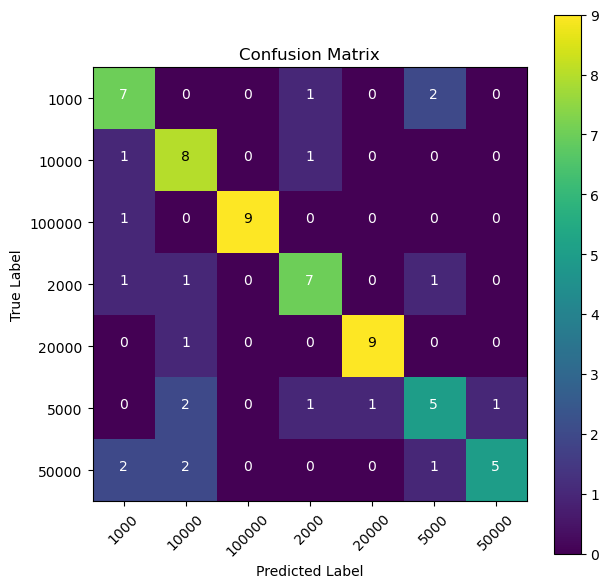

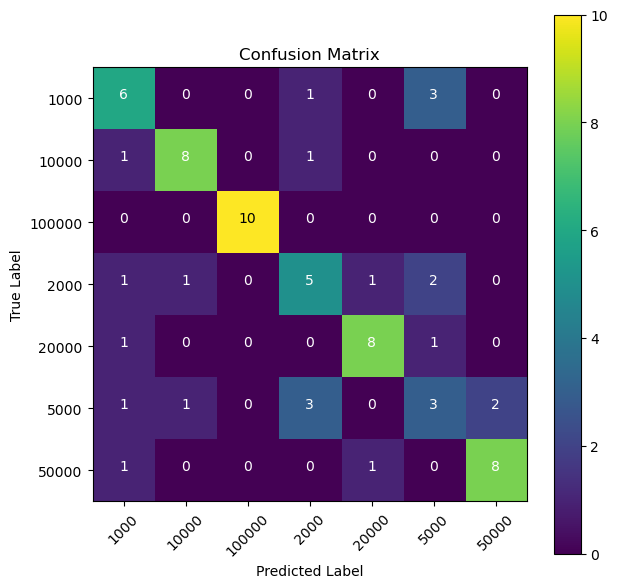

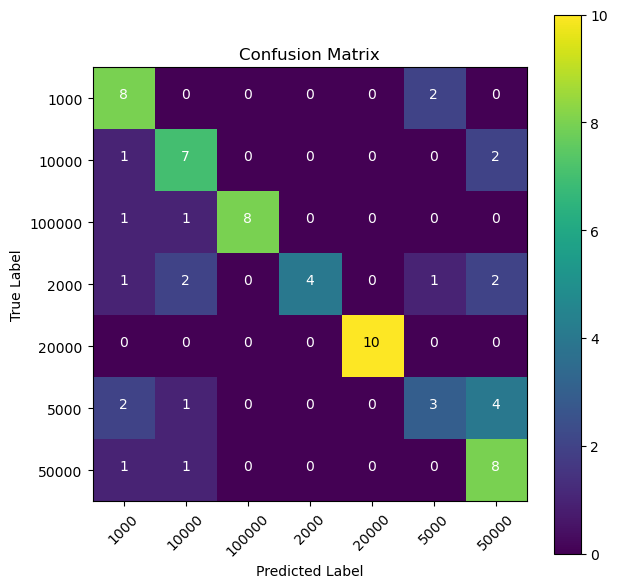

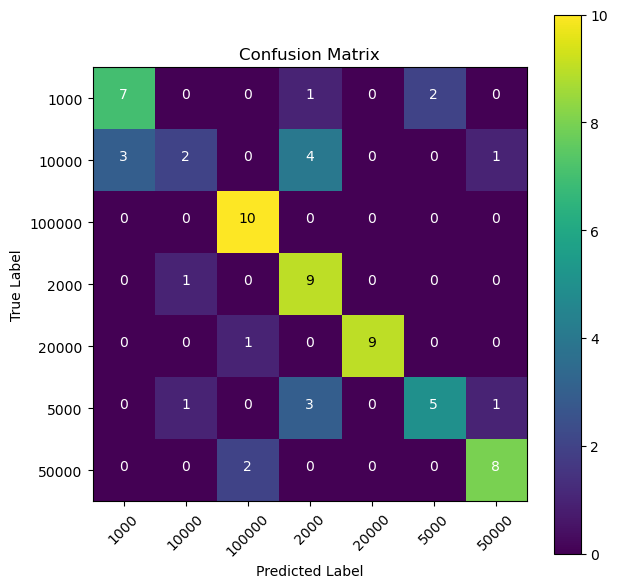

In [23]:
for i in range (0,5):
#for i in range (0,10): #aslinya in range len(parameter) tapi kalau mau coba per sedikit2 ya gini deh
  vgg_epoch = 60
  learning_rate = 0.003070712
  batch_size = 32
  dropout_rate = 0.633661938
  i=i+1
  dataset = r"D:\UNAIR\Semester_8\Skripsi\Model\VGG16_NoImgPro\datasetSplit"+str(i)
  IMAGE_SIZE = (130, 242, 3)
  train_pred_test_folders = os.listdir(dataset)
  train_path = dataset+'/train'
  test_path = dataset+'/test'
  val_path = dataset+'/val'

  #normalisasi
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
  train_generator19 = train_datagen.flow_from_directory(train_path,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(130, 242))

  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  test_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
  test_generator19 = test_datagen.flow_from_directory(test_path, target_size=(130, 242),
      batch_size=1,
      shuffle=True,
      class_mode='categorical')

  validation_generator19 = validation_datagen.flow_from_directory(val_path, shuffle=True, batch_size=1, class_mode='categorical', target_size=(130, 242))

  savePercobaan(i)
  print("Percobaan ke-",i,"↓")
  print("HYPERPARAMETER VGG-19".center(100,"─"))
  print("vgg epoch:",vgg_epoch)
  print("learning rate:",learning_rate)
  print("batch size:",batch_size)
  print("dropout rate:",dropout_rate)
  print("".center(100,"─"))
  vgg19_training(i, vgg_epoch, learning_rate, batch_size, dropout_rate)
  new_row = {'Epoch': vgg_epoch, 'Learning Rate': learning_rate, 'Batch Size': batch_size, 'Dropout Rate': dropout_rate, 'Accuracy': arr_accuracy19[-1]}
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)
  hasilTabel.index = hasilTabel.index + (i+1)
  hasilTabel.to_excel("hasilTabelRevisi.xlsx")
  print("".center(100,"─"))

Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 1 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.8047 - acc: 0.2510
Epoch 1: val_acc improved from -inf to 0.29286, saving model to percobaan1_noImgPro/model\vgg_19_1-saved-model-01-acc-0.29.hdf5
16/16 [==============================] - 83s 5s/step - loss: 2.8047 - acc: 0.2510 - val_loss: 1.8539 - val_acc: 0.2929
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.7457 - acc: 0.4367
Epoch 2: val_acc improved from 0.29286 to 0.34286, saving model to percobaan1_noImgPro/model\vgg_19_1-saved-model-02-acc-0.34.hdf5
16/16 [=============

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 2 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.8568 - acc: 0.2347
Epoch 1: val_acc improved from -inf to 0.18571, saving model to percobaan2_noImgPro/model\vgg_19_2-saved-model-01-acc-0.19.hdf5
16/16 [==============================] - 75s 5s/step - loss: 2.8568 - acc: 0.2347 - val_loss: 2.2993 - val_acc: 0.1857
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.7241 - acc: 0.4408
Epoch 2: val_acc improved from 0.18571 to 0.29286, saving model to percobaan2_noImgPro/model\vgg_19_2-saved-model-02-acc-0.29.hdf5
16/16 [=============

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 3 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.7887 - acc: 0.2367
Epoch 1: val_acc improved from -inf to 0.19286, saving model to percobaan3_noImgPro/model\vgg_19_3-saved-model-01-acc-0.19.hdf5
16/16 [==============================] - 83s 5s/step - loss: 2.7887 - acc: 0.2367 - val_loss: 2.1487 - val_acc: 0.1929
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.6350 - acc: 0.4857
Epoch 2: val_acc improved from 0.19286 to 0.23571, saving model to percobaan3_noImgPro/model\vgg_19_3-saved-model-02-acc-0.24.hdf5
16/16 [=============

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


────────────────────────────────────────────────────────────────────────────────────────────────────
Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 4 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.7995 - acc: 0.2286
Epoch 1: val_acc improved from -inf to 0.22143, saving model to percobaan4_noImgPro/model\vgg_19_4-saved-model-01-acc-0.22.hdf5
16/16 [==============================] - 101s 6s/step - loss: 2.7995 - acc: 0.2286 - val_loss: 2.1291 - val_acc: 0.2214
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.7430 - acc: 0.4286
Epoch 2: val_acc did not improve from 0.22143
16/

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Percobaan ke- 5 ↓
───────────────────────────────────────HYPERPARAMETER VGG-19────────────────────────────────────────
vgg epoch: 60
learning rate: 0.003070712
batch size: 32
dropout rate: 0.633661938
────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.7061 - acc: 0.2571
Epoch 1: val_acc improved from -inf to 0.17143, saving model to percobaan5_noImgPro/model\vgg_19_5-saved-model-01-acc-0.17.hdf5
16/16 [==============================] - 92s 5s/step - loss: 2.7061 - acc: 0.2571 - val_loss: 2.3924 - val_acc: 0.1714
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.7512 - acc: 0.4163
Epoch 2: val_acc improved from 0.17143 to 0.28571, saving model to percobaan5_noImgPro/model\vgg_19_5-saved-model-02-acc-0.29.hdf5
16/16 [=============

C:\Users\ardin\AppData\Local\Temp\ipykernel_37152\1430638867.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)


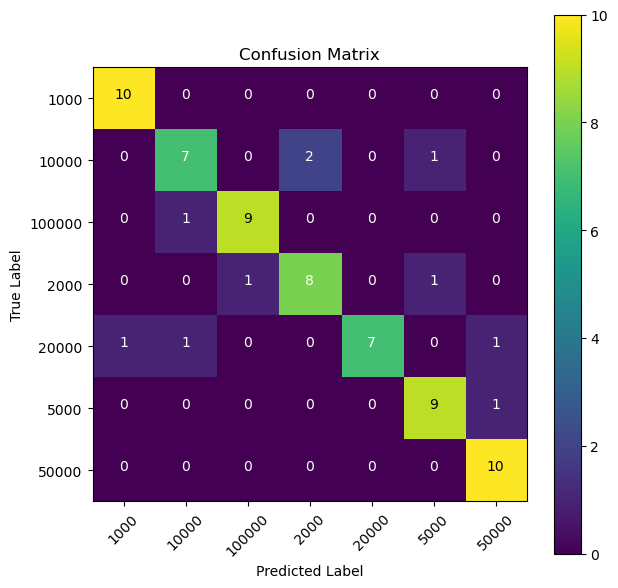

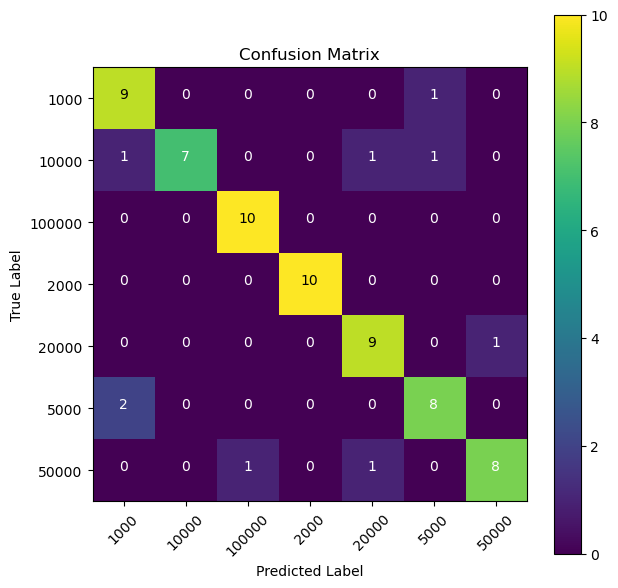

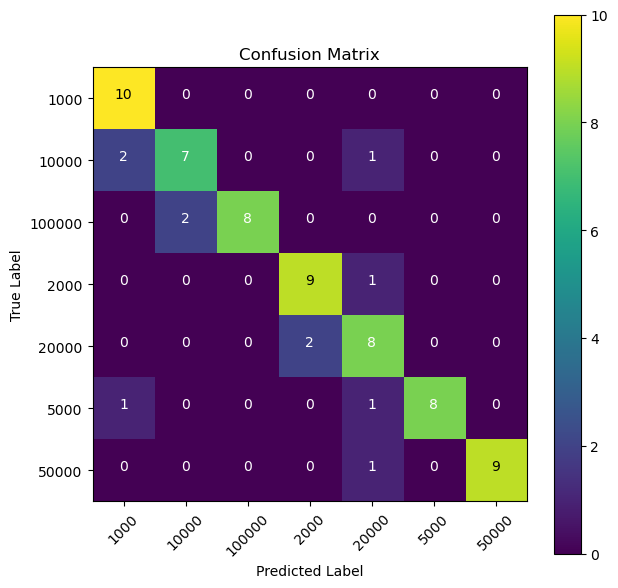

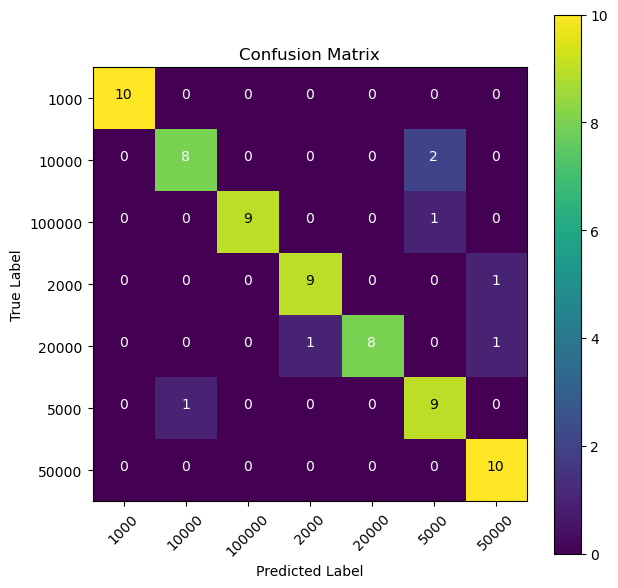

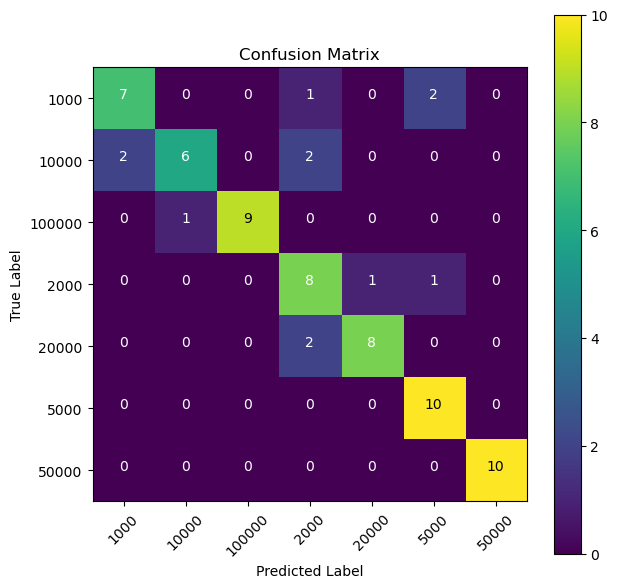

In [47]:
for i in range (0,5):
#for i in range (0,10): #aslinya in range len(parameter) tapi kalau mau coba per sedikit2 ya gini deh
  vgg_epoch = 60
  learning_rate = 0.003070712
  batch_size = 32
  dropout_rate = 0.633661938
  i=i+1
  dataset = r"D:\UNAIR\Semester_8\Skripsi\Model\VGG16_NoImgPro\datasetSplit"+str(i)
  IMAGE_SIZE = (130, 242, 3)
  train_pred_test_folders = os.listdir(dataset)
  train_path = dataset+'/train'
  test_path = dataset+'/test'
  val_path = dataset+'/val'

  #normalisasi
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
  train_generator19 = train_datagen.flow_from_directory(train_path,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(130, 242))

  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  test_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
  test_generator19 = test_datagen.flow_from_directory(test_path, target_size=(130, 242),
      batch_size=1,
      shuffle=True,
      class_mode='categorical')

  validation_generator19 = validation_datagen.flow_from_directory(val_path, shuffle=True, batch_size=1, class_mode='categorical', target_size=(130, 242))

  savePercobaan(i)
  print("Percobaan ke-",i,"↓")
  print("HYPERPARAMETER VGG-19".center(100,"─"))
  print("vgg epoch:",vgg_epoch)
  print("learning rate:",learning_rate)
  print("batch size:",batch_size)
  print("dropout rate:",dropout_rate)
  print("".center(100,"─"))
  vgg19_training(i, vgg_epoch, learning_rate, batch_size, dropout_rate)
  new_row = {'Epoch': vgg_epoch, 'Learning Rate': learning_rate, 'Batch Size': batch_size, 'Dropout Rate': dropout_rate, 'Accuracy': arr_accuracy19[-1]}
  hasilTabel = hasilTabel.append(new_row, ignore_index=True)
  hasilTabel.index = hasilTabel.index + (i+1)
  hasilTabel.to_excel("hasilTabelRevisi.xlsx")
  print("".center(100,"─"))